# __`Loan EDA Case Study`__
### For Banking Domain (Loans Category)


<font color=blue>__Importing all the required libraries__</font>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading, understanding, analyzing the current loan application dataset in next few steps

<font color=blue>__1. Reading data for the current loan application__</font>

In [2]:
# Since the dataset is in the same location as that of the python notebook, we need not give the entire path

df_current=pd.read_csv('application_data.csv')

<font color=blue>__2. Analyzing shape, dimension, data, metadata of the dataframe__</font>

In [3]:
# Understanding data by fetching top 5 rows using head()

df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Observing shape and dimension of the dataframe

print('Shape of current loan dataset: ',df_current.shape)
print('Dimension of current loan dataset: ',df_current.ndim)

Shape of current loan dataset:  (307511, 122)
Dimension of current loan dataset:  2


In [5]:
# Checking the metadata of the dataframe using info()

df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<font color=red>__Note:__<br>*We could not actually see the detailed information due to large number of columns in the current loan application dataframe.<br>Gradually we will eliminate unwanted columns for our analysis and visualize the data as per our requirement*</font>

In [6]:
# Understanding statistical stand of the dataframe using describe()

df_current.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

<font color=blue>__3. Checking the NULL / Missing values present in different columns__</font>

In [7]:
# Creating a function to find the total null count and null percentage in each column of a given dataframe

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [8]:
# Using the created function to check the Nulls in the current loan application dataframe

loan_curr_nulls=find_NaN(df_current)
loan_curr_nulls

Cnt_of_Nulls  Null_Percentage
SK_ID_CURR                             0         0.000000
TARGET                                 0         0.000000
NAME_CONTRACT_TYPE                     0         0.000000
CODE_GENDER                            0         0.000000
FLAG_OWN_CAR                           0         0.000000
...                                  ...              ...
AMT_REQ_CREDIT_BUREAU_DAY          41519        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK         41519        13.501631
AMT_REQ_CREDIT_BUREAU_MON          41519        13.501631
AMT_REQ_CREDIT_BUREAU_QRT          41519        13.501631
AMT_REQ_CREDIT_BUREAU_YEAR         41519        13.501631

[122 rows x 2 columns]

In [9]:
# Dropping the columns from the dataframe with null percentange 50 or more

df_current.drop(loan_curr_nulls[loan_curr_nulls.Null_Percentage>=50].index, inplace=True, axis=1)
df_current.shape

(307511, 81)

In [10]:
# Understanding the columns with atleast some missing values extending till maximum 13% of missing values

loan_curr_nulls=find_NaN(df_current)
loan_curr_nulls[(loan_curr_nulls.Null_Percentage>0) & (loan_curr_nulls.Null_Percentage<=13)]

Cnt_of_Nulls  Null_Percentage
AMT_ANNUITY                         12         0.003902
AMT_GOODS_PRICE                    278         0.090403
NAME_TYPE_SUITE                   1292         0.420148
CNT_FAM_MEMBERS                      2         0.000650
EXT_SOURCE_2                       660         0.214626
OBS_30_CNT_SOCIAL_CIRCLE          1021         0.332021
DEF_30_CNT_SOCIAL_CIRCLE          1021         0.332021
OBS_60_CNT_SOCIAL_CIRCLE          1021         0.332021
DEF_60_CNT_SOCIAL_CIRCLE          1021         0.332021
DAYS_LAST_PHONE_CHANGE               1         0.000325

<font color=blue>__4. Suggesting imputing values for the missing ones for some columns in the current loan application data__</font><br>
> Usually for Categorical columns missing data is replaced with MODE (i.e. Frequently occuring value) whereas Continuous columns' nulls are replaced with either MEAN (i.e. Average of all values) or mostly with MEDIAN (i.e. value attained by 50%), but depending on logical reasoning we need to replace them with some different values like (ex.-1,'Unknown','NA','Others', etc.) 

In [11]:
# Checking on median values of continuous columns

df_current.DAYS_LAST_PHONE_CHANGE.median()

-757.0

In [12]:
df_current.CNT_FAM_MEMBERS.median()

2.0

In [13]:
df_current.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.169134    0.000326
0.213753    0.000326
0.057994    0.000326
0.229146    0.000326
0.336367    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [14]:
# Checking the mean and median values of continuous columns

df_current.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [15]:
df_current.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [16]:
df_current.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
# Checking the mode value for the categorical column

df_current.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

### <u>SUGGESTION 1:</u>
> 1. Missing values in Categorical columns like __NAME_TYPE_SUITE__ should be imputed using mode values that is __Unaccompanied__.
> 2. Missing values in Continous columns like __DAYS_LAST_PHONE_CHANGE, CNT_FAM_MEMBERS, AMT_ANNUITY, AMT_GOODS_PRICE, and EXT_SOURCE_2__ should be imputed by the median values that is __-757.0, 2.0, 24903.000000, 4.500000e+05 and 5.659614e-01__ respectively.

<font color=blue>__5. Observing the datatypes and values within each column for further analysis and managing them in correct way__</font>

In [18]:
# Looking at datatypes of all the columns in current loan application dataframe using info()

df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [19]:
df_current.DAYS_BIRTH.value_counts().head()     # Checking values of DAYS_BIRTH column

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: DAYS_BIRTH, dtype: int64

In [20]:
# Coverting the values' measure unit from days to years for the DAYS_BIRTH column and rounding off to 2 decimal places

df_current.DAYS_BIRTH=round(abs(df_current.DAYS_BIRTH)/365,2)
df_current.DAYS_BIRTH.value_counts()

36.79    129
37.35    125
36.93    125
27.45    125
38.68    125
        ... 
21.03      2
21.02      1
69.12      1
20.52      1
69.01      1
Name: DAYS_BIRTH, Length: 4805, dtype: int64

In [21]:
df_current.DAYS_EMPLOYED.value_counts().head()     # Checking values of DAYS_EMPLOYED column

 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: DAYS_EMPLOYED, dtype: int64

In [22]:
# Coverting the values' measure unit from days to years for the DAYS_EMPLOYED column and rounding off to 2 decimal places
# Also standardizing the technically missing value to -99

df_current.DAYS_EMPLOYED=round(abs(df_current.DAYS_EMPLOYED)/365,2)
df_current.DAYS_EMPLOYED=df_current.DAYS_EMPLOYED.replace(1000.67,-99)
df_current.DAYS_EMPLOYED.value_counts()

-99.00    55374
 0.55       547
 0.59       518
 0.61       512
 0.53       508
          ...  
 45.18        1
 35.99        1
 39.46        1
 44.12        1
 37.18        1
Name: DAYS_EMPLOYED, Length: 4056, dtype: int64

In [23]:
df_current.DAYS_REGISTRATION.value_counts().head()     # Checking values of DAYS_REGISTRATION column

-1.0    113
-7.0     98
-6.0     96
-2.0     92
-4.0     92
Name: DAYS_REGISTRATION, dtype: int64

In [24]:
# Converting to a positive integer value as it count of days

df_current.DAYS_REGISTRATION=abs(df_current.DAYS_REGISTRATION).astype(int)
df_current.DAYS_REGISTRATION.value_counts()

1        113
7         98
6         96
4         92
2         92
        ... 
16520      1
18926      1
14816      1
14880      1
12772      1
Name: DAYS_REGISTRATION, Length: 15687, dtype: int64

In [25]:
df_current.DAYS_ID_PUBLISH.value_counts().head()      # Checking values of DAYS_ID_PUBLISH column

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

In [26]:
# Converting to a positive integer value as it count of days

df_current.DAYS_ID_PUBLISH=abs(df_current.DAYS_ID_PUBLISH).astype(int)
df_current.DAYS_ID_PUBLISH.value_counts()

4053    169
4095    162
4046    161
4417    159
4256    158
       ... 
6076      1
5696      1
6162      1
6203      1
6028      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [27]:
df_current.DAYS_LAST_PHONE_CHANGE.value_counts().head()    # checking values in the column DAYS_LAST_PHONE_CHANGE

 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [28]:
# Coverting the values' measure unit from days to months for the DAYS_LAST_PHONE_CHANGE column and rounding off to 2 decimal places

df_current.DAYS_LAST_PHONE_CHANGE=round(abs(df_current.DAYS_LAST_PHONE_CHANGE)/30,2)
df_current.DAYS_LAST_PHONE_CHANGE.value_counts()

0.00      37672
0.03       2812
0.07       2318
0.10       1763
0.13       1285
          ...  
117.77        1
123.53        1
116.83        1
125.40        1
121.83        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [29]:
# Renaming the column names to make logical sense

df_current.rename(columns = {'DAYS_EMPLOYED':'YRS_OF_CURR_EMP','DAYS_BIRTH':'AGE_IN_YRS','DAYS_LAST_PHONE_CHANGE':'MNTHS_LST_PHN_CHG'}, inplace = True) 
df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [30]:
df_current.CNT_FAM_MEMBERS.dtype  # Checking the datatype of the column using dtype

dtype('float64')

<font color=red>__Note:__<br> *Since the column CNT_FAM_MEMBERS is a count, it should ideally be of int datatype. Due to the existence of null values in column CNT_FAM_MEMBERS we cannot convert it from float to int*</font>

<font color=blue>__6. Introducing additional columns for better analysis__</font>

In [31]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [32]:
# Adding an additional column for Counting the no of documents submitted during the application of current loan

df_current['COUNT_of_DOC']=df_current.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum(axis=1, skipna=True)
df_current.COUNT_of_DOC.value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: COUNT_of_DOC, dtype: int64

In [33]:
# Categorizing the values of AMT_GOODS_PRICE

df_current['GOODS_PRICE_CATEGORY']=df_current.AMT_GOODS_PRICE.apply(lambda x: 'VERY LOW' if x<80000 else ('LOW' if x<120000 else ('MEDIUM' if x<500000 else ('HIGH' if x<1000000 else 'VERY HIGH'))))
df_current.GOODS_PRICE_CATEGORY.value_counts()

MEDIUM       170229
HIGH          90496
VERY HIGH     34397
LOW            8280
VERY LOW       4109
Name: GOODS_PRICE_CATEGORY, dtype: int64

In [34]:
df_current.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [35]:
# Categorizing the Family on the basis of count of family members

df_current['FAMILY_SIZE']=df_current.CNT_FAM_MEMBERS.apply(lambda x: 'SINGLE' if x==1.0 else ('DUO' if x==2.0 else ('SMALL (3-5)' if x<6.0 else ('HUGE (6-10)' if x<11.0 else 'HUGE JOINT (>10)'))))
df_current[['CNT_FAM_MEMBERS','FAMILY_SIZE']].head()

CNT_FAM_MEMBERS FAMILY_SIZE
0              1.0      SINGLE
1              2.0         DUO
2              1.0      SINGLE
3              2.0         DUO
4              1.0      SINGLE

In [36]:
# Categorizing the applicants based on their income

df_current['INCOME_GRP']=df_current.AMT_INCOME_TOTAL.apply(lambda x: 'VERY LOW' if x<40000 else ('LOW' if x<100000 else ('MEDIUM' if x<500000 else ('HIGH' if x<1000000 else 'VERY HIGH'))))
df_current[['AMT_INCOME_TOTAL','INCOME_GRP']].head()

AMT_INCOME_TOTAL INCOME_GRP
0          202500.0     MEDIUM
1          270000.0     MEDIUM
2           67500.0        LOW
3          135000.0     MEDIUM
4          121500.0     MEDIUM

In [37]:
df_current.INCOME_GRP.value_counts(normalize=True)*100

MEDIUM       78.407276
LOW          20.400896
HIGH          0.797370
VERY LOW      0.313160
VERY HIGH     0.081298
Name: INCOME_GRP, dtype: float64

In [38]:
# Binning of Years of current employment

df_current['YRS_OF_CURR_EMP_BIN']=df_current.YRS_OF_CURR_EMP.apply(lambda x: 'VERY LOW (<1)' if x<1 else ('LOW (1-5 yrs)' if x<6 else ('MED (6-10)' if x<11 else ('HIGH (11-25)' if x<26 else ('VERY HIGH (>26)' if x>=26 else 'UNKNOWN')))))
df_current[['YRS_OF_CURR_EMP_BIN','YRS_OF_CURR_EMP']].head()

YRS_OF_CURR_EMP_BIN  YRS_OF_CURR_EMP
0       LOW (1-5 yrs)             1.75
1       LOW (1-5 yrs)             3.25
2       VERY LOW (<1)             0.62
3          MED (6-10)             8.33
4          MED (6-10)             8.32

In [39]:
df_current.YRS_OF_CURR_EMP_BIN.value_counts()

LOW (1-5 yrs)      124644
VERY LOW (<1)       83226
MED (6-10)          56003
HIGH (11-25)        38145
VERY HIGH (>26)      5493
Name: YRS_OF_CURR_EMP_BIN, dtype: int64

In [40]:
df_current['AGE_IN_YRS'].describe()

count    307511.000000
mean         43.936976
std          11.956135
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: AGE_IN_YRS, dtype: float64

In [41]:
# Binning AGE_IN_YRS into AGE_GROUP_BIN

df_current['AGE_GROUP_BIN']=df_current.AGE_IN_YRS.apply(lambda x: '<20' if x<20 else ('20-29' if x<30 else (('30-39' if x<40 else('40-49' if x<50 else('50-59' if x<60 else ('60-69' if x<70 else '70 & above')))))))
df_current[['AGE_IN_YRS','AGE_GROUP_BIN']].head()

AGE_IN_YRS AGE_GROUP_BIN
0       25.92         20-29
1       45.93         40-49
2       52.18         50-59
3       52.07         50-59
4       54.61         50-59

In [42]:
df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         NaN                       NaN   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR COUNT_of_DOC  \
0                       0.0                        1.0            1   
1                       0.0                        0.0            1   
2                       0.0                        0.0            0   
3                       NaN                        NaN            1   
4                       0.0                        0.0            1   

  GOODS_PRICE_CATEGORY  FAMILY_SIZE  INCOME_GRP  YRS_OF_CURR_EMP_BIN  \
0               MEDIUM       SINGLE      MEDIUM        LOW (1-5 yrs)   
1            VERY HIGH          DUO      MEDIUM        LOW (1-5 yrs)   
2               MEDIUM       SINGLE         LOW        VERY LOW (<1)   
3               MEDIUM          DUO      MEDIUM           MED (6-10)   
4                 HIGH       SINGLE      MEDIUM           MED (6-10)   

   AGE_GROUP_BIN  
0          20-29  
1          40-49  
2          50-59  
3          50-59  
4          50-59  

[5 rows x 87 columns]

### Causation and Correlation
> As per our understanding, there are some columns that might be correlated but cannot be the reason for cause of loan repayments' success or failure.<br> ex. OBS_30_CNT_SOCIAL_CIRCLE.<br> Thus we are eliminating them from our analysis perspective in the below step.

In [43]:
df_current.drop(['REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI',
'FLOORSMAX_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
], inplace=True, axis=1)
df_current.shape

(307511, 67)

In [44]:
# Dropping the columns for all FLAG DOCUMENTs as we have already consolidated them into single column

df_current.drop(df_current.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], inplace = True, axis = 1) 
df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         NaN                       NaN   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR COUNT_of_DOC  \
0                       0.0                        1.0            1   
1                       0.0                        0.0            1   
2                       0.0                        0.0            0   
3                       NaN                        NaN            1   
4                       0.0                        0.0            1   

  GOODS_PRICE_CATEGORY  FAMILY_SIZE  INCOME_GRP  YRS_OF_CURR_EMP_BIN  \
0               MEDIUM       SINGLE      MEDIUM        LOW (1-5 yrs)   
1            VERY HIGH          DUO      MEDIUM        LOW (1-5 yrs)   
2               MEDIUM       SINGLE         LOW        VERY LOW (<1)   
3               MEDIUM          DUO      MEDIUM           MED (6-10)   
4                 HIGH       SINGLE      MEDIUM           MED (6-10)   

   AGE_GROUP_BIN  
0          20-29  
1          40-49  
2          50-59  
3          50-59  
4          50-59  

[5 rows x 47 columns]

In [45]:
df_current.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     AGE_IN_YRS  \
count  3.075110e+05  307499.000000     3.072330e+05  307511.000000   
mean   5.990260e+05   27108.573909     5.383962e+05      43.936976   
std    4.024908e+05   14493.737315     3.694465e+05      11.956135   
min    4.500000e+04    1615.500000     4.050000e+04      20.520000   
25%    2.700000e+05   16524.000000     2.385000e+05      34.010000   
50%    5.135310e+05   24903.000000     4.500000e+05      43.150000   
75%    8.086500e+05   34596.000000     6.795000e+05      53.920000   
max    4.050000e+06  258025.500000     4.050000e+06      69.120000   

       YRS_OF_CURR_EMP  DAYS_REGISTRATION  ...  EXT_SOURCE_2   EXT_SOURCE_3  \
count    307511.000000      307511.000000  ...  3.068510e+05  246546.000000   
mean        -12.471337        4986.120327  ...  5.143927e-01       0.510853   
std          40.963259        3522.886321  ...  1.910602e-01       0.194844   
min         -99.000000           0.000000  ...  8.173617e-08       0.000527   
25%           0.790000        2010.000000  ...  3.924574e-01       0.370650   
50%           3.320000        4504.000000  ...  5.659614e-01       0.535276   
75%           7.560000        7479.500000  ...  6.636171e-01       0.669057   
max          49.070000       24672.000000  ...  8.549997e-01       0.896010   

       MNTHS_LST_PHN_CHG  AMT_REQ_CREDIT_BUREAU_HOUR  \
count      307510.000000               265992.000000   
mean           32.095287                    0.006402   
std            27.560302                    0.083849   
min             0.000000                    0.000000   
25%             9.130000                    0.000000   
50%            25.230000                    0.000000   
75%            52.330000                    0.000000   
max           143.070000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR   COUNT_of_DOC  
count               265992.000000  307511.000000  
mean                     1.899974       0.930155  
std                      1.869295       0.344295  
min                      0.000000       0.000000  
25%                      0.000000       1.000000  
50%                      1.000000       1.000000  
75%        

<font color=blue>__7. Checking the above metrics on the visualisations to understand the outliers__</font>

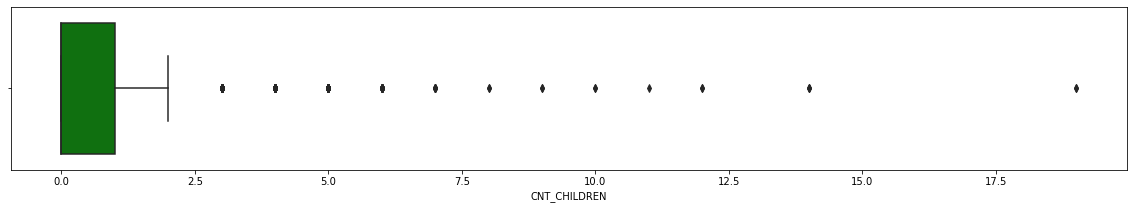

In [46]:
# Understanding the variations in the values of count of children with the current loan application data

plt.figure(figsize=[20,3])
sns.boxplot(df_current.CNT_CHILDREN, color='green')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  We cannot see lower fence, 25% or median values seperately which mentions, the current loan applicants have either no or 1 child for 75% of the applicants.__<br>
> __2.  But there are few applicants having 3 to 19 number of children.__

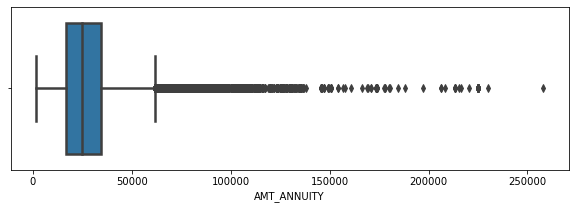

In [47]:
# Understanding the variations in the values of amount of annuity of the applicants for the current loan

plt.figure(figsize=[10,3])
sns.boxplot(df_current.AMT_ANNUITY, linewidth=2.5)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the current loan applicants have Annuity amount within 20k-40k.__<br>
> __2.  However quite a many have annuity amout extending till from 60k till 2.5lakhs.__

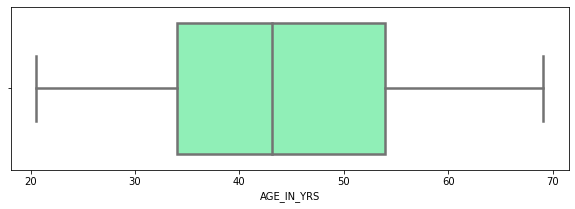

In [48]:
# Understanding the variations in applicants' age for the current loan

plt.figure(figsize=[10,3])
sns.boxplot(df_current.AGE_IN_YRS, palette='rainbow',linewidth=2.5)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  All of the current loan applicants have age between 20 to 69 yrs with no outliers.__<br>
> __2.  This takes care of the SANITY CHECK of minimum age criteria of loan application (i.e. 18yrs).__

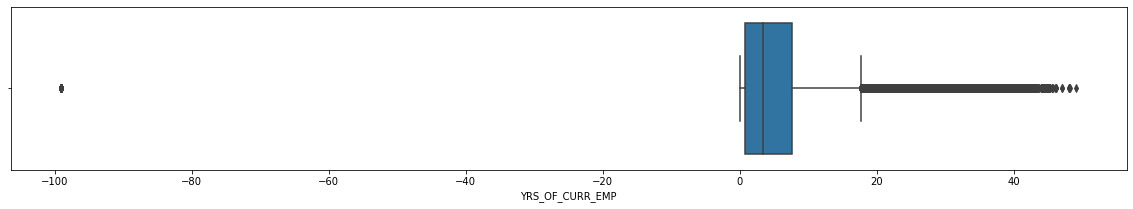

In [49]:
# Understanding the variations in applicants' years of current employment for the current loan

plt.figure(figsize=[20,3])
sns.boxplot(df_current.YRS_OF_CURR_EMP)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Most of the current loan applicants have spent 0-18 yrs with the current employer.__<br>
> __2.  But we do have quite a few applicants with more than 18yrs till 50yrs of current employment.__<br>
> __3.  We do see an outlier on the negative end which is not actually an outlier but represents the missing values.__

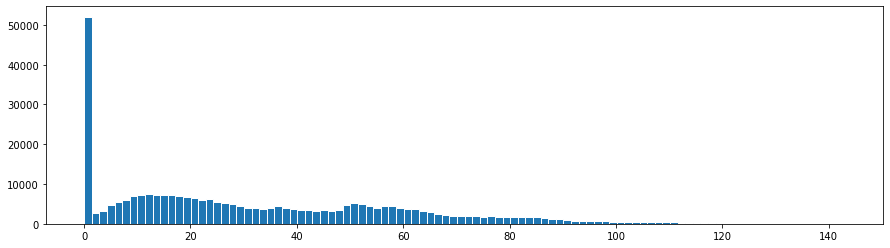

In [50]:
# Understanding how the MNTHS_LST_PHN_CHG has varied across the entire data

plt.figure(figsize=[15,4])
plt.hist(df_current.MNTHS_LST_PHN_CHG, bins=100, edgecolor='white')
plt.show()

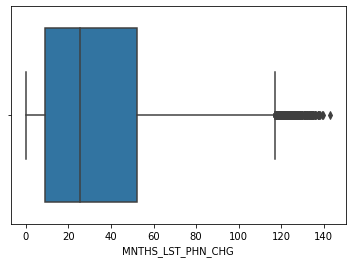

In [51]:
# Looking at the behavior of MNTHS_LST_PHN_CHG variable for the current loan applicants.

sns.boxplot(df_current.MNTHS_LST_PHN_CHG)
plt.show()

##### <u><font color=purple>Inferences:</font></u>
> __1.  50% of the applicants have changed their phone numbers within the range of 5 to 50 months before the loan application.__<br>
> __2.  From the histogram, it is evident that there are some applicants who have recently changed their numbers. Thus their profiles should be evaluated well for different factors before approving the loan.__

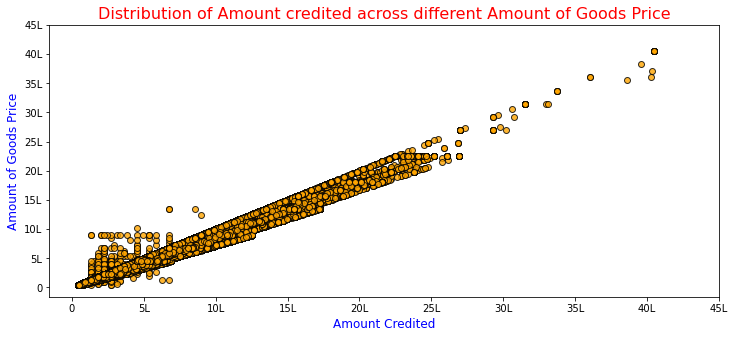

In [52]:
# Understanding how Amount credited is correlated to the amount of goods price using a scatter plot

plt.figure(figsize=[12,5])
plt.scatter(df_current.AMT_CREDIT,df_current.AMT_GOODS_PRICE, alpha=0.8, color='orange', edgecolor='black')
plt.title('Distribution of Amount credited across different Amount of Goods Price',fontdict={'fontsize': 16},color='red')

xtick_values=np.arange(0,4500001,500000)
xtick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.xticks(xtick_values,xtick_labels)
ytick_values=np.arange(0,4500001,500000)
ytick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.yticks(ytick_values,ytick_labels)

plt.xlabel('Amount Credited' ,fontdict={'fontsize':12, 'fontweight':15, 'color':'blue'})
plt.ylabel('Amount of Goods Price',fontdict={'fontsize':12, 'fontweight':15, 'color':'blue'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  The scatter plot clearly states that for most of the values, amount of goods' price is linear with amount credited__<br>
> __2.  We do not find much outlier patterns across both the continuous variables.__<br>
> __3.  We do observe a slight different behaviour for the intial values of amount of goods price where amount credited is mostly 1-7 lakhs.__

<font color=blue>__8. Checking the imbalance within the data based on TARGET column and segregating the data accordingly__</font>

In [53]:
# Checking the % values for the TARGET column where 1 stands for applicants with payment difficulties earlier and 0 stands for otherwise

df_current.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

**`Inferences: It is imbalanced with 0 at 91% and 1 at 8%`**

In [54]:
# Creating new dataframe for applicants with payment difficulties

df_cur_T1=df_current[df_current.TARGET==1]
df_cur_T1.shape

(24825, 47)

In [55]:
# Creating new dataframe for applicants with no payment difficulties

df_cur_T0=df_current[df_current.TARGET==0]
df_cur_T0.shape

(282686, 47)

In [56]:
df_cur_T0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         NaN                       NaN   
4  ...                         0.0                       0.0   
5  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR COUNT_of_DOC  \
1                       0.0                        0.0            1   
2                       0.0                        0.0            0   
3                       NaN                        NaN            1   
4                       0.0                        0.0            1   
5                       1.0                        1.0            1   

  GOODS_PRICE_CATEGORY  FAMILY_SIZE  INCOME_GRP  YRS_OF_CURR_EMP_BIN  \
1            VERY HIGH          DUO      MEDIUM        LOW (1-5 yrs)   
2               MEDIUM       SINGLE         LOW        VERY LOW (<1)   
3               MEDIUM          DUO      MEDIUM           MED (6-10)   
4                 HIGH       SINGLE      MEDIUM           MED (6-10)   
5               MEDIUM          DUO         LOW        LOW (1-5 yrs)   

   AGE_GROUP_BIN  
1          40-49  
2          50-59  
3          50-59  
4          50-59  
5          40-49  

[5 rows x 47 columns]

In [57]:
df_cur_T1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0   ...                         0.0                       0.0   
26  ...                         0.0                       0.0   
40  ...                         0.0                       2.0   
42  ...                         0.0                       0.0   
81  ...                         0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR COUNT_of_DOC  \
0                        0.0                        1.0            1   
26                       2.0                        2.0            2   
40                       0.0                        4.0            1   
42                       0.0                        2.0            1   
81                       0.0                        0.0            1   

   GOODS_PRICE_CATEGORY  FAMILY_SIZE  INCOME_GRP  YRS_OF_CURR_EMP_BIN  \
0                MEDIUM       SINGLE      MEDIUM        LOW (1-5 yrs)   
26                 HIGH       SINGLE      MEDIUM           MED (6-10)   
40                 HIGH          DUO      MEDIUM        LOW (1-5 yrs)   
42               MEDIUM          DUO      MEDIUM           MED (6-10)   
81               MEDIUM          DUO         LOW        VERY LOW (<1)   

    AGE_GROUP_BIN  
0           20-29  
26          50-59  
40          40-49  
42          30-39  
81          60-69  

[5 rows x 47 columns]

<font color=blue>__9. Forming a correlation matrix to analyze the numerical values of each column and how they are interrelated for both the dataframes__</font>

In [58]:
df_cur_T0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'AGE_IN_YRS', 'YRS_OF_CURR_EMP',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'EMERGENCYSTATE_MODE', 'MNTHS_LST_PHN_CHG',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'COUNT_of_DOC', 'GOODS_PRICE_CATEGORY', 'FAMILY_SIZE',

In [59]:
# Forming correlation matrix for both the dataframes using corr()

corr0=df_cur_T0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE_IN_YRS', 'YRS_OF_CURR_EMP',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'EXT_SOURCE_2', 'EXT_SOURCE_3','MNTHS_LST_PHN_CHG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr1=df_cur_T1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE_IN_YRS', 'YRS_OF_CURR_EMP',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'EXT_SOURCE_2', 'EXT_SOURCE_3','MNTHS_LST_PHN_CHG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()

In [60]:
corr0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.027397    0.003081   
AMT_INCOME_TOTAL                 0.027397          1.000000    0.342799   
AMT_CREDIT                       0.003081          0.342799    1.000000   
AMT_ANNUITY                      0.020905          0.418953    0.771309   
AMT_GOODS_PRICE                 -0.000525          0.349462    0.987250   
AGE_IN_YRS                      -0.336967         -0.062609    0.047378   
YRS_OF_CURR_EMP                  0.233308          0.143442    0.081905   
DAYS_REGISTRATION               -0.185792         -0.064937   -0.013477   
DAYS_ID_PUBLISH                  0.028751         -0.022896    0.001464   
FLAG_EMP_PHONE                   0.244274          0.140744    0.071257   
FLAG_PHONE                      -0.029929          0.002683    0.026725   
FLAG_EMAIL                       0.023460          0.083705    0.017074   
CNT_FAM_MEMBERS                  0.878571          0.034256    0.064536   
REGION_RATING_CLIENT             0.022842         -0.186573   -0.103337   
REGION_RATING_CLIENT_W_CITY      0.021866         -0.200466   -0.112238   
REG_REGION_NOT_LIVE_REGION      -0.012342          0.068510    0.024617   
REG_CITY_NOT_LIVE_CITY           0.021587          0.010567   -0.025036   
EXT_SOURCE_2                    -0.015455          0.139598    0.129140   
EXT_SOURCE_3                    -0.041729         -0.072401    0.036085   
MNTHS_LST_PHN_CHG                0.008501          0.041338    0.069540   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.000432          0.001417   -0.003734   
AMT_REQ_CREDIT_BUREAU_DAY        0.000648          0.007862    0.004409   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.001632          0.006234   -0.001883   
AMT_REQ_CREDIT_BUREAU_MON       -0.010455          0.061470    0.054071   
AMT_REQ_CREDIT_BUREAU_QRT       -0.007087          0.013128    0.017767   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.042547          0.029536   -0.048866   

                             AMT_ANNUITY  AMT_GOODS_PRICE  AGE_IN_YRS  \
CNT_CHILDREN                    0.020905        -0.000525   -0.336967   
AMT_INCOME_TOTAL                0.418953         0.349462   -0.062609   
AMT_CREDIT                      0.771309         0.987250    0.047378   
AMT_ANNUITY                     1.000000         0.776686   -0.012262   
AMT_GOODS_PRICE                 0.776686         1.000000    0.044565   
AGE_IN_YRS                     -0.012262         0.044565    1.000000   
YRS_OF_CURR_EMP                 0.111434         0.080589   -0.578056   
DAYS_REGISTRATION              -0.039436        -0.015916    0.333150   
DAYS_ID_PUBLISH                -0.014113         0.003649    0.271314   
FLAG_EMP_PHONE                  0.105645         0.069769   -0.622073   
FLAG_PHONE                      0.012231         0.042255    0.041835   
FLAG_EMAIL                      0.071270         0.017249   -0.090793   
CNT_FAM_MEMBERS                 0.075787         0.062814   -0.285825   
REGION_RATING_CLIENT           -0.132128        -0.104382   -0.002332   
REGION_RATING_CLIENT_W_CITY    -0.145153        -0.112601   -0.000779   
REG_REGION_NOT_LIVE_REGION      0.041992         0.026731   -0.066252   
REG_CITY_NOT_LIVE_CITY         -0.005675        -0.024878   -0.179773   
EXT_SOURCE_2                    0.126615         0.135694    0.078158   
EXT_SOURCE_3                    0.028051         0.038908    0.197287   
MNTHS_LST_PHN_CHG               0.062013         0.071373    0.076510   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003148        -0.003116   -0.004462   
AMT_REQ_CREDIT_BUREAU_DAY       0.002392         0.004820   -0.002772   
AMT_REQ_CREDIT_BUREAU_WEEK      0.012681        -0.001597    0.001069   
AMT_REQ_CREDIT_BUREAU_MON       0.038181         0.055850   -0.002855   
AMT_REQ_CREDIT_BUREAU_QRT       0.011248         0.018163    0.011335   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.010882        -0.051266    0.072886   

                             YR

In [61]:
# Fetching data with higher correlation in dataframe with Target=0

c0 = corr0.abs().unstack()
c0.sort_values(ascending = False, inplace=True)
c0[c0.values!=1.0][::2].head()    # Slicing is done to avoid repetitive combination

FLAG_EMP_PHONE        YRS_OF_CURR_EMP                0.989816
AMT_CREDIT            AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.950149
CNT_FAM_MEMBERS       CNT_CHILDREN                   0.878571
AMT_GOODS_PRICE       AMT_ANNUITY                    0.776686
dtype: float64

In [62]:
# Fetching data with higher correlation in dataframe with Target=1

c1 = corr1.abs().unstack()
c1.sort_values(ascending = False, inplace=True)
c1[c1.values!=1.0][::2].head()

FLAG_EMP_PHONE               YRS_OF_CURR_EMP         0.990067
AMT_GOODS_PRICE              AMT_CREDIT              0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN            0.885484
AMT_GOODS_PRICE              AMT_ANNUITY             0.752699
dtype: float64

<font color=blue>__10. Plotting different graphs to understand how repayment of loan is affected across different factors__</font>

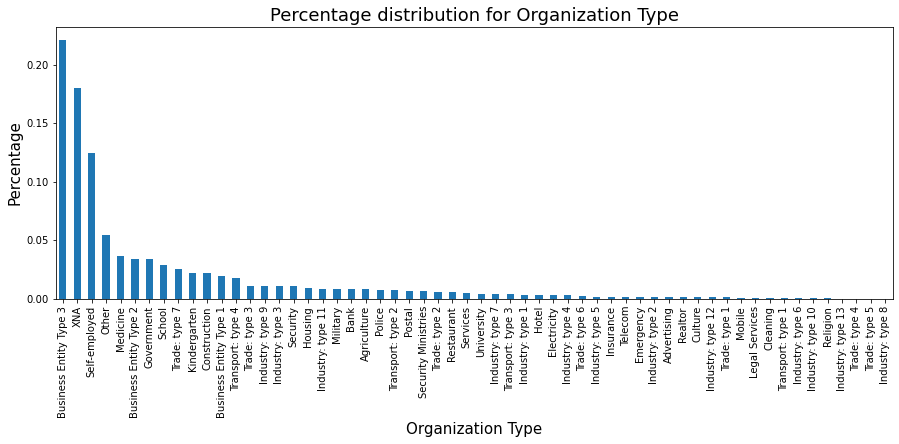

In [63]:
# Plotting the graph to understand different organization types to which the applicants belong to-

plt.figure(figsize=(15,5))
df_current.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("Organization Type",fontsize=15)
plt.ylabel("Percentage",fontsize=15)
plt.title("Percentage distribution for Organization Type",fontsize=18)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants belonging to organization type 'Business Entity Type3' are maximum for applying for the loan__<br>
> __2.  Most of the applicants belonging to different organizations lie within 5% range.__

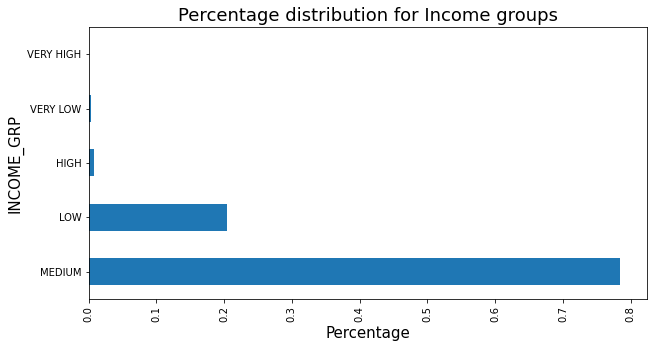

In [64]:
# Plotting the graph to understand different Income groups to which the applicants belong to-

plt.figure(figsize=(10,5))
df_current.INCOME_GRP.value_counts(normalize= True).plot.barh()
plt.xlabel("Percentage",fontsize=15)
plt.ylabel("INCOME_GRP",fontsize=15)
plt.title("Percentage distribution for Income groups",fontsize=18)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Almost 80% of the applicants belong to the Medium Income group and the least belong to Very high Income group__<br>
> __2.  Also, Low Income group contribute to 20% of the total loan applications.__

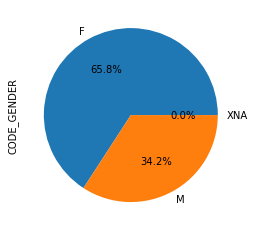

In [65]:
# Plotting the graph to understand different Gender types to which the applicants belong to-

df_current.CODE_GENDER.value_counts(normalize= True).plot.pie(autopct='%1.1f%%')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Majority of loan applications (65.8%) are from female.__<br>


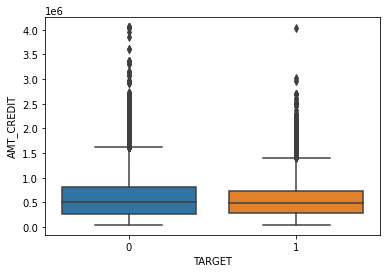

In [66]:
# Plotting the graph to understand distribution of amount credit across different targets

sns.boxplot(data=df_current, x='TARGET',y='AMT_CREDIT')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  People with Payment difficulties have comparatively less Amount credited with an exception of an outlier at around 40 lakhs.__<br>
> __2.  Median value for both the group of people is almost same.__

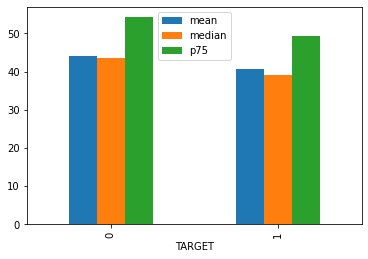

In [67]:
# Plotting the graph to understand different age categories to which the applicants belong to with respect to the target values-

# Function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

df_current.groupby('TARGET').AGE_IN_YRS.aggregate(['mean','median',p75]).plot.bar()
plt.legend(loc='upper center')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  75% of people with payment difficulties are below 45yrs.__<br>
> __2.  On the contrary, 50% of the people below their early 40s have no payment difficulties.__

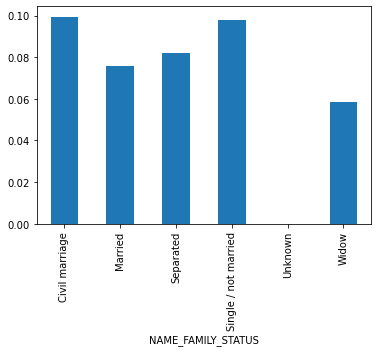

In [68]:
# Plotting the graph to understand different Family status to which the applicants belong to with respect to the target values-

df_current.groupby('NAME_FAMILY_STATUS').TARGET.mean().plot.bar()
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Single and Civil marriage people are the ones with maximum payment difficulties which is about 10%.__<br>
> __2.  All the people belonging to Unknown family status have no payment difficulties.__

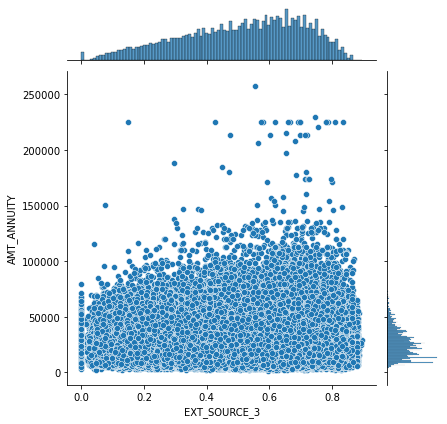

In [69]:
# Plotting the graph to understand the EXT_SORCE_3 rating v/s Amt Annuity.

sns.jointplot(df_current.EXT_SOURCE_3,df_current.AMT_ANNUITY, edgecolor='white')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  With increasing EXT_SOURCE_3, the Amount of Annuity for the applicant keeps increasing.__<br>
> __2.  For some applicants with high values of EXT_SOURCE_3, maximum values of Annuity are assigned.__

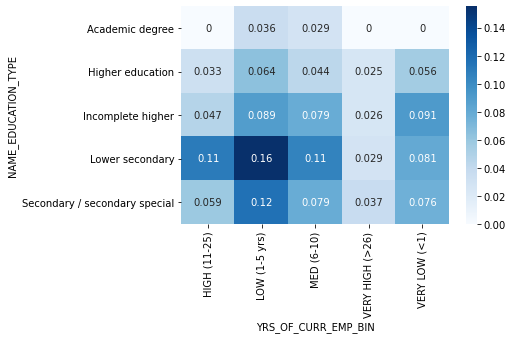

In [70]:
# Plotting a heat map of Education vs Years of current employment vs Target

result=pd.pivot_table(data=df_current, index='NAME_EDUCATION_TYPE',columns='YRS_OF_CURR_EMP_BIN',values='TARGET')
sns.heatmap(result,annot=True,cmap='Blues')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  People with Lower secondary education and experience from 1-5 yrs with the current employer are more prone to payment difficulties.__<br>
> __2.  People with Academic degree and either have expierence more than 11 years or less than a year have no payment difficulties.__<br>
> __3.  Over all, People with experience more than 26yrs with the current employer have least payment difficulties in spite of variation in their education.__

In [71]:
# Creating a function for annotation of bar graphs- Horizontal

def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)


# Creating a function for annotation of bar graphs- Vertical

def ann_v(df):
   
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_width pulls left or right; get_y pushes up or down
        df.text(i.get_width()-.001, i.get_y()+.29, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
    color='black')

   # invert  
    df.invert_yaxis()

    
#annotation with count of variable
def ann_count(df):
    for q in df.patches:
        df.annotate(format(q.get_height(), '.2f'), (q.get_x() + q.get_width() / 2., q.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### <font color=purple>___<u>UNIVARIENT ANALYSIS</u>___

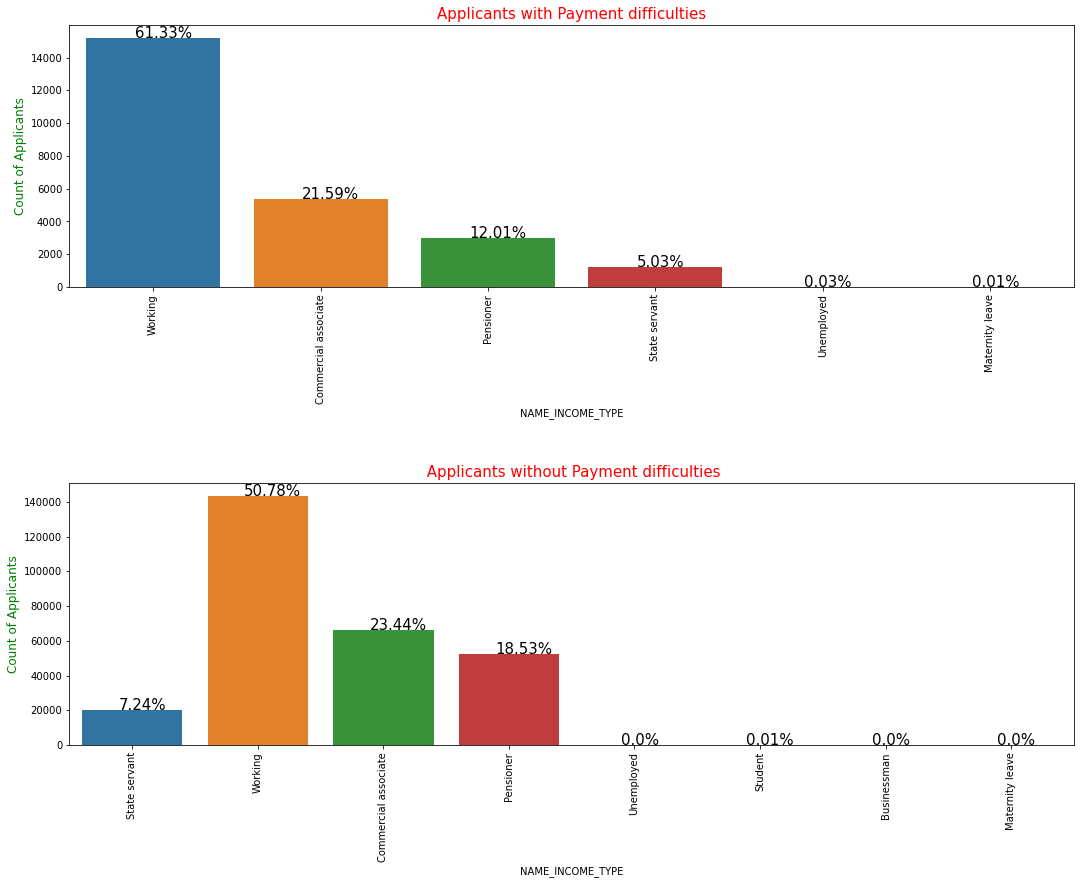

In [72]:
# Univarient categorical unordered- Understanding repayments across different Income types

plt.figure(figsize=(18,10))# sizing
plt.subplot(2,1,1)#subplot 1
T1=sns.countplot(df_cur_T1['NAME_INCOME_TYPE'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(2,1,2)#subplot 2
T0=sns.countplot(df_cur_T0['NAME_INCOME_TYPE'])
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

ann_h(T1)
ann_h(T0)

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.2, hspace=0.75)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants which belong to 'Working' income type top both the lists of highest repaying and non-repaying applicants. But it is the only category with payment difficulties more than the paying ones. Thus it is quite dicy and we need to take other factors into consideration__<br>
> __2.  Pensioner, State servant and Commercial associate applicants with payment difficulties have been less as compared to the ones who are paying.__<br>
> __3.  Student and Businessman are the ones who did not fail to repay even once.__

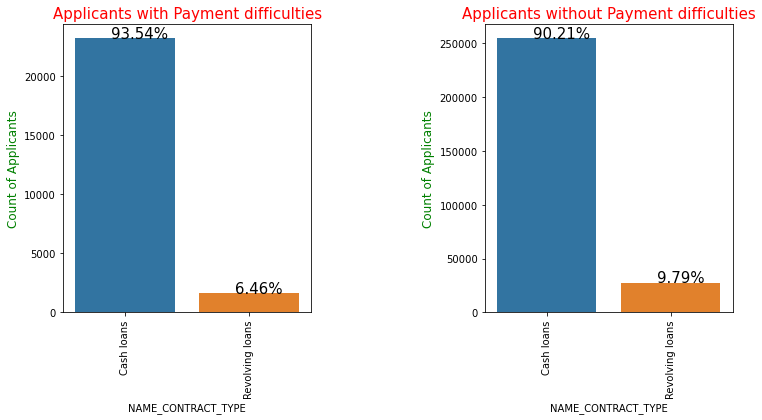

In [73]:
# Univarient categorical unordered- Understanding repayments across different Contract types

plt.figure(figsize=(12,4))# sizing
plt.subplot(1,2,1)#subplot 1
T1=sns.countplot(df_cur_T1['NAME_CONTRACT_TYPE'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=sns.countplot(df_cur_T0['NAME_CONTRACT_TYPE'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.7, hspace=0.1)

ann_h(T0)
ann_h(T1)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants have majorly applied for Cash loans and equal percentage of people fall into paying and defaulter category.__<br>
> __2.  Applicants with revolving loans have been comparatively repaying their loans in timely manner than the cash loans.__

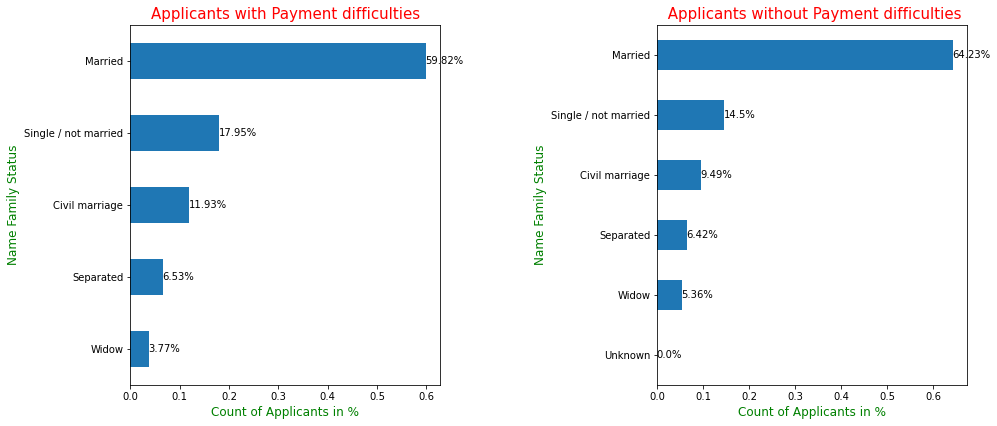

In [74]:
# Univarient categorical unordered- Understanding repayments across different Family Status

plt.figure(figsize=(15,5))# sizing
plt.subplot(1,2,1)#subplot 1
T1=df_cur_T1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count of Applicants in %',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})
plt.ylabel('Name Family Status',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=df_cur_T0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count of Applicants in %',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})
plt.ylabel('Name Family Status',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.7, hspace=0.1)
ann_v(T0)
ann_v(T1)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants with Civil marriage and Single/ not married are the ones with higher percentage of non-repayments__<br>
> __2.  Applicants belonging to Unknown category did not fail to repay even once.__<br>
> __3.  Widow and Married % are comparatively repaying back.__ 

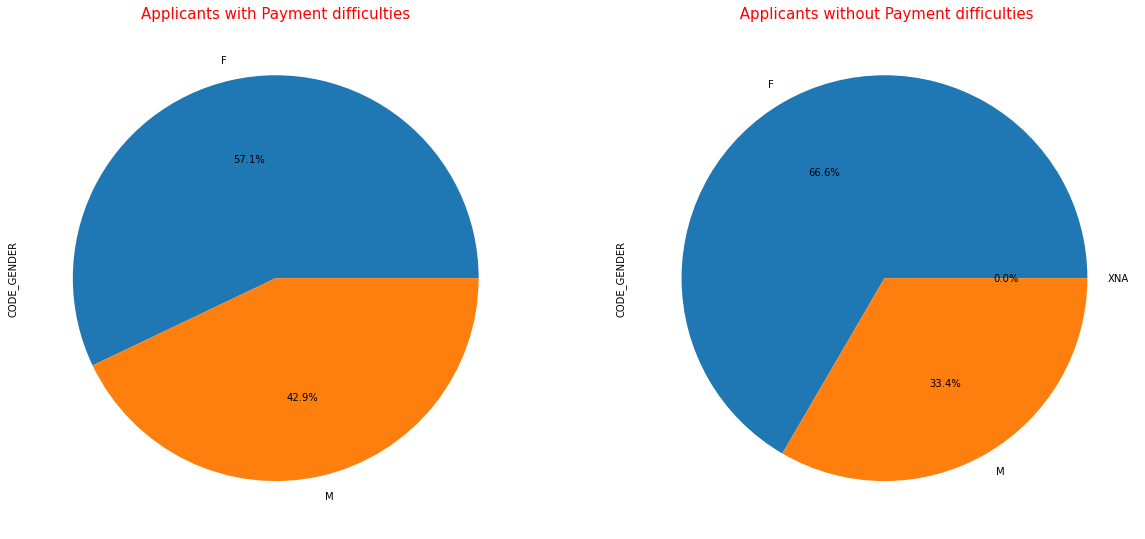

In [75]:
# Univarient categorical unordered- Understanding repayments across different Gender

plt.figure(figsize=(20,10))# sizing
plt.subplot(1,2,1)#subplot 1
df_cur_T1.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

plt.subplot(1,2,2)#subplot 2
df_cur_T0.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Females are repaying back more in timely manner as compared to the men__<br>
> __2.  People who have not disclosed their gender did not face any payment difficulties.__

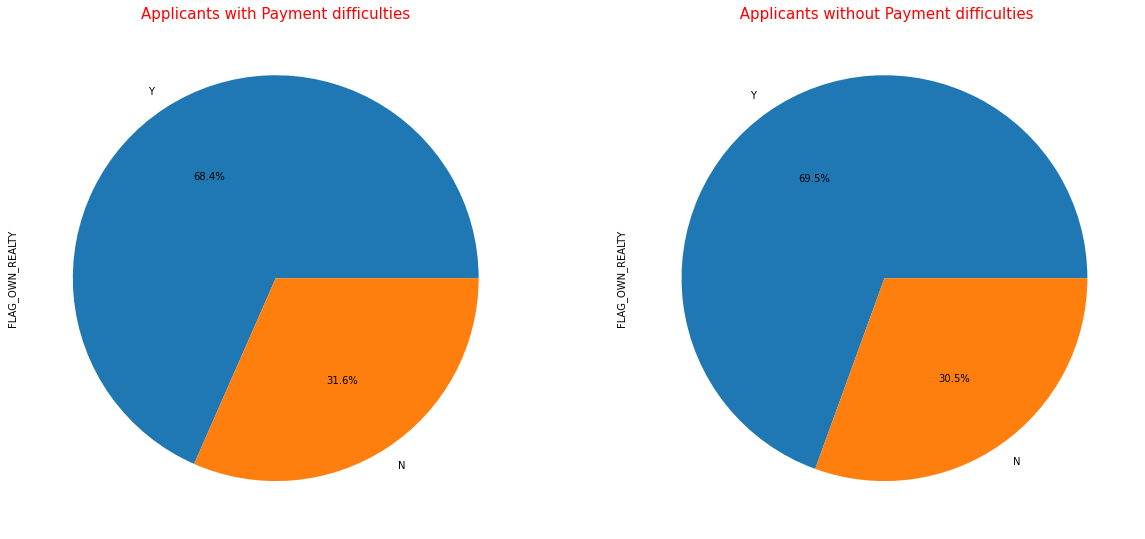

In [76]:
# Univarient categorical unordered- Understanding repayments across different applicants who own a property or not

plt.figure(figsize=(20,10))# sizing
plt.subplot(1,2,1)#subplot 1
df_cur_T1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

plt.subplot(1,2,2)#subplot 2
df_cur_T0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants owning a realty have faced little less difficulties while repaying than the ones who do not own__

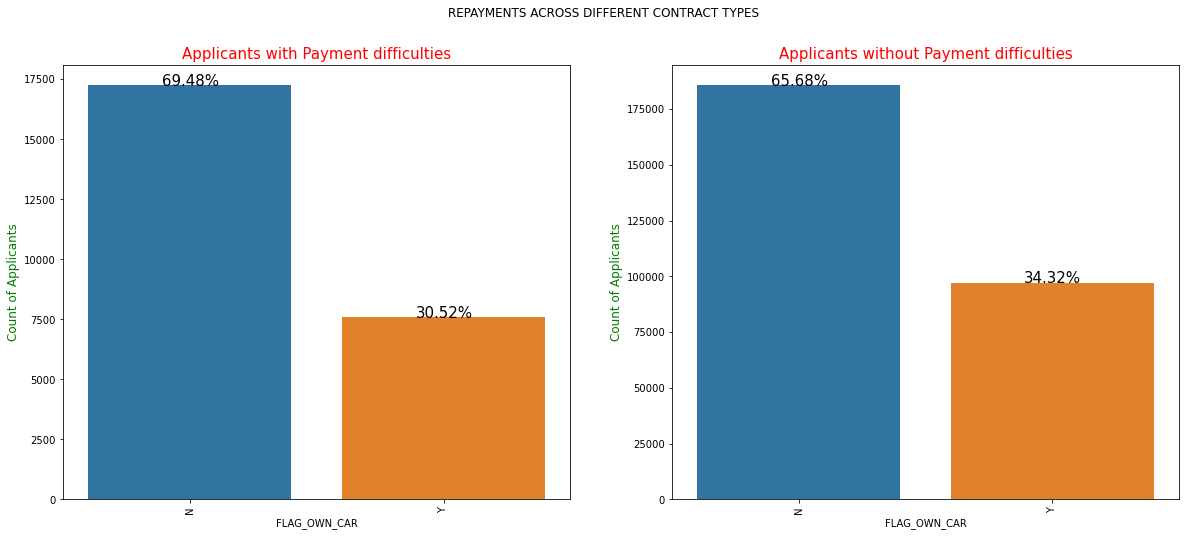

In [77]:
# Univarient categorical unordered- Understanding repayments across different applicants who own a car or not

plt.figure(figsize=(20,8))# sizing
plt.suptitle("REPAYMENTS ACROSS DIFFERENT CONTRACT TYPES",fontdict={'fontsize':10000, 'fontweight':50})
plt.subplot(1,2,1)#subplot 1
T1=sns.countplot(df_cur_T1['FLAG_OWN_CAR'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=sns.countplot(df_cur_T0['FLAG_OWN_CAR'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

ann_h(T0)
ann_h(T1)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants who do not own a car tops both the list for not paying back and repaying__<br>
> __2.  However whether the applicant owns a car or not the percentage of people paying back are more.__

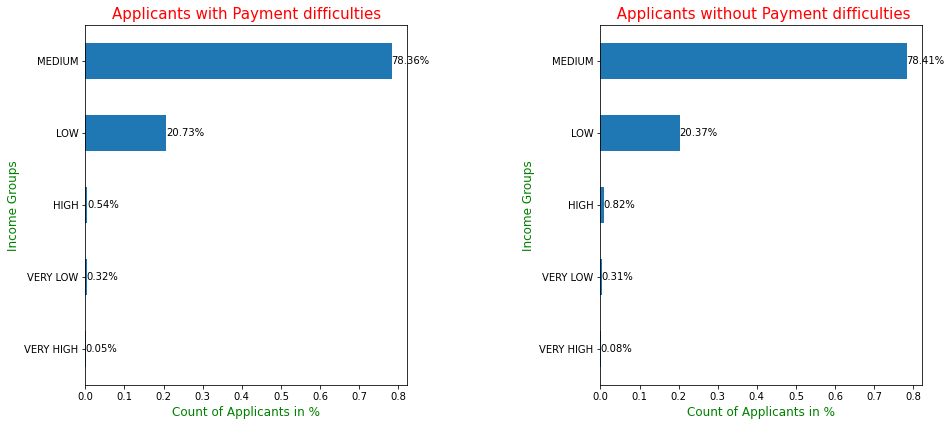

In [78]:
# Univarient categorical Ordered- Understanding repayments across different Income Groups

plt.figure(figsize=(15,5))# sizing
plt.subplot(1,2,1)#subplot 1
T1=df_cur_T1.INCOME_GRP.value_counts(normalize=True).plot.barh()
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count of Applicants in %',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})
plt.ylabel('Income Groups',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=df_cur_T0.INCOME_GRP.value_counts(normalize=True).plot.barh()
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count of Applicants in %',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})
plt.ylabel('Income Groups',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

ann_v(T0)
ann_v(T1)
plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.6, hspace=0.75)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants belonging to Medium and High income groups have been paying back in a better way.__<br>
> __2.  However equal percentages of applicants belong to Low, Very Low and Very High who pay and who do not pay.__

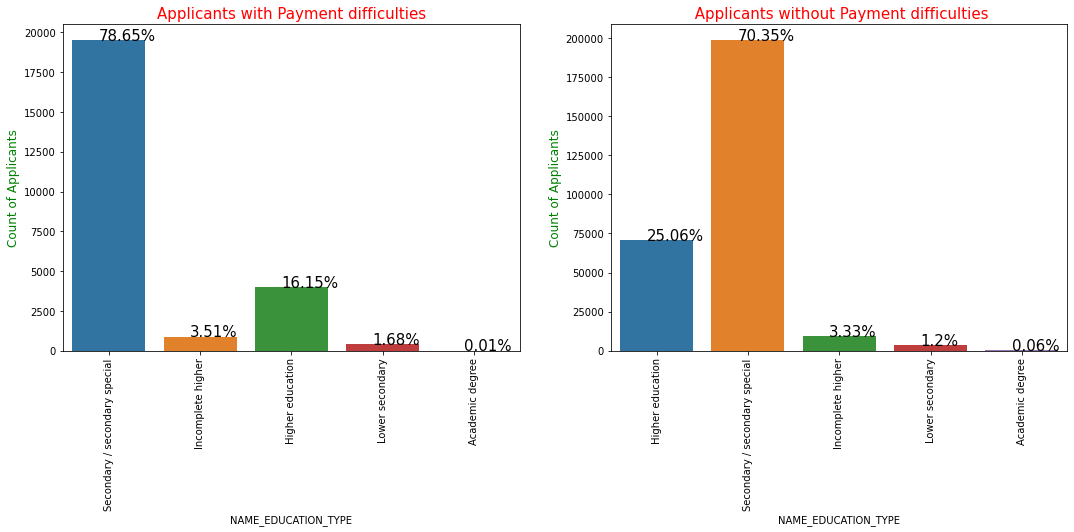

In [79]:
# Univarient categorical ordered- Understanding repayments across different Education Types

plt.figure(figsize=(18,6))# sizing
plt.subplot(1,2,1)#subplot 1
T1=sns.countplot(df_cur_T1['NAME_EDUCATION_TYPE'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=sns.countplot(df_cur_T0['NAME_EDUCATION_TYPE'])
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})
ann_h(T0)
ann_h(T1)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants with Higher education are better category who repay their loans in duely manner__<br>
> __2.  However Secondary/ Secondary special applicants has a huge pool who apply for loans and quite a large percentage repays them too, so we can consider them for approving loans based on some more factors.__

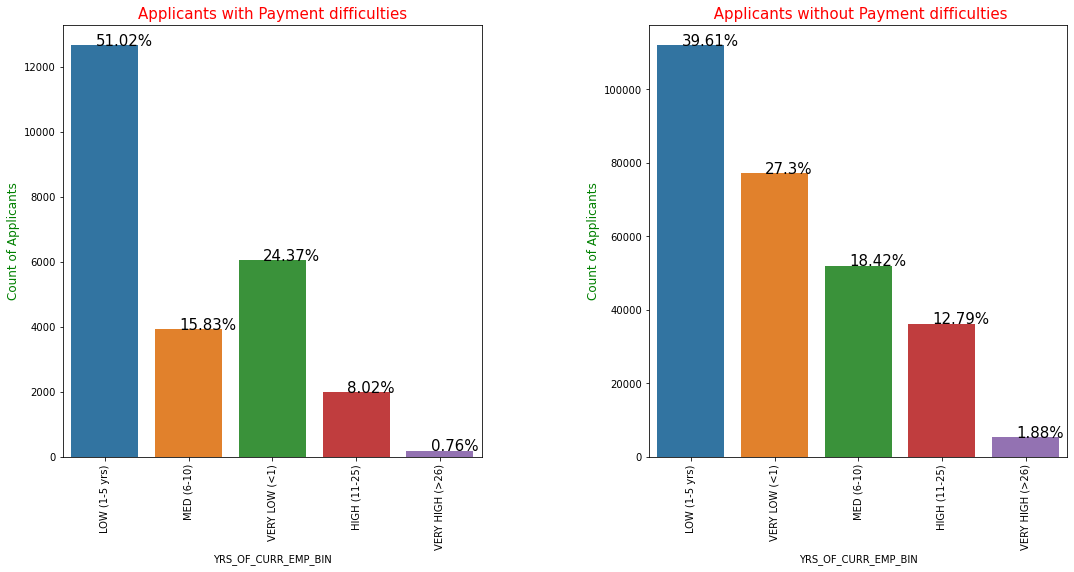

In [80]:
# Univarient categorical ordered- Understanding repayments across different values of YRS_OF_CURR_EMP_BIN

plt.figure(figsize=(18,6))# sizing
plt.subplot(1,2,1)#subplot 1
T1=sns.countplot(df_cur_T1['YRS_OF_CURR_EMP_BIN'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplot(1,2,2)#subplot 2
T0=sns.countplot(df_cur_T0['YRS_OF_CURR_EMP_BIN'])
plt.title(' Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count of Applicants',fontdict={'fontsize':12, 'fontweight':10, 'color':'Green'})

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.4, hspace=0.75)
ann_h(T0)
ann_h(T1)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  People belonging to experience of 1-5 yrs have maximum payment difficulties but they do top the other list.__<br>
> __2.  High and Very High experienced people have higher percentages in repaying their loans without any difficulty.__

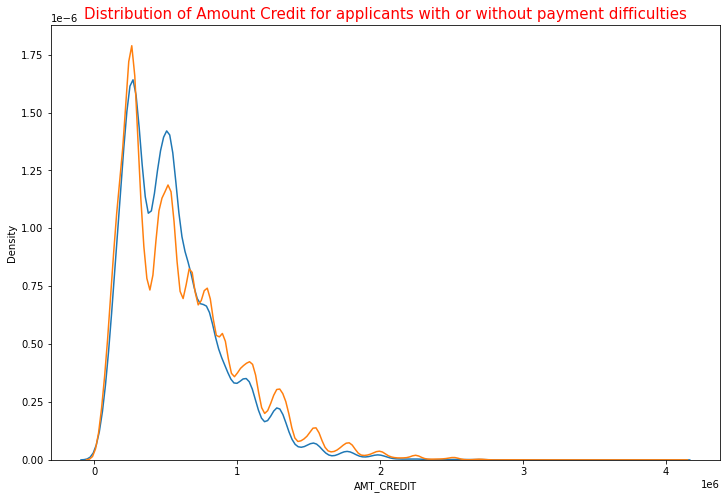

In [81]:
# Univarient continuous: Understanding distribution of Amount Credit 

fig=plt.figure(figsize=(12,8))
sns.distplot(df_cur_T1['AMT_CREDIT'],hist=False, label='Payment Difficulties')
sns.distplot(df_cur_T0['AMT_CREDIT'],hist=False, label='No Payment Difficulties')
plt.title('Distribution of Amount Credit for applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Credit amount follows almost similar trend for both the defaulters and non defaulters__<br>
> __2.  But Credit amount between 5-10 lakhs has more number of people with payment difficulties.__

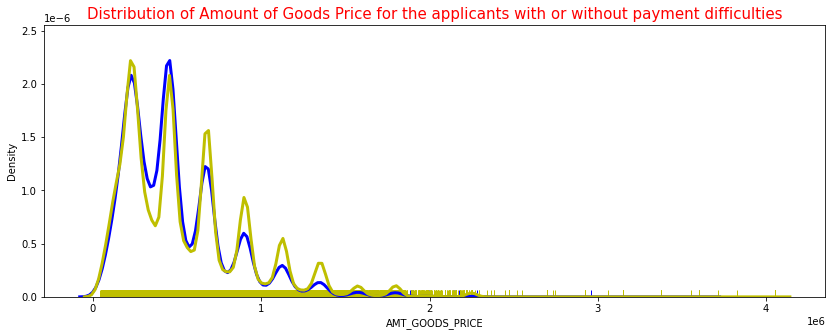

In [82]:
# Univarient continous: Understanding distribution of Amount of Goods Price

fig=plt.figure(figsize=(14,5))
ax = sns.distplot(df_cur_T1['AMT_GOODS_PRICE'], rug=True, rug_kws={"color": "b"},
                  kde_kws={"color": "b", "lw": 3, "label":'Payment Difficulties'},hist=False)
              
ax = sns.distplot(df_cur_T0['AMT_GOODS_PRICE'], rug=True, rug_kws={"color": "y"},
                  kde_kws={"color": "y", "lw": 3, "label":'No Payment Difficulties'},hist=False)
plt.title('Distribution of Amount of Goods Price for the applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Goods Price amount follows almost similar trend for both the defaulters and non defaulters__<br>
> __2.  But Goods Price amount between 3-5 lakhs has more number of people with payment difficulties.__

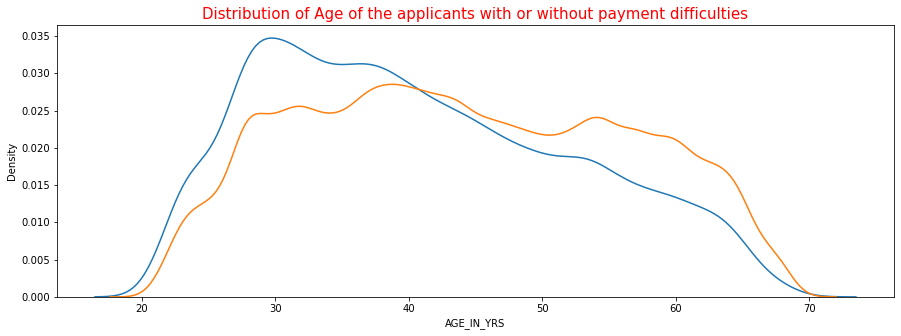

In [83]:
# Univarient continous: Understanding distribution of Age of applicants

fig=plt.figure(figsize=(15,5))
sns.distplot(df_cur_T1['AGE_IN_YRS'],hist=False, label='Payment Difficulties')
sns.distplot(df_cur_T0['AGE_IN_YRS'],hist=False, label='No Payment Difficulties')
plt.title('Distribution of Age of the applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Most of the applicants below 40 years have more payment difficulties.__<br>
> __2.  With higher age the payment difficulty keeps decreasing, However applicants with no payment difficulty has quite a steady distribution.__

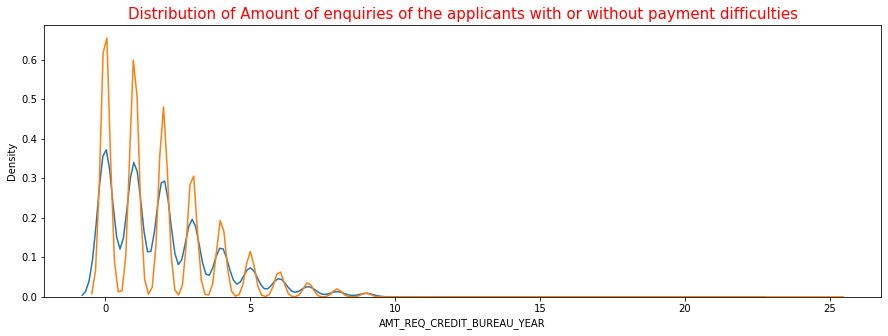

In [84]:
# Univarient continous: Understanding distribution of AMT_REQ_CREDIT_BUREAU_YEAR

fig=plt.figure(figsize=(15,5))
sns.distplot(df_cur_T1['AMT_REQ_CREDIT_BUREAU_YEAR'],hist=False, label='Payment Difficulties')
sns.distplot(df_cur_T0['AMT_REQ_CREDIT_BUREAU_YEAR'],hist=False, label='No Payment Difficulties')
plt.title('Distribution of Amount of enquiries of the applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Irrespective of any number of enquiries by the bureau, applicants with no payment difficulties are comparatively more.__

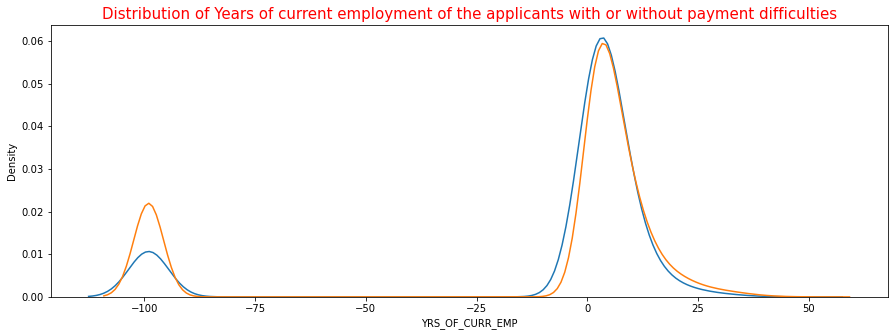

In [85]:
# Univarient continous: Understanding distribution of Years of current employment of applicants

fig=plt.figure(figsize=(15,5))
sns.distplot(df_cur_T1['YRS_OF_CURR_EMP'],hist=False, label='Payment Difficulties')
sns.distplot(df_cur_T0['YRS_OF_CURR_EMP'],hist=False, label='No Payment Difficulties')
plt.title('Distribution of Years of current employment of the applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  With 0-20yrs of period with the current employer, more people have been defaulters as compared to the non-defaulters__<br>
> __2.  However, With greater experience with the employer, the payment difficulties no longer exist.__<br>
> __3.  Negative years of current employment just symbolise missing values.__

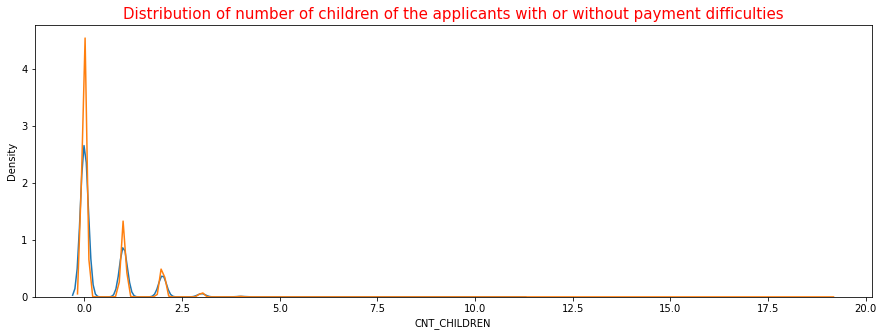

In [86]:
# Univarient continous: Understanding distribution of no of children of applicants

fig=plt.figure(figsize=(15,5))
sns.distplot(df_cur_T1['CNT_CHILDREN'],hist=False, label='Payment Difficulties')
sns.distplot(df_cur_T0['CNT_CHILDREN'],hist=False, label='No Payment Difficulties')
plt.title('Distribution of number of children of the applicants with or without payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Majority of applicants with no child has payment difficulties.__<br>
> __2.  No of applicants with payment difficulties keep decreasing with the increase in the count of children.__

##     

### <font color=purple>___BIVARIENT & MULTIVARIENT ANALYSIS___

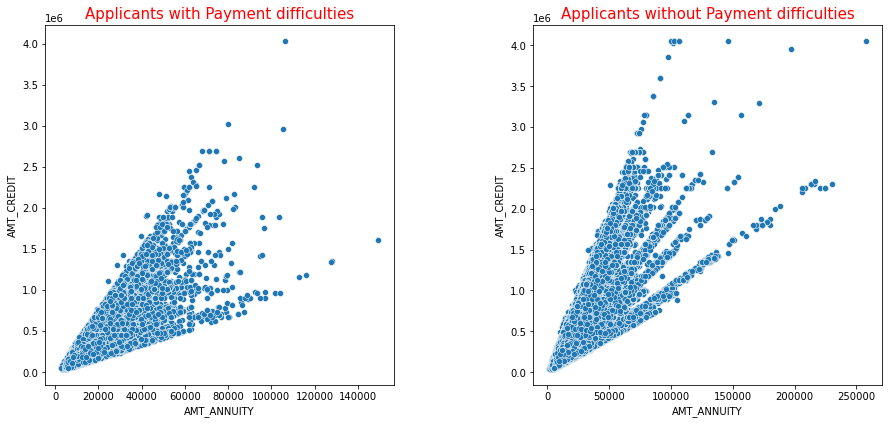

In [87]:
# Bivarient Continuous-Continuous: AMT_ANNUITY v/s AMT_CREDIT

plt.figure(figsize=(15,5))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['AMT_ANNUITY'],df_cur_T1['AMT_CREDIT'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})



plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['AMT_ANNUITY'],df_cur_T0['AMT_CREDIT'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.4, hspace=0.75)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Annuity amount is directly proportional to the credit amount in both the cases.__<br>
> __2.  Greater the annuity lesser is the payment difficulty.__

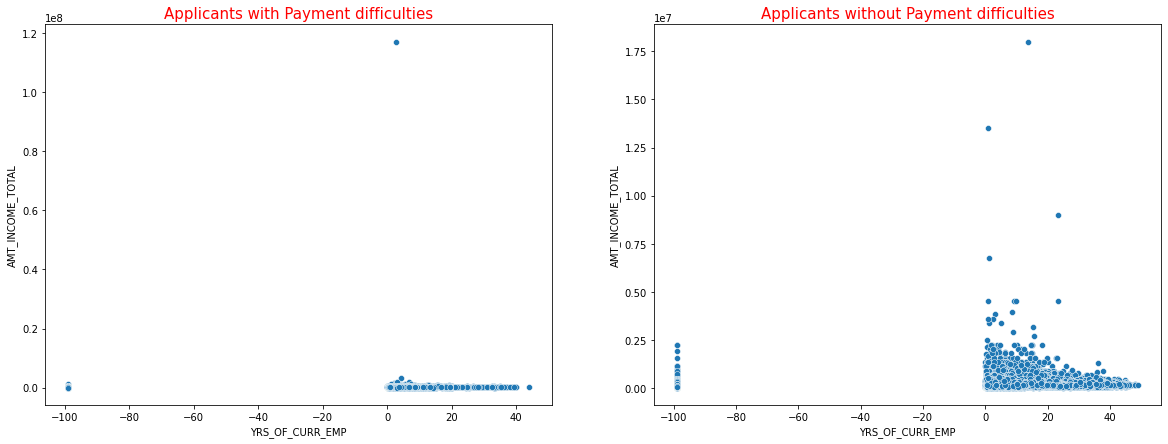

In [88]:
# Bivarient Continuous-Continuous: YRS_OF_CURR_EMP v/s AMT_INCOME

plt.figure(figsize=(20,7))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['YRS_OF_CURR_EMP'],df_cur_T1['AMT_INCOME_TOTAL'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['YRS_OF_CURR_EMP'],df_cur_T0['AMT_INCOME_TOTAL'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants whose Income did not increase with years of employment face payment difficulties.__<br>
> __2.  The negative value of years of employment just symbolises the missing values.__

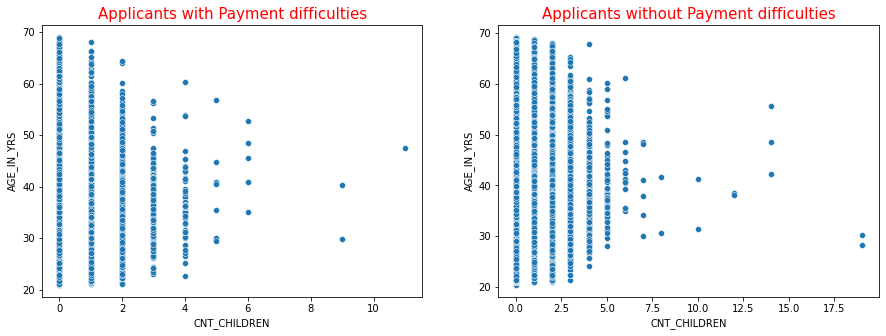

In [89]:
# Bivarient Continuous-Continuous: CNT_CHILDREN v/s AGE_IN_YRS

plt.figure(figsize=(15,5))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['CNT_CHILDREN'],df_cur_T1['AGE_IN_YRS'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['CNT_CHILDREN'],df_cur_T0['AGE_IN_YRS'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Lesser the number of children, more the payment difficulties.__<br>
> __2.  With increasing age, payment difficulties are reduced.__

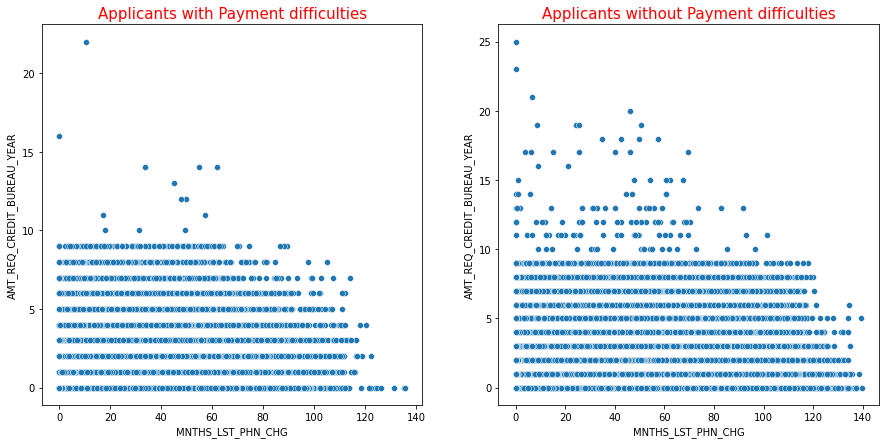

In [90]:
# Bivarient Continuous-Continuous: MNTHS_LST_PHN_CHG v/s AMT_REQ_CREDIT_BUREAU_YEAR

plt.figure(figsize=(15,7))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['MNTHS_LST_PHN_CHG'],df_cur_T1['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['MNTHS_LST_PHN_CHG'],df_cur_T0['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  With increased number of credit enquiries from the bureau for an year, the payment difficulties are reduced, irrespective of no of months of last phone change.__<br>
> __2.  However with increased no of months of last phone change, payment difficulties are reduced.__

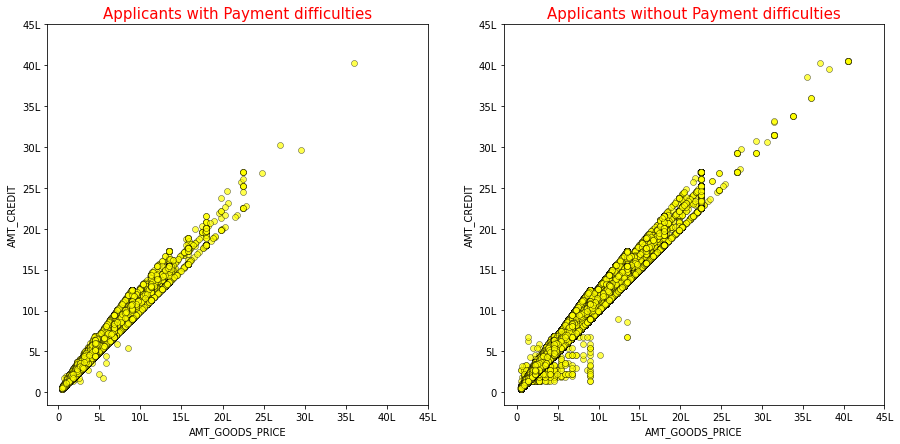

In [91]:
# Bivarient Continuous-Continuous: AMT_GOODS_PRICE v/s AMT_CREDIT

plt.figure(figsize=(15,7))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['AMT_GOODS_PRICE'],df_cur_T1['AMT_CREDIT'], edgecolor='black', alpha=0.7, color='yellow')
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
xtick_values=np.arange(0,4500001,500000)
xtick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.xticks(xtick_values,xtick_labels)
ytick_values=np.arange(0,4500001,500000)
ytick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.yticks(ytick_values,ytick_labels)


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['AMT_GOODS_PRICE'],df_cur_T0['AMT_CREDIT'], edgecolor='black', alpha=0.7, color='yellow')
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
xtick_values=np.arange(0,4500001,500000)
xtick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.xticks(xtick_values,xtick_labels)
ytick_values=np.arange(0,4500001,500000)
ytick_labels=['0','5L','10L','15L','20L','25L','30L','35L','40L','45L']
plt.yticks(ytick_values,ytick_labels)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  People with Payment difficulties had lower credit amount for same amount of goods price (>15L) as that of no defaulters.__<br>

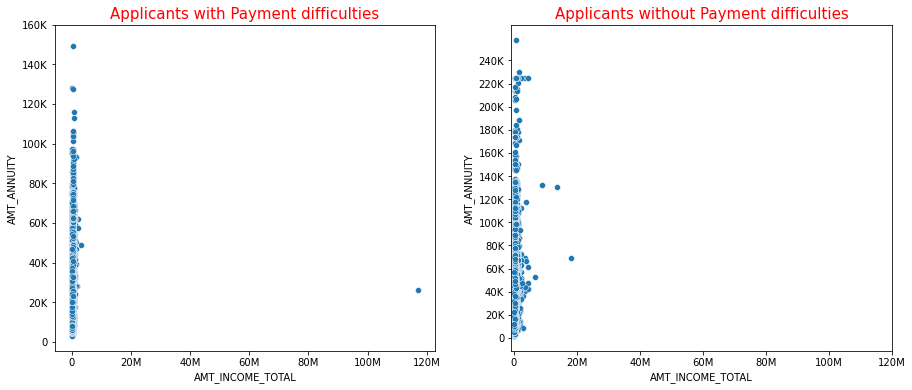

In [92]:
# Bivarient Continuous-Continuous: AMT_INCOME_TOTAL v/s AMT_ANNUITY

plt.figure(figsize=(15,6))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(df_cur_T1['AMT_INCOME_TOTAL'],df_cur_T1['AMT_ANNUITY'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
xtick_values=np.arange(0,120000001,20000000)
xtick_labels=['0','20M','40M','60M','80M','100M','120M']
plt.xticks(xtick_values,xtick_labels)
ytick_values=np.arange(0,160001,20000)
ytick_labels=['0','20K','40K','60K','80K','100K','120K','140K','160K']
plt.yticks(ytick_values,ytick_labels)


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(df_cur_T0['AMT_INCOME_TOTAL'],df_cur_T0['AMT_ANNUITY'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
xtick_values=np.arange(0,120000001,20000000)
xtick_labels=['0','20M','40M','60M','80M','100M','120M']
plt.xticks(xtick_values,xtick_labels)
ytick_values=np.arange(0,250001,20000)
ytick_labels=['0','20K','40K','60K','80K','100K','120K','140K','160K','180K','200K','220K','240K']
plt.yticks(ytick_values,ytick_labels)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  People with Payment difficulties had lower annuity as compared to the ones repaying on duely manner.__<br>
> __2.  People with no payment difficulties have better income which does impact the annuity in a positive way in minute level.__

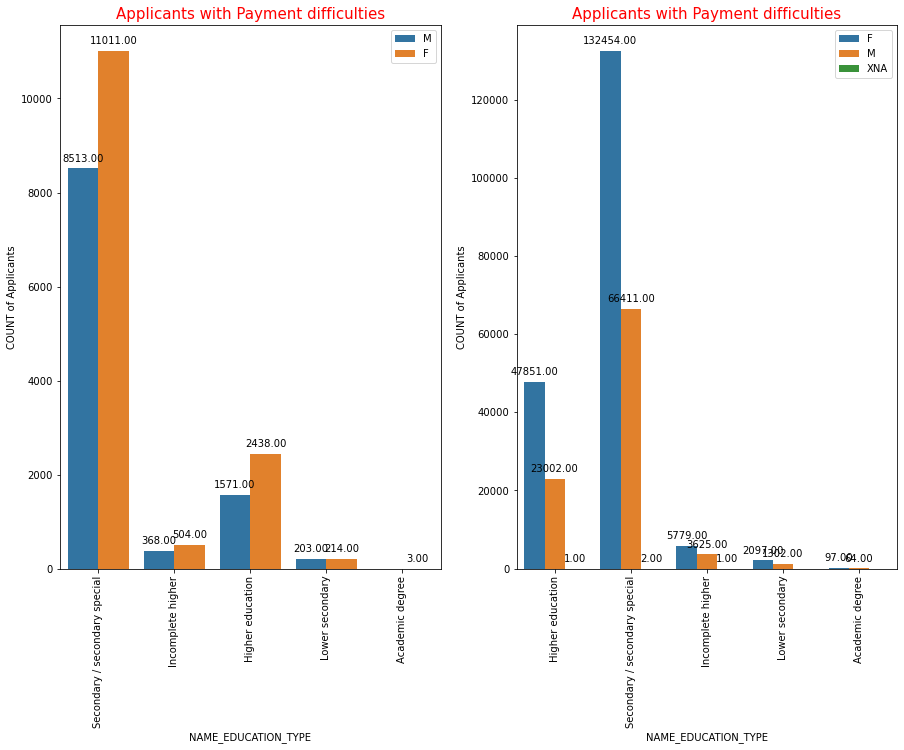

In [93]:
# Bivarient Categorical-Categorical: NAME_EDUCATION_TYPE v/s CODE_GENDER

plt.figure(figsize=(15,10))# sizing
plt.subplot(1,2,1)#subplot 1
T1=sns.countplot(df_cur_T1['NAME_EDUCATION_TYPE'],hue=df_cur_T1['CODE_GENDER'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('COUNT of Applicants')
plt.legend(loc='upper right') 

plt.subplot(1,2,2)#subplot 2
T0=sns.countplot(df_cur_T0['NAME_EDUCATION_TYPE'],hue=df_cur_T0['CODE_GENDER'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('COUNT of Applicants')
plt.legend(loc='upper right') 

ann_count(T1)
ann_count(T0)
   
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Female with secondary education has major payment difficulties whereas male with academic degree have no payment issues__<br>
> __2.  Overall we can see that there are less male defaulters as we also have less male applicants.__<br>
> __3.  Person with not gender disclosed has Academic degree and no payment difficulty.__

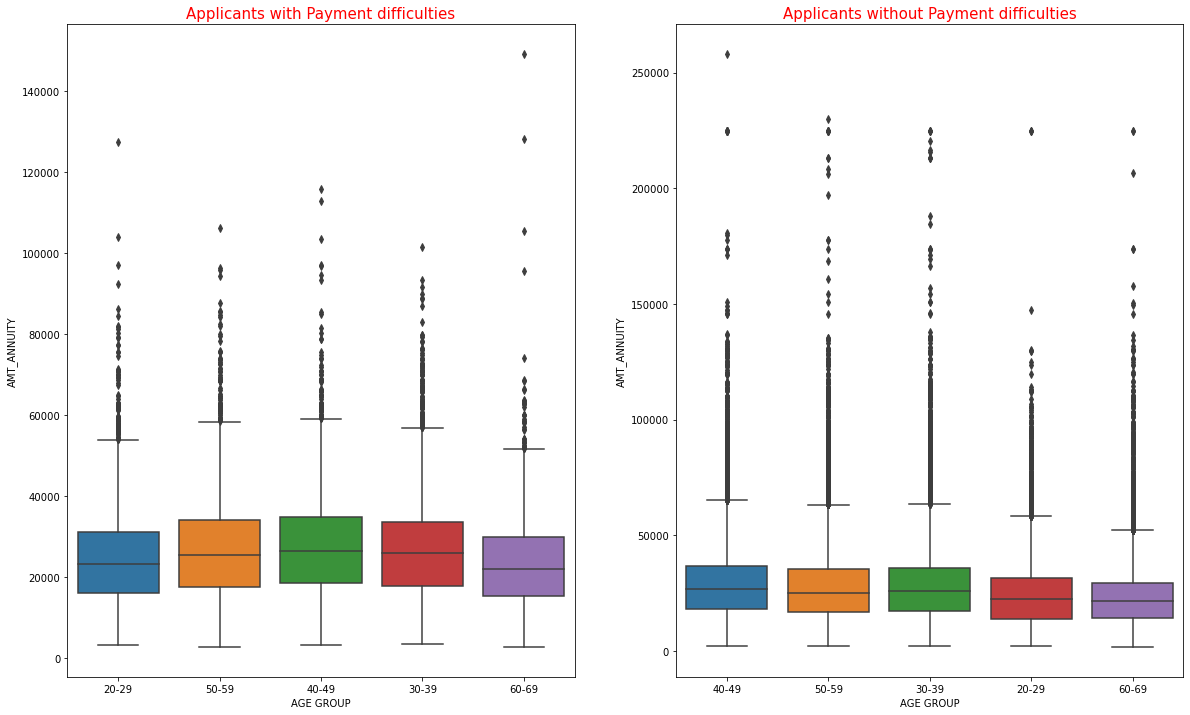

In [94]:
# Bivarient Categorical-Continuous: AGE_GROUP_BIN v/s AMT_ANNUITY

plt.figure(figsize=(20,12))# sizing
plt.subplot(1,2,1)#subplot 1
sns.boxplot(x=df_cur_T1.AGE_GROUP_BIN, y=df_cur_T1.AMT_ANNUITY, data=df_cur_T1)
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xlabel('AGE GROUP')

plt.subplot(1,2,2)#subplot 2
sns.boxplot(x=df_cur_T0.AGE_GROUP_BIN, y=df_cur_T0.AMT_ANNUITY, data=df_cur_T0)
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xlabel('AGE GROUP')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  75% of the applicants in both the categories have annuity less than 30000 accross all the age groups.__<br>
> __2.  With more the number of outliers in the no payment difficulty graph, we can state that higher annuity is assigned to the people with no payment difficulty.__

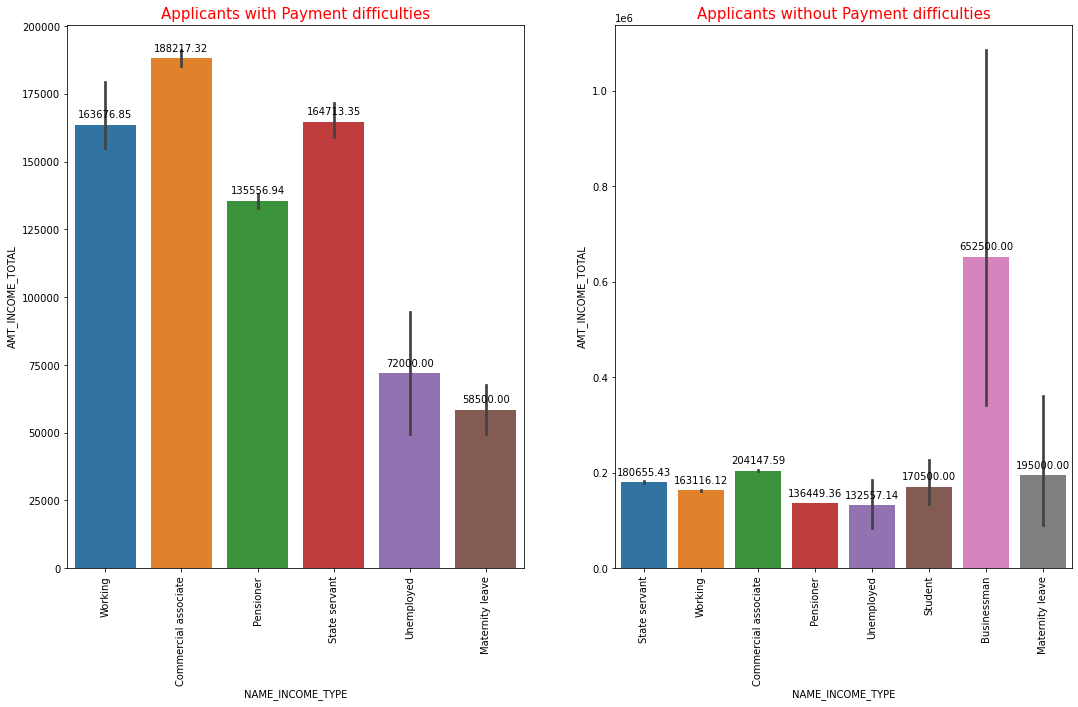

In [95]:
#Bivarient categorical-Continous: NAME INCOME TYPE VS AMT_INCOME

plt.figure(figsize=(18,10))# sizing
plt.subplot(1,2,1)#subplot 1
T1=sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=df_cur_T1)
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1,2,2)#subplot 2
T0=sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=df_cur_T0)
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

ann_count(T1)
ann_count(T0)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Applicants with Working Income type top both the list, thus proper profile check is needed.__<br>
> __2.  Student and Businessman had never faced any payment difficulty.__<br>
> __3.  In spite of being unemployed or on maternity leave or State Servant, applicants had lesser payment difficulties.__

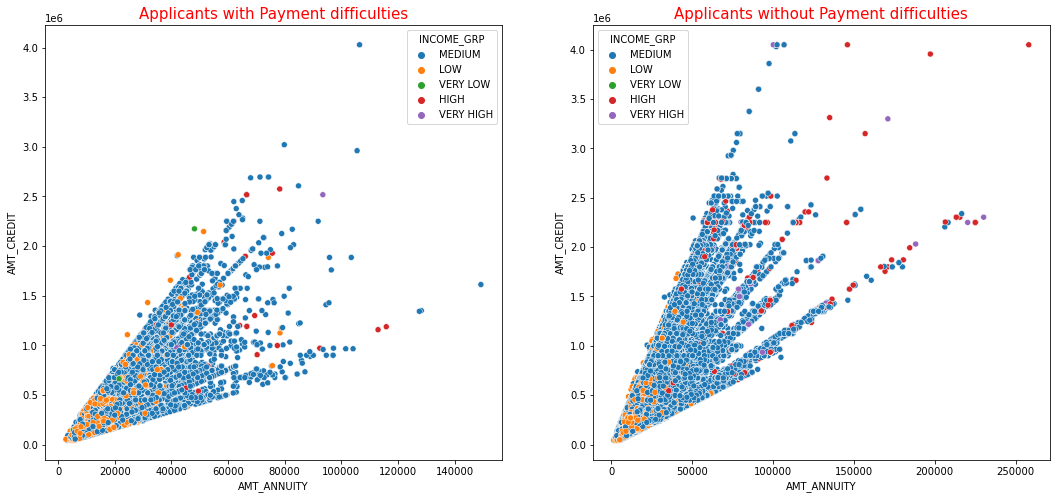

In [96]:
# Multivarient: AMT_ANNUTITY VS AMT_CREDIT with INCOME TYPE

plt.figure(figsize=(18,8))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(x=df_cur_T1['AMT_ANNUITY'],y=df_cur_T1['AMT_CREDIT'], hue=df_cur_T1['INCOME_GRP'])
plt.title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})


plt.subplot(1,2,2)#subplot 2
sns.scatterplot(x=df_cur_T0['AMT_ANNUITY'],y=df_cur_T0['AMT_CREDIT'], hue=df_cur_T0['INCOME_GRP'])
plt.title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Annuity amount is directly proportional to the credit amount in both the cases, however people belonging too lower income group are comparatively more for Payment difficulties' category.__<br>
> __2.  Greater the annuity  and more the medium and high income group applicants, lesser is the payment difficulty.__

In [97]:
# Multivarient: CODE_GENDER VS COUNT_of_DOC with DAYS_ID_PUBLISH

# Create a pivot table for Content Rating and updated Month with the values set to Installs
res0=pd.pivot_table(data=df_cur_T0, values='DAYS_ID_PUBLISH', index='COUNT_of_DOC',columns='CODE_GENDER',aggfunc=np.sum)
res1=pd.pivot_table(data=df_cur_T1, values='DAYS_ID_PUBLISH', index='COUNT_of_DOC',columns='CODE_GENDER',aggfunc=np.sum)

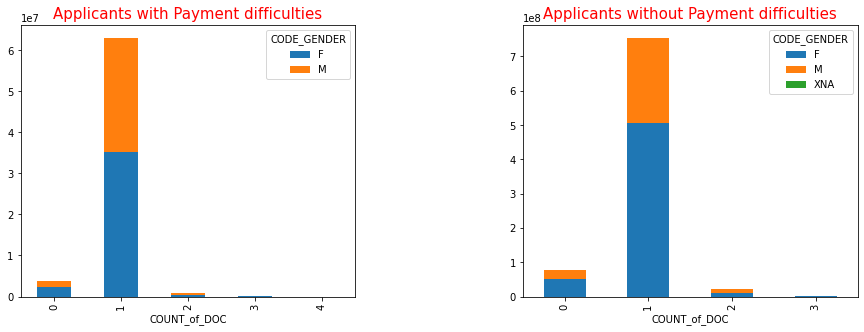

In [98]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(15,5))
fig.subplots_adjust(wspace=0.5)
res1.plot(kind='bar',stacked=True, ax=ax1)
res0.plot(kind='bar',stacked=True,ax=ax2)
ax1.set_title('Applicants with Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
ax2.set_title('Applicants without Payment difficulties',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Most of the female and male submitted only 1 document have payment difficulties even if the days of their ID published is quite high.__<br>
> __2.  Comparatively more male have payment difficulties across any no of days of their ID published or any number of documents submitted.__

<Figure size 720x864 with 0 Axes>

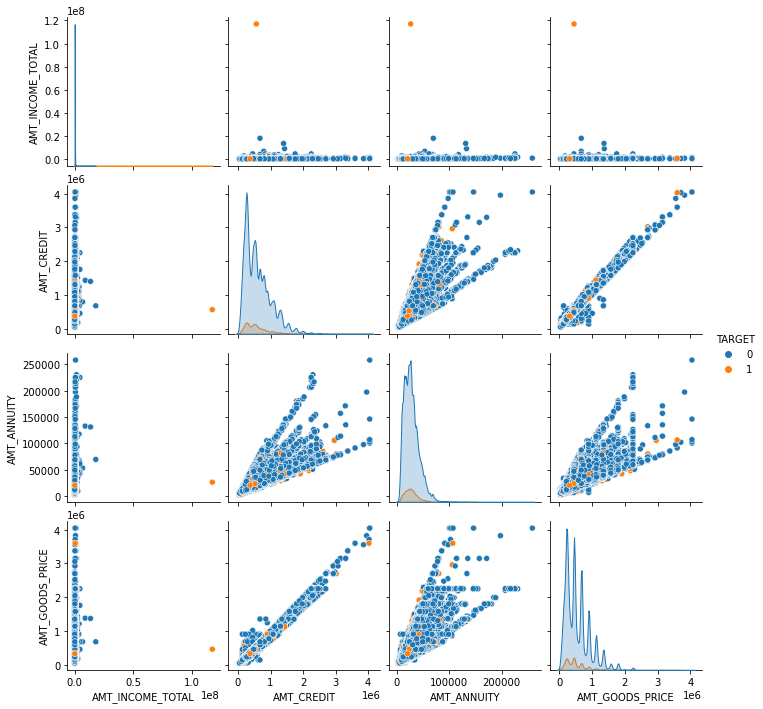

In [99]:
# Multivarient: AMT_INCOME_TOTAL VS AMT_CREDIT AMT_ANNUTITY VS AMT_GOODS_PRICE with TARGET

plt.figure(figsize=(10,12))
sns.pairplot(data=df_current, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'],hue="TARGET")

plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  One applicant with extremely high income has payment difficulty, so thorough check is required.__<br>
> __2.  Applicants with increased value in income, credit amount and goods price do increase but annuity reaches no more than 1.5 lakhs.__<br>
> __3. Applicants with payment issues, have linear graph of credit amount with annuity and goods price just like no deafaulters but credit amount merely goes beyond 30L.__<br>
> __4. Annuity follows exactly same trend with Credit amount and goods price amount, but annuity for defaulters does not grow beyond 1.5 lakhs.__<br>
> __5. For all the amounts discussed, both the category of applicants almost follow similar trend till the point it is restricted.__


In [100]:
# Multivarient: YRS_OF_CURR_EMP_BIN VS FLAG_OWN_REALTY with AMT Credit

# Creating pivots to use it in the heat maps of both Target 1 and 0
res0=pd.pivot_table(data=df_cur_T0,index='YRS_OF_CURR_EMP_BIN',columns='FLAG_OWN_REALTY',values='AMT_CREDIT',aggfunc=lambda x:np.quantile(x,0.95))
res1=pd.pivot_table(data=df_cur_T1,index='YRS_OF_CURR_EMP_BIN',columns='FLAG_OWN_REALTY',values='AMT_CREDIT',aggfunc=lambda x:np.quantile(x,0.95))

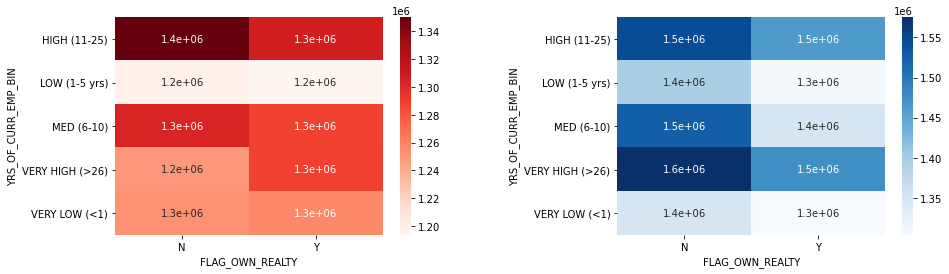

In [101]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(15,4))
fig.subplots_adjust(wspace=0.5)
sns.heatmap(res1,cmap='Reds',annot=True, ax=ax1)
sns.heatmap(res0,cmap='Blues',annot=True, ax=ax2)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  For 95% of the people with payment difficulties, have credit amount is maximum for high experience and no owned property however it is less than applicants with no payment difficulties.__<br>
> __2.  Least amount is credited for low experience group who owns a property for applicants belonging to defaulters group.__<br>
> __3. Applicants with payment difficulties have either same or less credit amount for all the years of experience even if you own a property expect if your experience with current employer is >26.__<br>
> __4. 95% of the applicants without any payment difficulties have less amount credited if they own a property irrespective of their years of experience.__<br>
> __5. Maximum amount is credited for very high experience and no property owned applicants in safe category.__


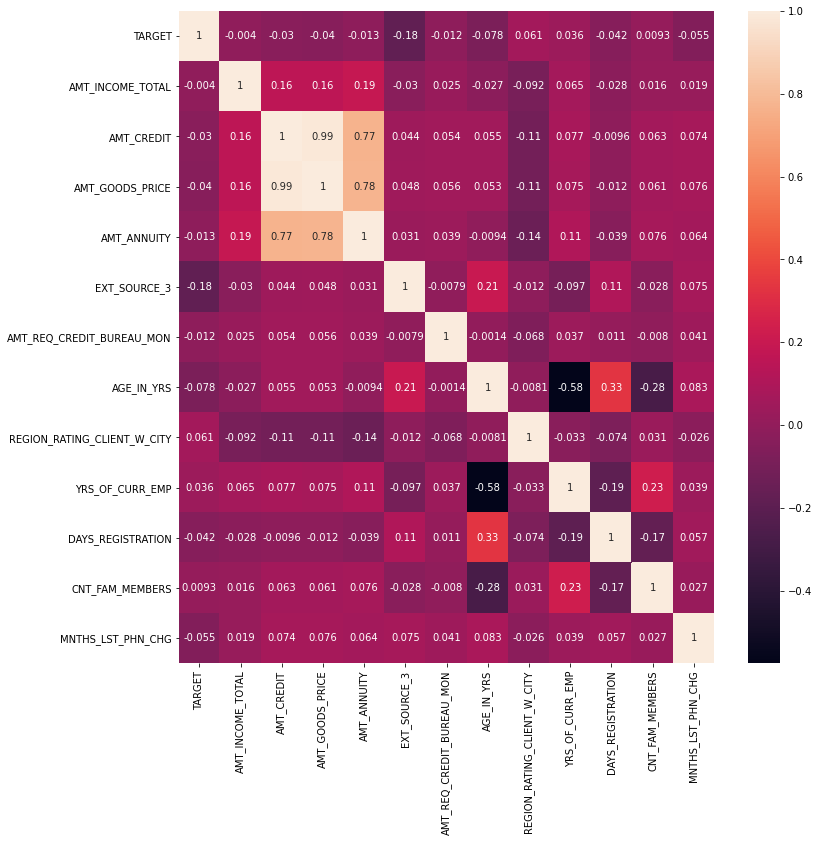

In [102]:
# Analyzing on the entire dataframe what really impacts the target using corr()

plt.figure(figsize=(12,12))
sns.heatmap(df_current[['TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_MON','AGE_IN_YRS','REGION_RATING_CLIENT_W_CITY','YRS_OF_CURR_EMP','DAYS_REGISTRATION','CNT_FAM_MEMBERS','MNTHS_LST_PHN_CHG']].corr(), annot=True)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Looking across all the correlation, we can understand that there is nothing much in this dataset that can just tell us what really impacts the repayments of the individuals.__<br>
> __2.  However we can find that GOODS price, Credit amount and Annuity amount do have a good correlation.__<br>
> __3.  But it is evident that Target has some dependency on EXT_SOURCE_3.__<br>
> __4.  Also Age impacts years of experience in the current employment and count of family members.__

<font color=red>__Note:__<br> *Since we could not conclude much on whom should the loans be approved or not, lets analyze the previous applications of these applicants*</font>

## Reading, understanding, analyzing the Previous loan application dataset in next few steps

<font color=blue>__1. Reading data for the previous loan applications__</font>

In [103]:
df_previous = pd.read_csv('previous_application.csv')

<font color=blue>__2. Analyzing shape, dimension, data, metadata of the dataframe__</font>

In [104]:
# Understanding data by fetching top 5 rows using head()

df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [105]:
# Observing shape and dimension of the dataframe

print('Shape of previous loan dataset: ',df_previous.shape)
print('Dimension of previous loan dataset: ',df_previous.ndim)

Shape of previous loan dataset:  (1670214, 37)
Dimension of previous loan dataset:  2


In [106]:
# Checking the metadata of the dataframe using info()

df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [107]:
# Understanding statistical stand of the dataframe using describe()

df_previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

<font color=blue>__3. Checking the NULL / Missing values present in different columns__</font>

In [108]:
# Using the created function to check the Nulls in the previous loan application dataframe

loan_prev_nulls=find_NaN(df_previous)
loan_prev_nulls

Cnt_of_Nulls  Null_Percentage
SK_ID_PREV                              0         0.000000
SK_ID_CURR                              0         0.000000
NAME_CONTRACT_TYPE                      0         0.000000
AMT_ANNUITY                        372235        22.286665
AMT_APPLICATION                         0         0.000000
AMT_CREDIT                              1         0.000060
AMT_DOWN_PAYMENT                   895844        53.636480
AMT_GOODS_PRICE                    385515        23.081773
WEEKDAY_APPR_PROCESS_START              0         0.000000
HOUR_APPR_PROCESS_START                 0         0.000000
FLAG_LAST_APPL_PER_CONTRACT             0         0.000000
NFLAG_LAST_APPL_IN_DAY                  0         0.000000
RATE_DOWN_PAYMENT                  895844        53.636480
RATE_INTEREST_PRIMARY             1664263        99.643698
RATE_INTEREST_PRIVILEGED          1664263        99.643698
NAME_CASH_LOAN_PURPOSE                  0         0.000000
NAME_CONTRACT_STATUS                    0         0.000000
DAYS_DECISION                           0         0.000000
NAME_PAYMENT_TYPE                       0         0.000000
CODE_REJECT_REASON                      0         0.000000
NAME_TYPE_SUITE                    820405        49.119754
NAME_CLIENT_TYPE                        0         0.000000
NAME_GOODS_CATEGORY                     0         0.000000
NAME_PORTFOLIO                          0         0.000000
NAME_PRODUCT_TYPE                       0         0.000000
CHANNEL_TYPE                            0         0.000000
SELLERPLACE_AREA                        0         0.000000
NAME_SELLER_INDUSTRY                    0         0.000000
CNT_PAYMENT                        372230        22.286366
NAME_YIELD_GROUP                        0         0.000000
PRODUCT_COMBINATION                   346         0.020716
DAYS_FIRST_DRAWING                 673065        40.298129
DAYS_FIRST_DUE                     673065        40.298129
DAYS_LAST_DUE_1ST_VERSION          673065        40.298129
DAYS_LAST_DUE                      673065        40.298129
DAYS_TERMINATION                   673065        40.298129
NFLAG_INSURED_ON_APPROVAL          673065        40.298129

In [109]:
# Dropping the columns from the dataframe with null percentange 50 or more

df_previous.drop(loan_prev_nulls[loan_prev_nulls.Null_Percentage>=50].index, inplace=True, axis=1)
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 33 columns]

In [110]:
# Understanding the columns with atleast some missing values extending till maximum 13% of missing values

loan_prev_nulls=find_NaN(df_previous)
loan_prev_nulls[(loan_prev_nulls.Null_Percentage>0) & (loan_prev_nulls.Null_Percentage<=13)]

Cnt_of_Nulls  Null_Percentage
AMT_CREDIT                      1         0.000060
PRODUCT_COMBINATION           346         0.020716

<font color=blue>__4. Suggesting values to be imputed for the missing ones__</font>

In [111]:
df_current.AMT_CREDIT.median()     # Continuous value should be imputed using median

513531.0

In [112]:
df_previous.PRODUCT_COMBINATION.mode()[0]     # Continuous value should be imputed using mode

'Cash'

### <u>SUGGESTION 2:</u>
> 1. Missing values in Categorical column __PRODUCT_COMBINATION__ should be imputed using mode value.
> 2. Missing values in Continous column __AMT_CREDIT__ should be imputed by the median value.

<font color=blue>__5. Observing the datatypes and values within each column for further analysis and managing them in correct way__</font>

In [113]:
# Looking at datatypes of all the columns in previous loan application dataframe using info()

df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [114]:
(df_previous.CNT_PAYMENT.value_counts(normalize=True)*100).head()     # Checking various values in CNT_PAYMENT

12.0    24.888519
6.0     14.673602
0.0     11.170014
10.0    10.928563
24.0    10.613690
Name: CNT_PAYMENT, dtype: float64

In [115]:
df_previous.NFLAG_INSURED_ON_APPROVAL.value_counts()    # checking values in the column NFLAG_INSURED_ON_APPROVAL

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [116]:
df_previous.DAYS_TERMINATION.value_counts().head()    # checking values in the column DAYS_TERMINATION

 365243.0    225913
-233.0          786
-184.0          770
-170.0          770
-163.0          769
Name: DAYS_TERMINATION, dtype: int64

In [117]:
# Converting the count of days to a positive value and standardizing the technically missing value to -99

df_previous.DAYS_TERMINATION=abs(df_previous.DAYS_TERMINATION)
df_previous.DAYS_TERMINATION=df_previous.DAYS_TERMINATION.replace(365243.0,-99)
df_previous.DAYS_TERMINATION.value_counts().head()

-99.0     225913
 233.0       786
 170.0       770
 184.0       770
 163.0       769
Name: DAYS_TERMINATION, dtype: int64

In [118]:
df_previous.DAYS_DECISION.value_counts().head()    # checking values in the column DAYS_DECISION

-245    2444
-238    2390
-210    2375
-273    2350
-196    2315
Name: DAYS_DECISION, dtype: int64

In [119]:
df_previous.DAYS_FIRST_DUE.value_counts().head()    # checking values in the column DAYS_FIRST_DUE

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
Name: DAYS_FIRST_DUE, dtype: int64

In [120]:
df_previous.DAYS_LAST_DUE.value_counts().head()    # checking values in the column DAYS_LAST_DUE

 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
Name: DAYS_LAST_DUE, dtype: int64

In [121]:
# Converting the count of days to a positive value and standardizing the technically missing value to -99

df_previous.DAYS_LAST_DUE=abs(df_previous.DAYS_LAST_DUE)
df_previous.DAYS_LAST_DUE=df_previous.DAYS_LAST_DUE.replace(365243.0,-99)
df_previous.DAYS_FIRST_DUE=abs(df_previous.DAYS_FIRST_DUE)
df_previous.DAYS_FIRST_DUE=df_previous.DAYS_FIRST_DUE.replace(365243.0,-99)
df_previous.DAYS_DECISION=abs(df_previous.DAYS_DECISION)

In [122]:
# Further Categorizing the data on the purpose of loan

df_previous['TYPE_OF_PREV_LOAN']=df_previous.NAME_CASH_LOAN_PURPOSE.apply(lambda x: 'Personal Loan' if x in ['Repairs','Urgent needs','Everyday expenses','Medicine','Payments on other loans','Journey',
                                             'Wedding / gift / holiday','Purchase of electronic equipment','Furniture','Gasification / water supply',
                                             'Hobby','Money for a third person','Refusal to name the goal'] else ('Unknown' if x in ['XAP','XNA','Other'] else ('Car Loan' if x in ['Buying a used car','Buying a new car','Car repairs'] 
                                             else ('Business Loan' if x in ['Business development','Buying a garage'] else ('Education Loan' if x in ['Education'] else 'Housing Loan')))))
df_previous.TYPE_OF_PREV_LOAN.value_counts()

Unknown           1616187
Personal Loan       43104
Car Loan             4697
Housing Loan         4091
Education Loan       1573
Business Loan         562
Name: TYPE_OF_PREV_LOAN, dtype: int64

In [123]:
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  CNT_PAYMENT  \
0                       15                           Y  ...         12.0   
1                       11                           Y  ...         36.0   
2                       11                           Y  ...         12.0   
3                        7                           Y  ...         12.0   
4                        9                           Y  ...         24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle  POS mobile with interest            365243.0   
1       low_action          Cash X-Sell: low            365243.0   
2             high         Cash X-Sell: high            365243.0   
3           middle       Cash X-Sell: middle            365243.0   
4             high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0           42.0                     300.0          42.0             37.0   
1          134.0                     916.0         -99.0            -99.0   
2          271.0                      59.0         -99.0            -99.0   
3          482.0                    -152.0         182.0            177.0   
4            NaN                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL TYPE_OF_PREV_LOAN  
0                       0.0           Unknown  
1                       1.0           Unknown  
2                       1.0           Unknown  
3                       1.0           Unknown  
4                       NaN     Personal Loan  

[5 rows x 34 columns]

<font color=blue>__4. Checking for the outliers, if any using describe() and boxplots__</font>

In [124]:
# Using describe function for statistical analysis

df_previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06   
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.605408e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01   
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00   
25%              1.000000e+00   2.800000e+02     -1.000000e+00  6.000000e+00   
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01   
75%              1.000000e+00   1.300000e+03      8.200000e+01  2.400000e+01   
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039     1057.442004               33767.774054   
std          88916.115833      810.281318              106857.034789   
min          -2922.000000      -99.000000               -2801.000000   
25%         365243.000000      411.000000               -1242.000000   
50%         365243.000000      831.000000                -361.000000   
75%         365243.000000     1628.000000                 129.000000   
max         365243.000000     2892.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean      764.192905        734.286256                   0.332570  
std       804.238183        798.406469                   0.471134  
min       -99.000000        -99.000000                   0.000000  
25%        74.000000         44.000000                   0.000000  
50%       537.000000        499.000000                   0.000000  
75%      1314.000000       1270.000000                   1.000000  
max      2889.000000       2874.000000                   1.000000

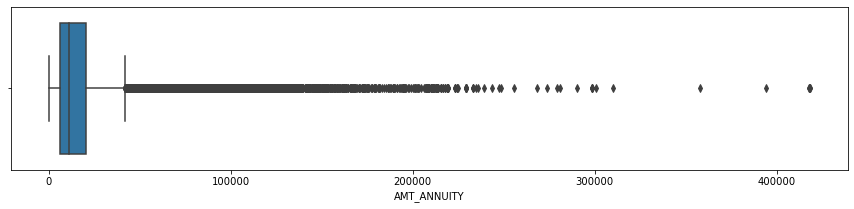

In [125]:
# Checking outliers in AMT_ANNUITY

plt.figure(figsize=[15,3])
sns.boxplot(df_previous.AMT_ANNUITY)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Majority (99%) of the annuity amount was around 50K.__<br>
> __2.  However we do see many outliers extending above 4lakhs.__

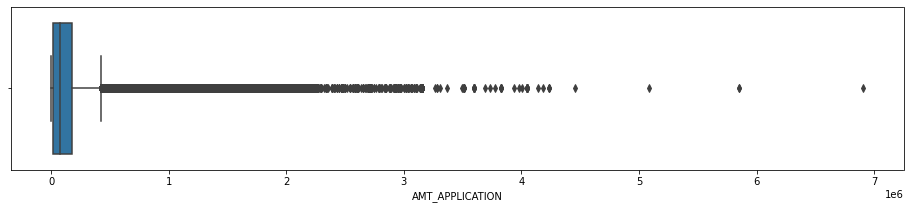

In [126]:
# Checking outliers in AMT_APPLICATION

plt.figure(figsize=[16,3])
sns.boxplot(df_previous.AMT_APPLICATION)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Majority (99%) of the applicants had applied for loan below 5 lakhs.__<br>
> __2.  However there are few applicants who had applied till 70 lakhs.__

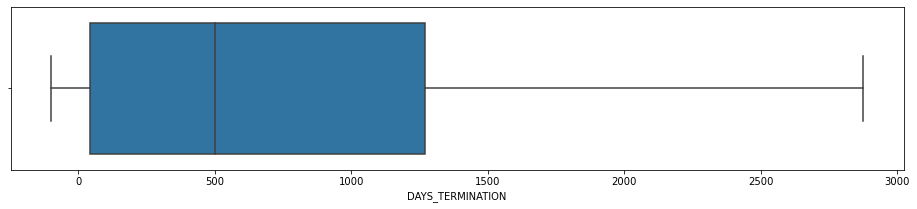

In [127]:
# Checking outliers in DAYS_TERMINATION

plt.figure(figsize=[16,3])
sns.boxplot(df_previous.DAYS_TERMINATION)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  All the applicants have previous loan active.__<br>
> __2.  75% of the applicants have the previous loan termination tenure below 1250 days.__

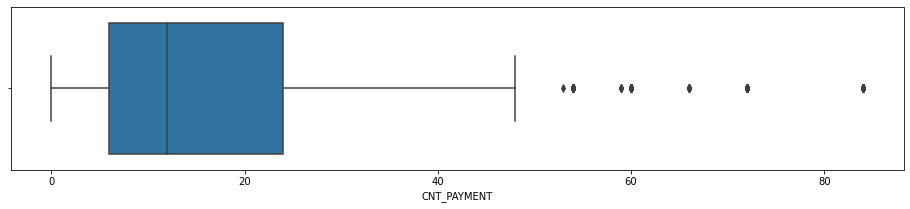

In [128]:
# Checking outliers in CNT_PAYMENT

plt.figure(figsize=[16,3])
sns.boxplot(df_previous.CNT_PAYMENT)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  99% of the applicants have tenure period less than 45.__<br>
> __2.  There are quite a few applicants who have tenure extending upto 50 - 90 months.__

<font color=Blue>__5. Checking for the imbalance and dividing the dataset into multiple dataframes on the basis of imbalance.__

In [129]:
df_previous.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [130]:
# Creating 4 different dataframes based on the imbalance found above

df_pre_App=df_previous[df_previous['NAME_CONTRACT_STATUS']=='Approved']
df_pre_Can=df_previous[df_previous['NAME_CONTRACT_STATUS']=='Canceled']
df_pre_Ref=df_previous[df_previous['NAME_CONTRACT_STATUS']=='Refused']
df_pre_Un=df_previous[df_previous['NAME_CONTRACT_STATUS']=='Unused offer']

<font color=blue>__6. Plotting different graphs to understand how previous loan is affected across different factors__</font>

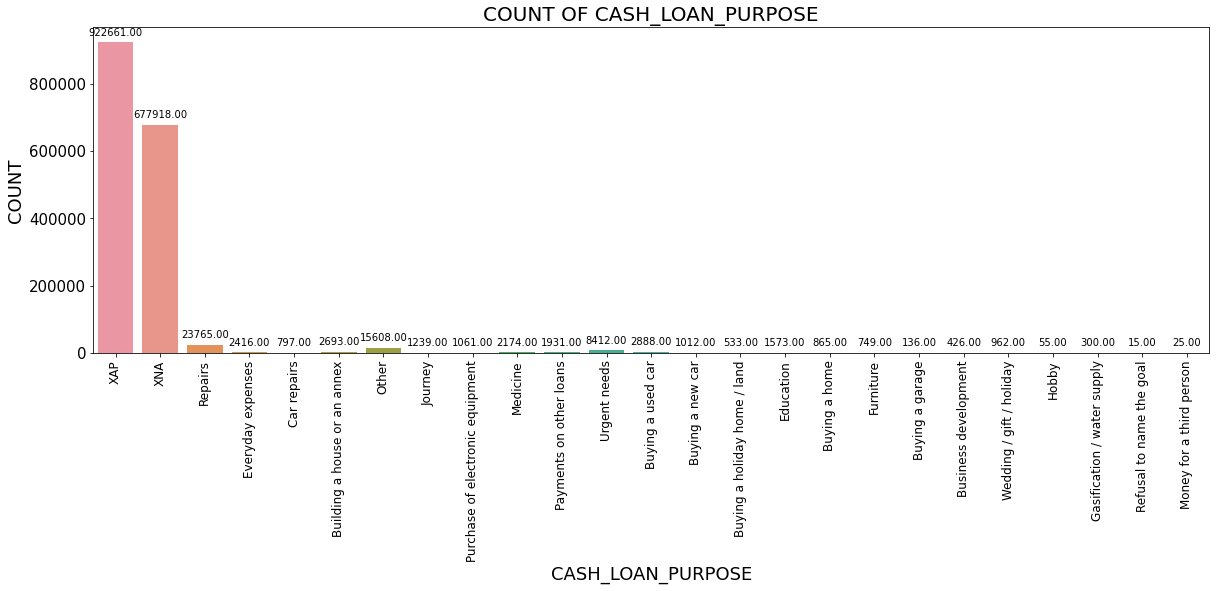

In [131]:
# Univarient categorical unordered -for ORGANIZATION TYPE

plt.figure(figsize=(20,6))# sizing
P=sns.countplot(df_previous['NAME_CASH_LOAN_PURPOSE'])
plt.title('COUNT OF CASH_LOAN_PURPOSE',fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=15)
ann_count(P)
plt.ylabel('COUNT',fontsize=18)
plt.xlabel('CASH_LOAN_PURPOSE',fontsize=18)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  Most of the previous loan was for unknown reason XAP and XNA__<br>
> __2.  Apart from unknown loan reason, Repairs and Urgent needs has most loans. We can say loan is taken more for personal reasons.__

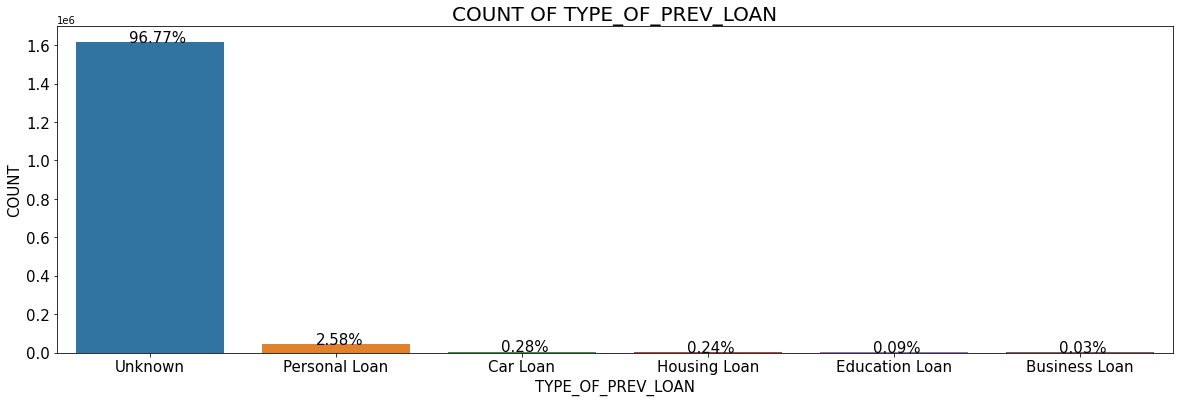

In [132]:
# Univarient categorical unordered -for TYPE_OF_PREV_LOAN

plt.figure(figsize=(20,6))# sizing
P=sns.countplot(df_previous['TYPE_OF_PREV_LOAN'])
plt.title('COUNT OF TYPE_OF_PREV_LOAN',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ann_h(P)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('TYPE_OF_PREV_LOAN',fontsize=15)
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1. As inferred, more than 95% of loan was for unknown reason__<br>
> __2. Almost 3% loan is for personal reason.__<br>
> __3. Less than 1% of loans are for Car loan, Housing Loan or Education Loan.__

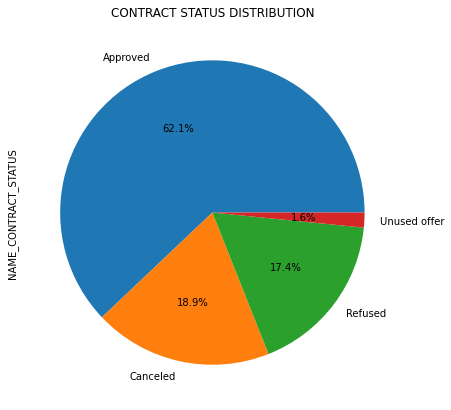

In [133]:
# Univarient categorical unordered -for NAME_CONTRACT_STATUS

plt.figure(figsize=(7,7))
df_previous['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('CONTRACT STATUS DISTRIBUTION')
plt.show()

### <u><font color=purple>Inferences:</font></u>
> __1.  CONTRACT NAME has imbalanced distribution__<br>
> __2.  62.1% of loans were approved, 17.4% loans were refused.__</br>
> __3.  1.6% of loans were unused and 18.9% loans were Canceled.__

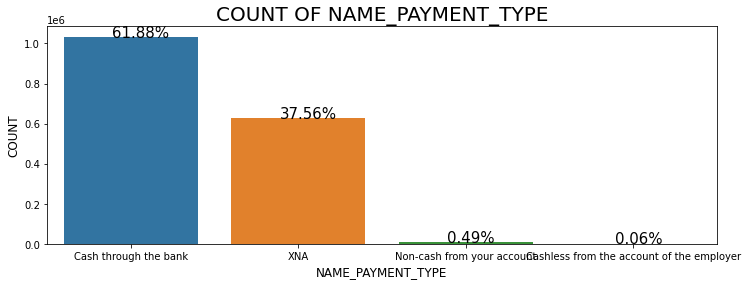

In [134]:
# Univarient categorical unordered -for NAME_PAYMENT_TYPE

plt.figure(figsize=(12,4))# sizing
P=sns.countplot(df_previous['NAME_PAYMENT_TYPE'])
plt.title('COUNT OF NAME_PAYMENT_TYPE',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ann_h(P)

plt.ylabel('COUNT',fontsize=12)
plt.xlabel('NAME_PAYMENT_TYPE',fontsize=12)
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the Payment is done through Cash form bank-61.88%__<br>
> __2.  less than 1% have payed without case, either from personal Account or Account of Employeer.__</br>

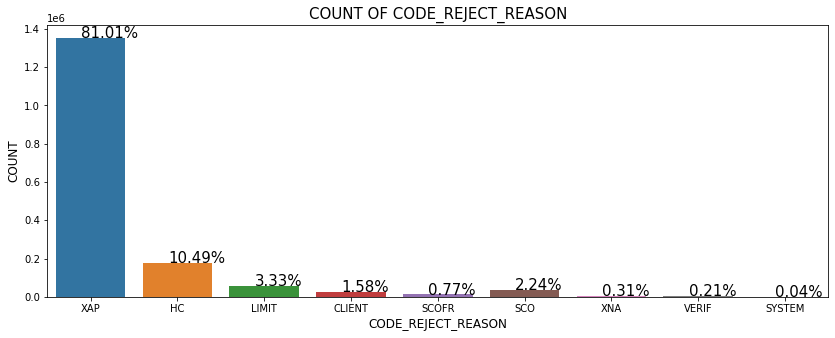

In [135]:
# Univarient categorical unordered -for CODE_REJECT_REASON   

plt.figure(figsize=(14,5))# sizing
P=sns.countplot(df_previous['CODE_REJECT_REASON'])
plt.title('COUNT OF CODE_REJECT_REASON',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ann_h(P)
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('CODE_REJECT_REASON',fontsize=12)
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of teh code rejection reason is unknown, more than 81%__<br>
> __2.  10.49% of rejection reason was HC.__<br>
> __3.  SYSTEM rejected reason was the least__

<font color=blue>__7. Creating function to plot 4 graphs based on all the Contract types in a go__</font>

In [136]:
# Function to plot 4 count plots at a time

def count_plot(df1,df2,df3,df4,col):
    plt.style.use("fivethirtyeight")#style used
    plt.figure(figsize=(30,8))
    
    for c in col:
        fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=True, sharey=True,figsize=(20,15))
        A=sns.countplot(df1[c],ax=ax1)
        A.axes.set_title('APPROVED',fontsize=15)
        A.axes.set_xticklabels(A.get_xticklabels(), rotation=90)

        B=sns.countplot(df2[c],ax=ax2)
        B.axes.set_title('CANCELLED',fontsize=15)
        B.axes.set_xticklabels(B.get_xticklabels(), rotation=90)
      
        
        C=sns.countplot(df3[c],ax=ax3)
        C.axes.set_title('REFUSED',fontsize=15)
        C.axes.set_xticklabels(C.get_xticklabels(), rotation=90)
      
        
        D=sns.countplot(df4[c],ax=ax4)
        D.axes.set_title('UNUSED',fontsize=15)
        D.axes.set_xticklabels(D.get_xticklabels(), rotation=90)
        
        plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.6, hspace=0.75)
             
        plt.tight_layout()

In [137]:
# Creating a function for count plot with annotation for Univarient Categorical 

def count_plot_ann(df1,df2,df3,df4,col):
    plt.style.use("fivethirtyeight")#style used
    plt.figure(figsize=(30,8))
    
    for c in col:
        fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(20,15))
        A=sns.countplot(df1[c],ax=ax1)
        A.axes.set_title('APPROVED',fontsize=15)
        A.axes.set_xticklabels(A.get_xticklabels())
        ann_h(A)

        B=sns.countplot(df2[c],ax=ax2)
        B.axes.set_title('CANCELLED',fontsize=15)
        B.axes.set_xticklabels(B.get_xticklabels())
        ann_h(B)
        
        C=sns.countplot(df3[c],ax=ax3)
        C.axes.set_title('REFUSED',fontsize=15)
        C.axes.set_xticklabels(C.get_xticklabels())
        ann_h(C)
      
        
        D=sns.countplot(df4[c],ax=ax4)
        D.axes.set_title('UNUSED',fontsize=15)
        D.axes.set_xticklabels(D.get_xticklabels())
        ann_h(D)
        
        plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=1.5, wspace=0.6, hspace=0.75)
        plt.tight_layout()

In [138]:
# Creating a function for count plot with annotation for Univarient Continuous 

def dist_plot(col):
    for c in col:
        print('This is for',c)
        fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(30,18))
        sns.distplot(df_pre_App[c],kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist=False,ax=ax1)
        sns.distplot(df_pre_Can[c],kde_kws={"color": "b", "lw": 3, "label": "KDE"},hist=False,ax=ax2)
        sns.distplot(df_pre_Ref[c],kde_kws={"color": "g", "lw": 3, "label": "KDE"},hist=False,ax=ax3)
        sns.distplot(df_pre_Un[c],kde_kws={"color": "r", "lw": 3, "label": "KDE"},hist=False,ax=ax4)
        fig.legend(labels=['APPROVED','CANCELLED','REFUSED','UNUSED'],loc='upper center')

        plt.show()

In [139]:
# Creating a function for bar plot with annotation for Bivarient Categorical-Continuous

def bar_plot(col1,col2):
    
    fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(35,20))
    A=sns.barplot(data=df_pre_App,x=col1,y=col2,ax=ax1)
    A.axes.set_title('APPROVED',fontsize=15)
    A.axes.set_xticklabels(A.get_xticklabels(), rotation=90)
    
    B=sns.barplot(data=df_pre_Can,x=col1,y=col2,ax=ax2)
    B.axes.set_title('CANCELLED',fontsize=15)
    B.axes.set_xticklabels(B.get_xticklabels(), rotation=90)
        
    C=sns.barplot(data=df_pre_Ref,x=col1,y=col2,ax=ax3)
    C.axes.set_title('REFUSED',fontsize=15)
    C.axes.set_xticklabels(C.get_xticklabels(), rotation=90)
        
    D=sns.barplot(data=df_pre_Un,x=col1,y=col2,ax=ax4)
    D.axes.set_title('UNUSED',fontsize=15)
    D.axes.set_xticklabels(D.get_xticklabels(), rotation=90)

    plt.show()

In [140]:
# Creating a function for box plot with annotation for Bivarient Categorical-Continuous

def box_plot(col1,col2):
    
    fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(35,20))
    A=sns.boxplot(data=df_pre_App,x=col1,y=col2,ax=ax1)
    A.axes.set_title('APPROVED',fontsize=15)
    A.axes.set_xticklabels(A.get_xticklabels(), rotation=90)
    
    B=sns.boxplot(data=df_pre_Can,x=col1,y=col2,ax=ax2)
    B.axes.set_title('CANCELLED',fontsize=15)
    B.axes.set_xticklabels(B.get_xticklabels(), rotation=90)
        
    C=sns.boxplot(data=df_pre_Ref,x=col1,y=col2,ax=ax3)
    C.axes.set_title('REFUSED',fontsize=15)
    C.axes.set_xticklabels(C.get_xticklabels(), rotation=90)
        
    D=sns.boxplot(data=df_pre_Un,x=col1,y=col2,ax=ax4)
    D.axes.set_title('UNUSED',fontsize=15)
    D.axes.set_xticklabels(D.get_xticklabels(), rotation=90)

    plt.show()

In [141]:
# Bivarient cat - cat function

def count_plot_b(df1,df2,df3,df4,col1,col2):
    plt.style.use("fivethirtyeight")#style used

    fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(30,20))
    A=sns.countplot(df1[col1],hue=df1[col2],ax=ax1)
    A.axes.set_title('APPROVED',fontsize=15)
    A.axes.set_xticklabels(A.get_xticklabels(), rotation=90)


    B=sns.countplot(df2[col1],hue=df2[col2],ax=ax2)
    B.axes.set_title('CANCELLED',fontsize=15)
    B.axes.set_xticklabels(B.get_xticklabels(), rotation=90)


    C=sns.countplot(df3[col1],hue=df3[col2],ax=ax3)
    C.axes.set_title('REFUSED',fontsize=15)
    C.axes.set_xticklabels(C.get_xticklabels(), rotation=90)


    D=sns.countplot(df4[col1],hue=df4[col2],ax=ax4)
    D.axes.set_title('UNUSED',fontsize=15)
    D.axes.set_xticklabels(D.get_xticklabels(), rotation=90)


    plt.show()

In [142]:
# Bivarient contiuous -Contiunous 

def scatter_plot(df1,df2,df3,df4,col1,col2):
    plt.style.use("fivethirtyeight")#style used

    fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, sharex=False, sharey=False,figsize=(30,20))
    A=sns.scatterplot(df1[col1],df1[col2],ax=ax1)
    A.axes.set_title('APPROVED',fontsize=15)
    A.axes.set_xticklabels(A.get_xticklabels(), rotation=90)


    B=sns.scatterplot(df2[col1],df2[col2],ax=ax2)
    B.axes.set_title('CANCELLED',fontsize=15)
    B.axes.set_xticklabels(B.get_xticklabels(), rotation=90)


    C=sns.scatterplot(df3[col1],df3[col2],ax=ax3)
    C.axes.set_title('REFUSED',fontsize=15)
    C.axes.set_xticklabels(C.get_xticklabels(), rotation=90)


    D=sns.scatterplot(df4[col1],df4[col2],ax=ax4)
    D.axes.set_title('UNUSED',fontsize=15)
    D.axes.set_xticklabels(D.get_xticklabels(), rotation=90)
    

    plt.show()

<Figure size 2160x576 with 0 Axes>

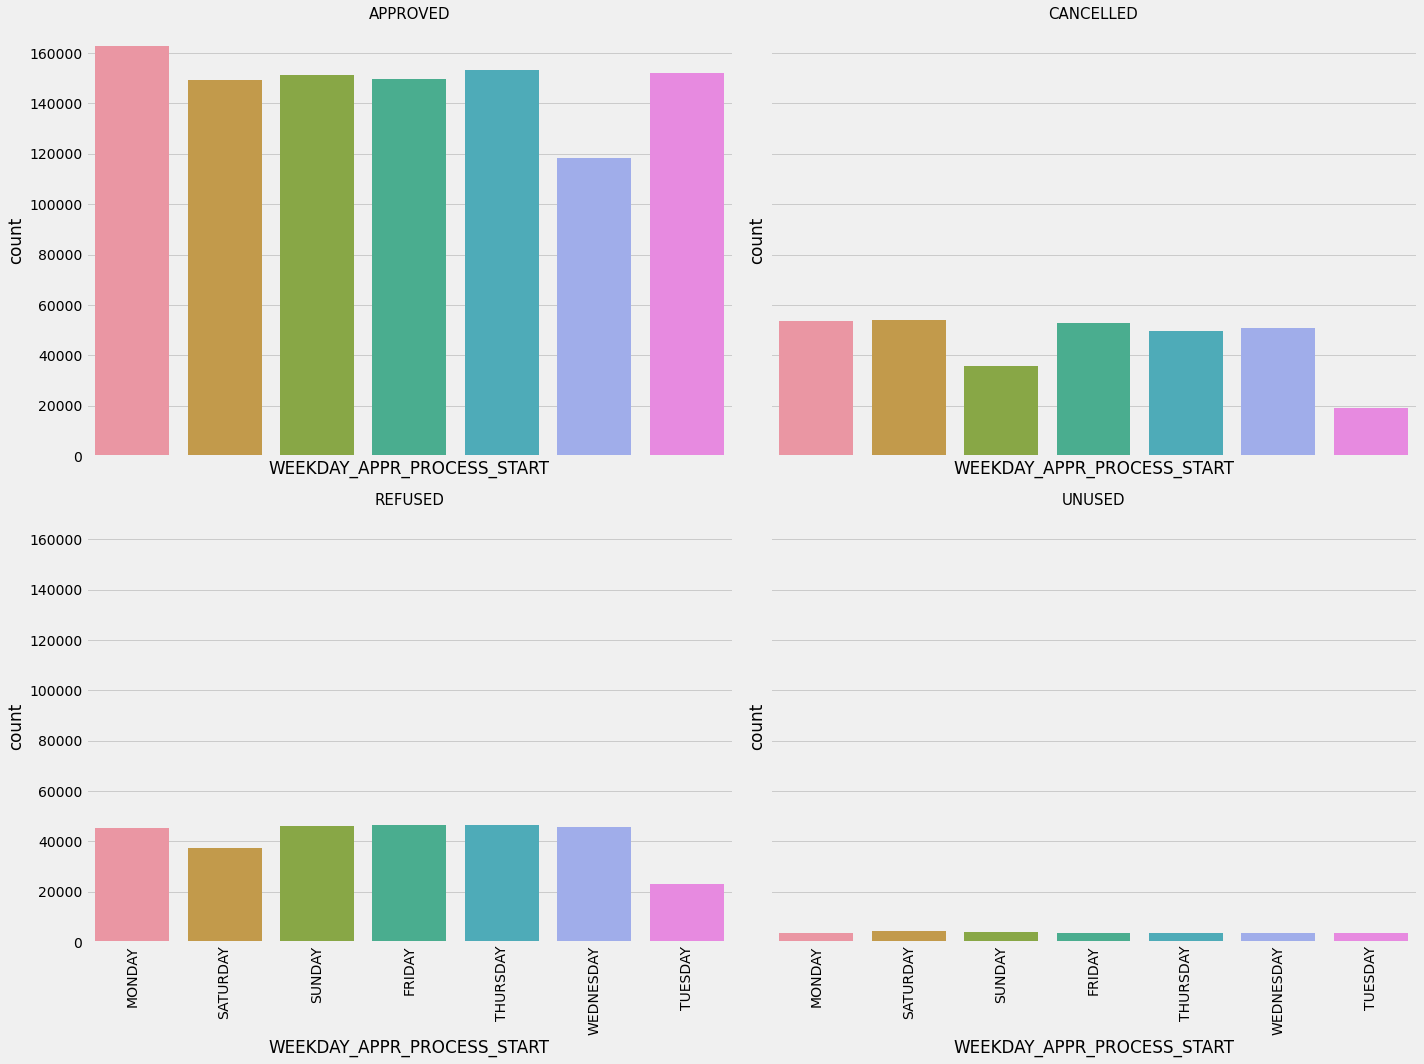

In [143]:
# Using the function to analyze variation of the Contract types w.r.t. WEEKDAY_APPR_PROCESS_START 

count_plot(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col=['WEEKDAY_APPR_PROCESS_START'])

## <u><font color=purple>Inferences:</font></u>
> __1.  The loan rejected clearly does not depend on any weekday__

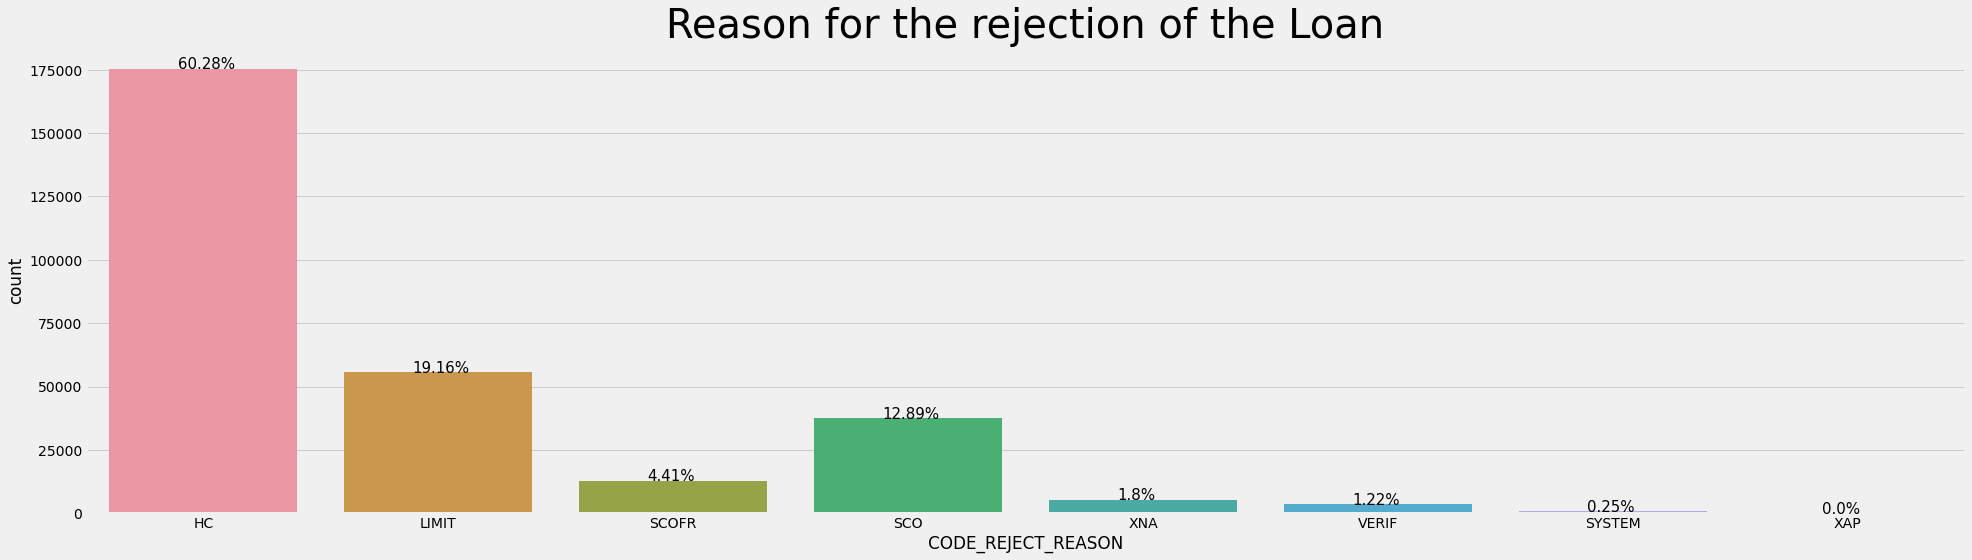

In [144]:
# Using the function to analyze variation of the different rejected reasons w.r.t. Rejected contract type

plt.figure(figsize=(30,8))
D=sns.countplot(df_pre_Ref['CODE_REJECT_REASON'])
D.axes.set_title('Reason for the rejection of the Loan',fontsize=40)
D.axes.set_xticklabels(D.get_xticklabels())
ann_h(D)
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the code rejection reason is due to HC, about 60.28%__<br>
> __2.  Out of the known reasons, SYSTEM rejected reason was the least__

<Figure size 2160x576 with 0 Axes>

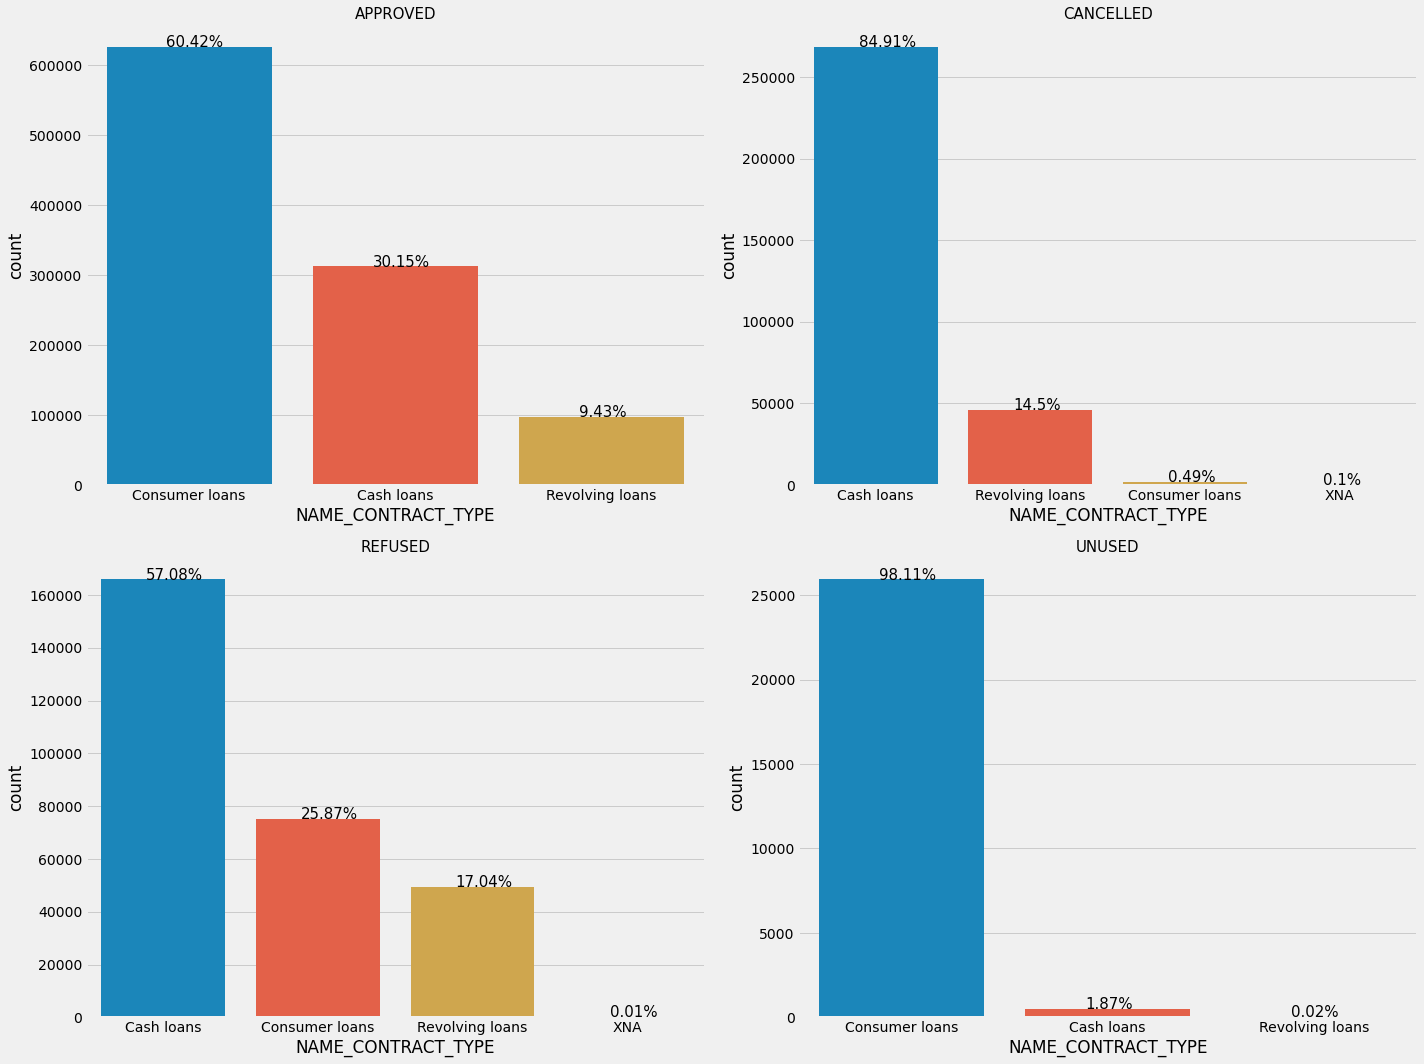

In [145]:
# Using the function to analyze variation of the different rejected reasons w.r.t. Rejected contract type

count_plot_ann(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col=['NAME_CONTRACT_TYPE'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Maximum loans rejected were belonging to Cash loans.__<br>
> __2.  Maximum loans that were approved belonged to Consumer loans.__

<Figure size 2160x576 with 0 Axes>

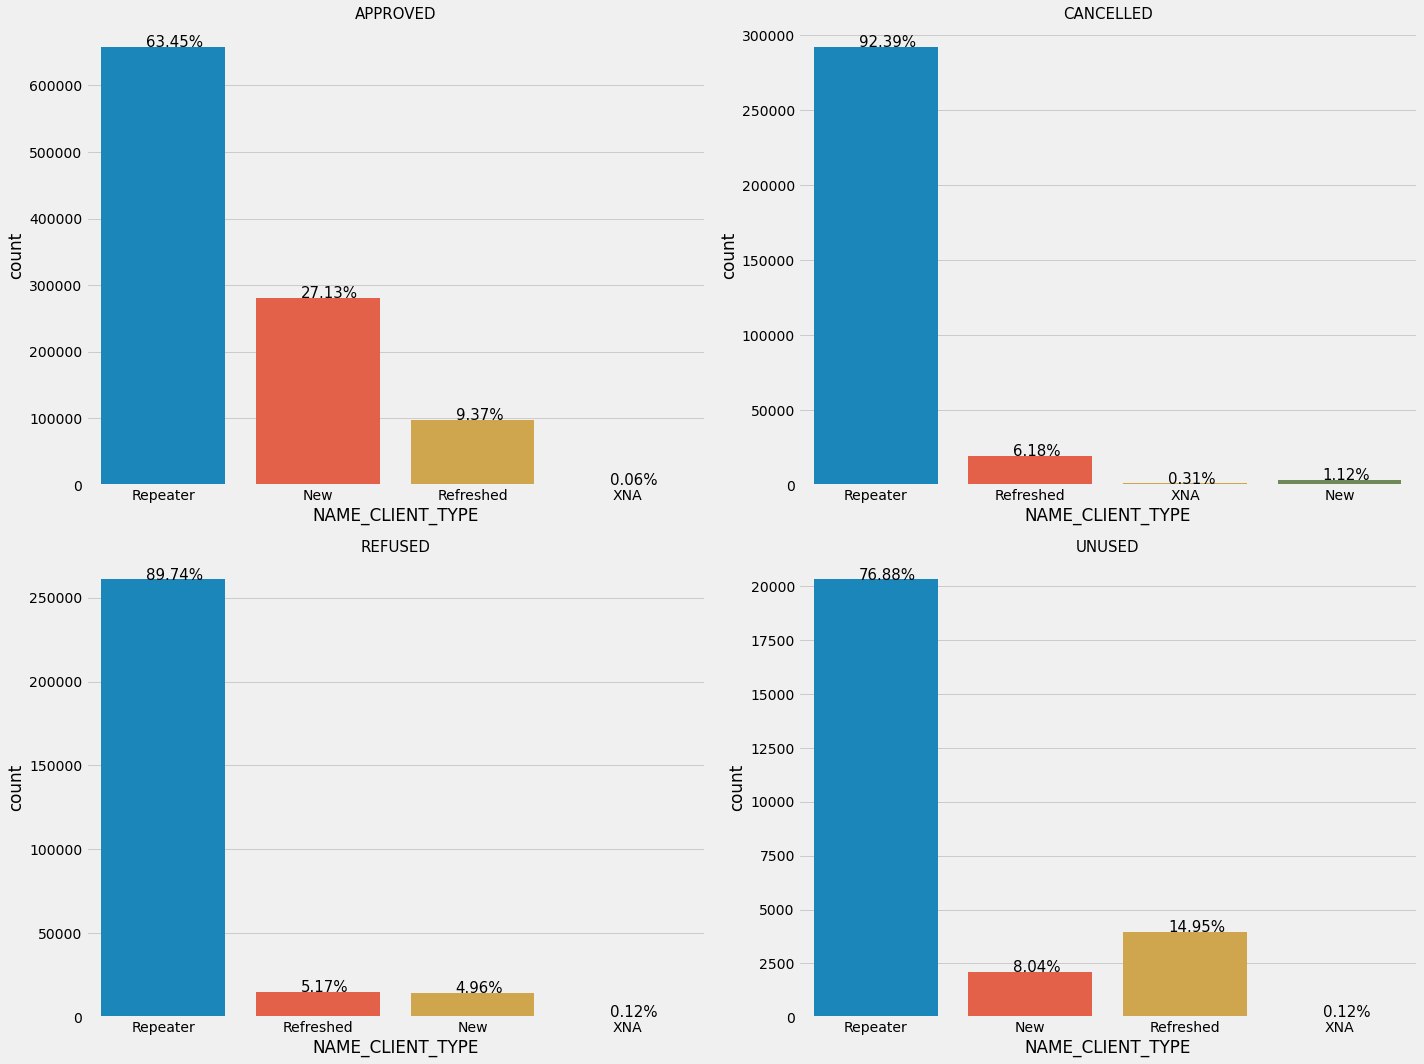

In [146]:
# Using the function to analyze variation of the different NAME_CLIENT_TYPE w.r.t. Rejected contract type

count_plot_ann(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col=['NAME_CLIENT_TYPE'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Maximum loans rejected as well as approved belonged to Repeated clients.__<br>
> __2.  Most of the refreshed client loans are approved.__

<Figure size 2160x576 with 0 Axes>

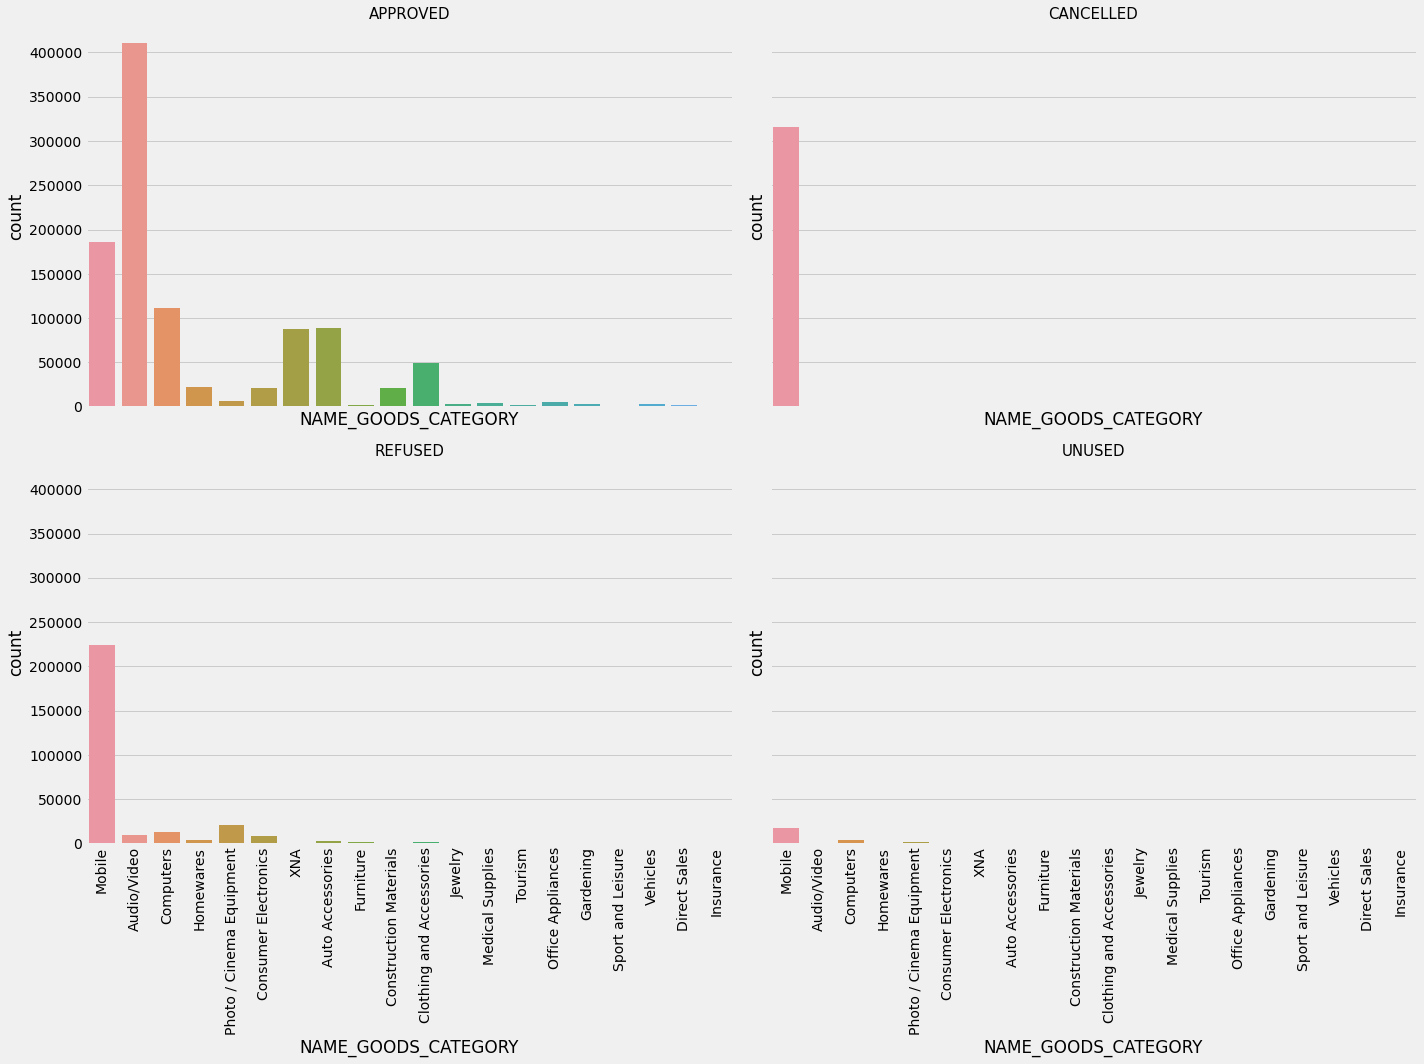

In [147]:
# Using the function to analyze variation of the different NAME_GOODS_CATEGORY w.r.t. Rejected contract type

count_plot(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col=['NAME_GOODS_CATEGORY'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans are related to Mobile goods.__<br>
> __2.  Almost double loans are approved for the Audio/Video goods.__

<Figure size 2160x576 with 0 Axes>

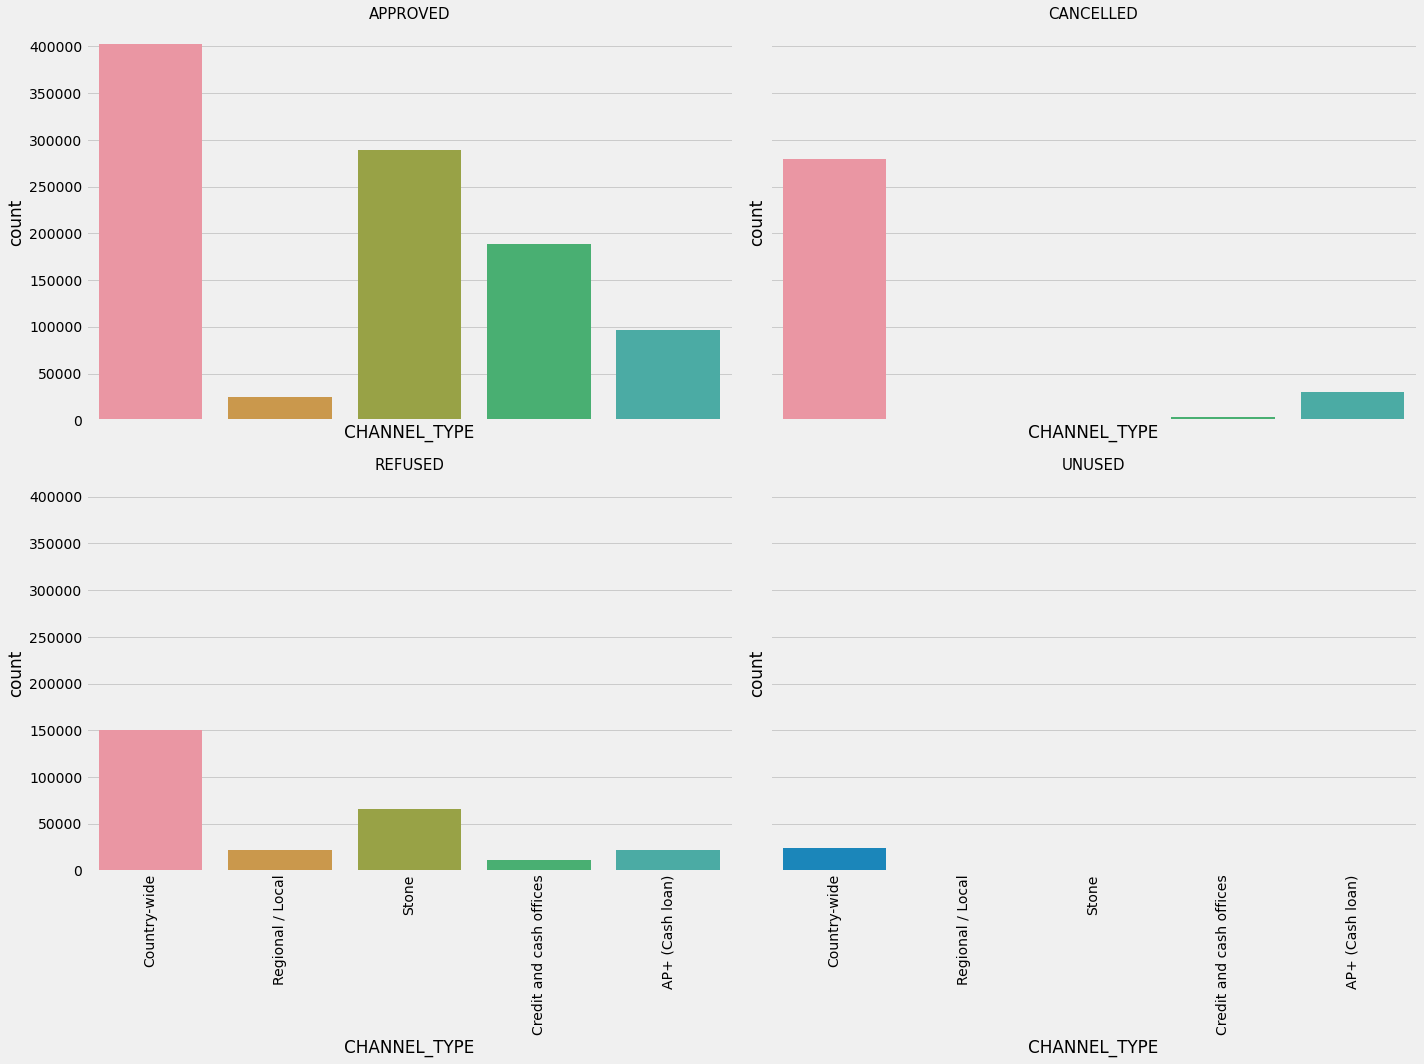

In [148]:
# Using the function to analyze variation of the different CHANNEL_TYPE w.r.t. Rejected contract type

count_plot(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col=['CHANNEL_TYPE'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans come from Country-wide channel and least from Credit and cash offices.__<br>
> __2.  Regional/Local loans have equal chances of getting approved or rejected.__

This is for AMT_ANNUITY


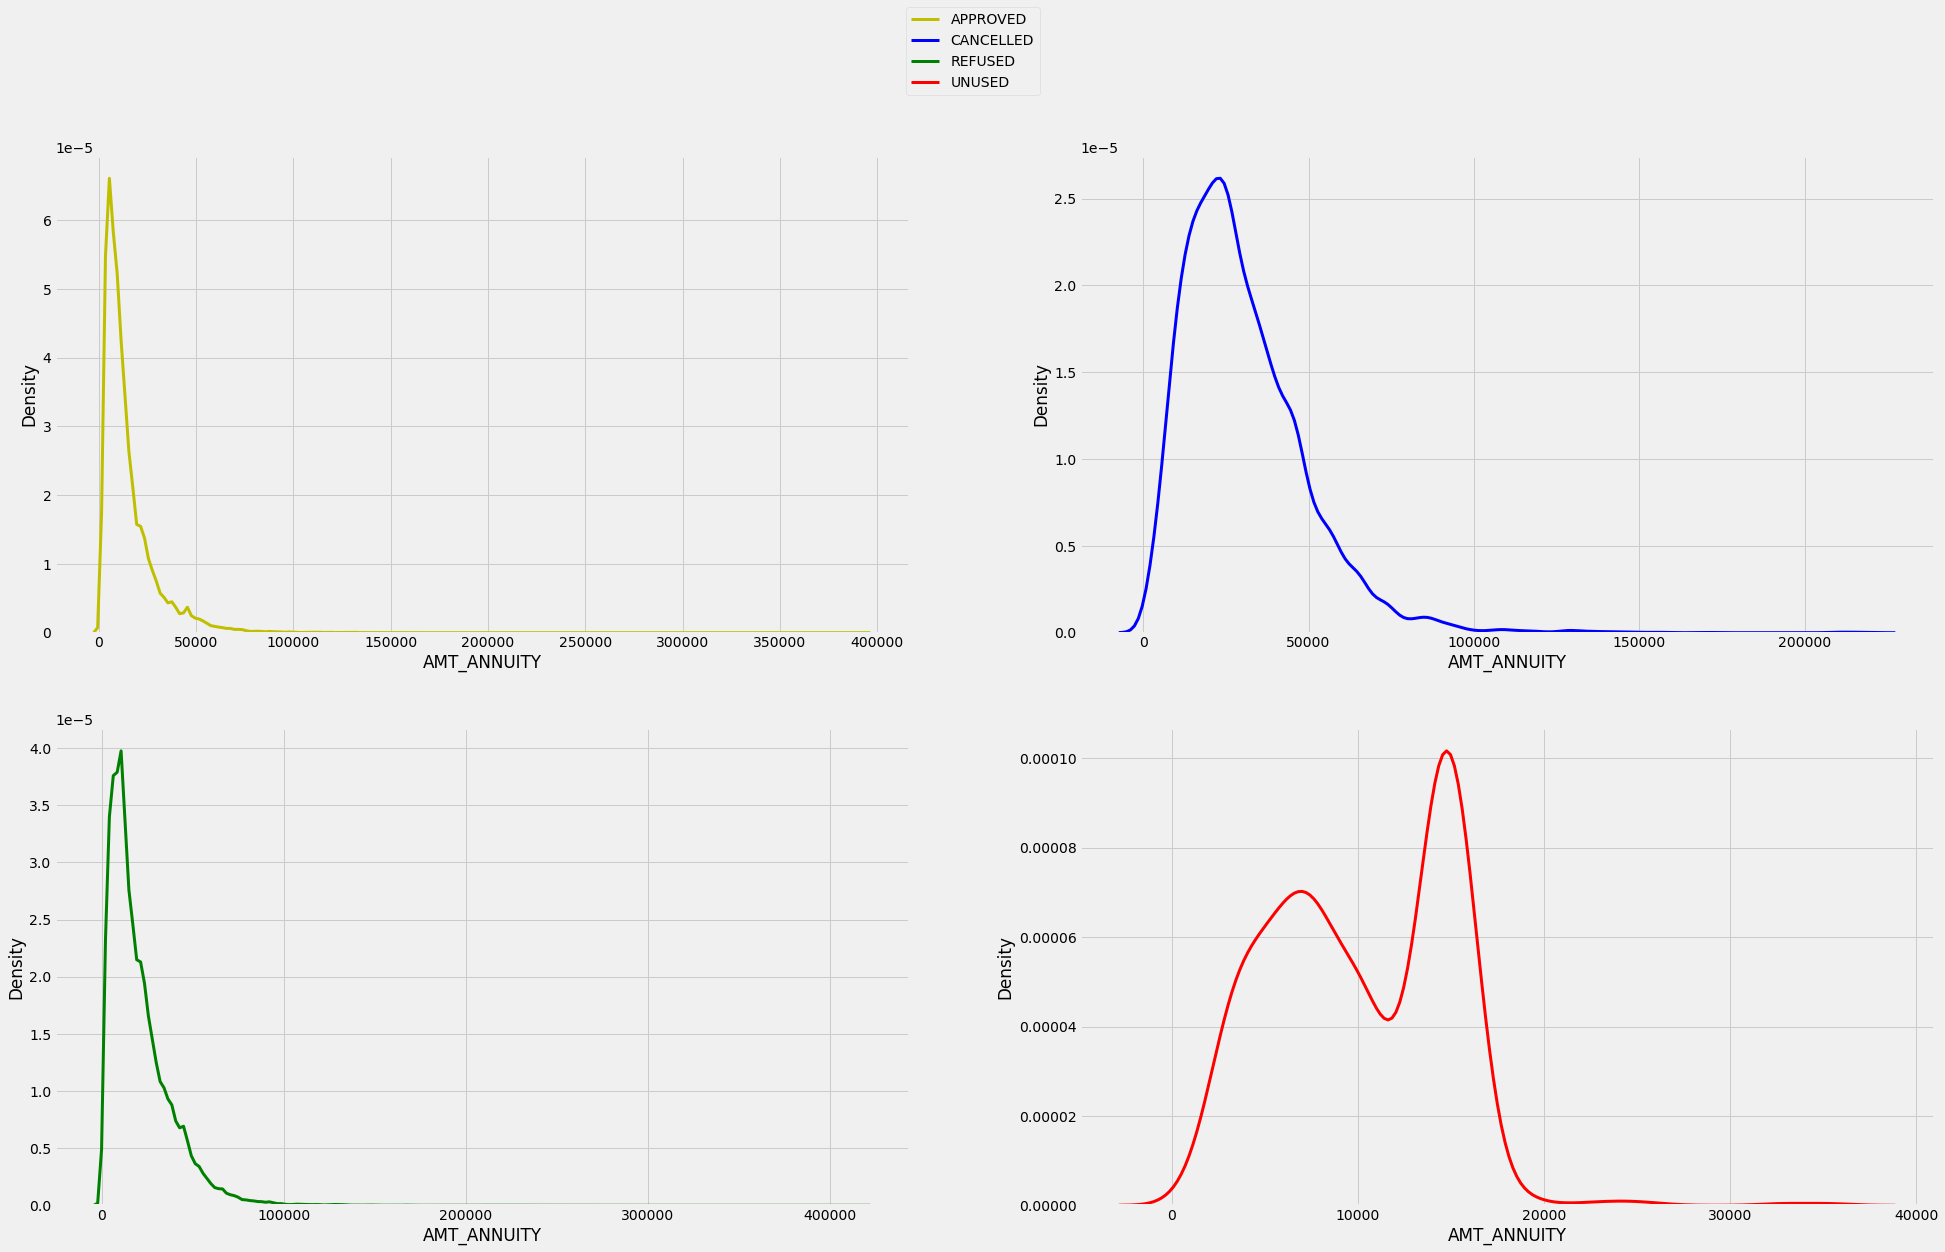

In [149]:
# Using the function to analyze variation of the AMT_ANNUITY w.r.t. Different contract type
dist_plot(col=['AMT_ANNUITY'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Amount annuity in case of approved and rejected loan has almost similar trend except of the fact that count of applicants is little higher around annuity amount of 25000.__<br>
> __2.  Approved applicant has annunity amount upto 4 lakhs however rejected applicant has maximum till 1.4 lakhs.__

This is for AMT_APPLICATION


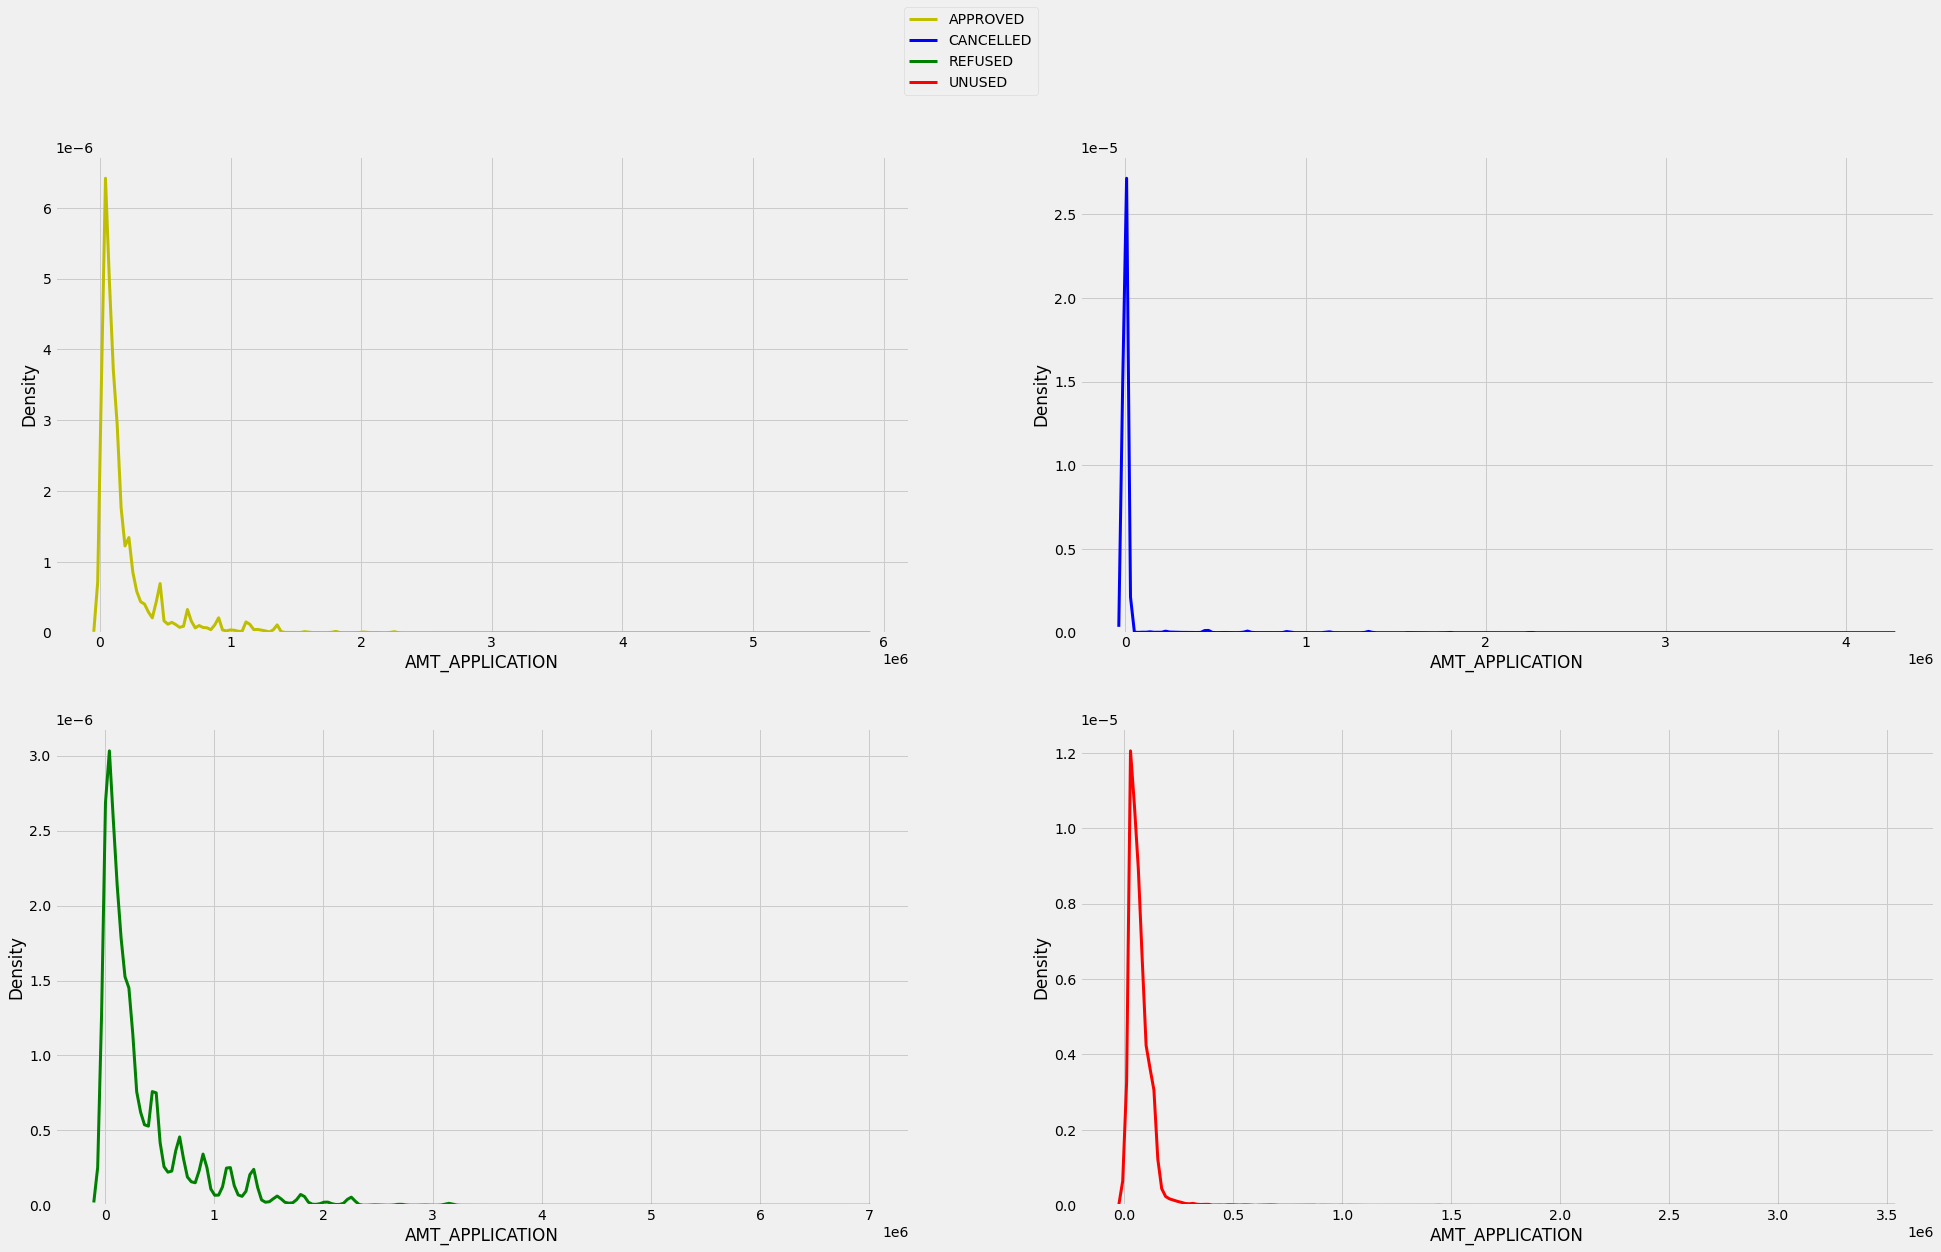

In [150]:
# Using the function to analyze variation of the AMT_APPLICATION w.r.t. different contract type
dist_plot(col=['AMT_APPLICATION'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans come from Country-wide channel and least from Credit and cash offices.__<br>
> __2.  Regional/Local loans have equal chances of getting approved or rejected.__

This is for AMT_CREDIT


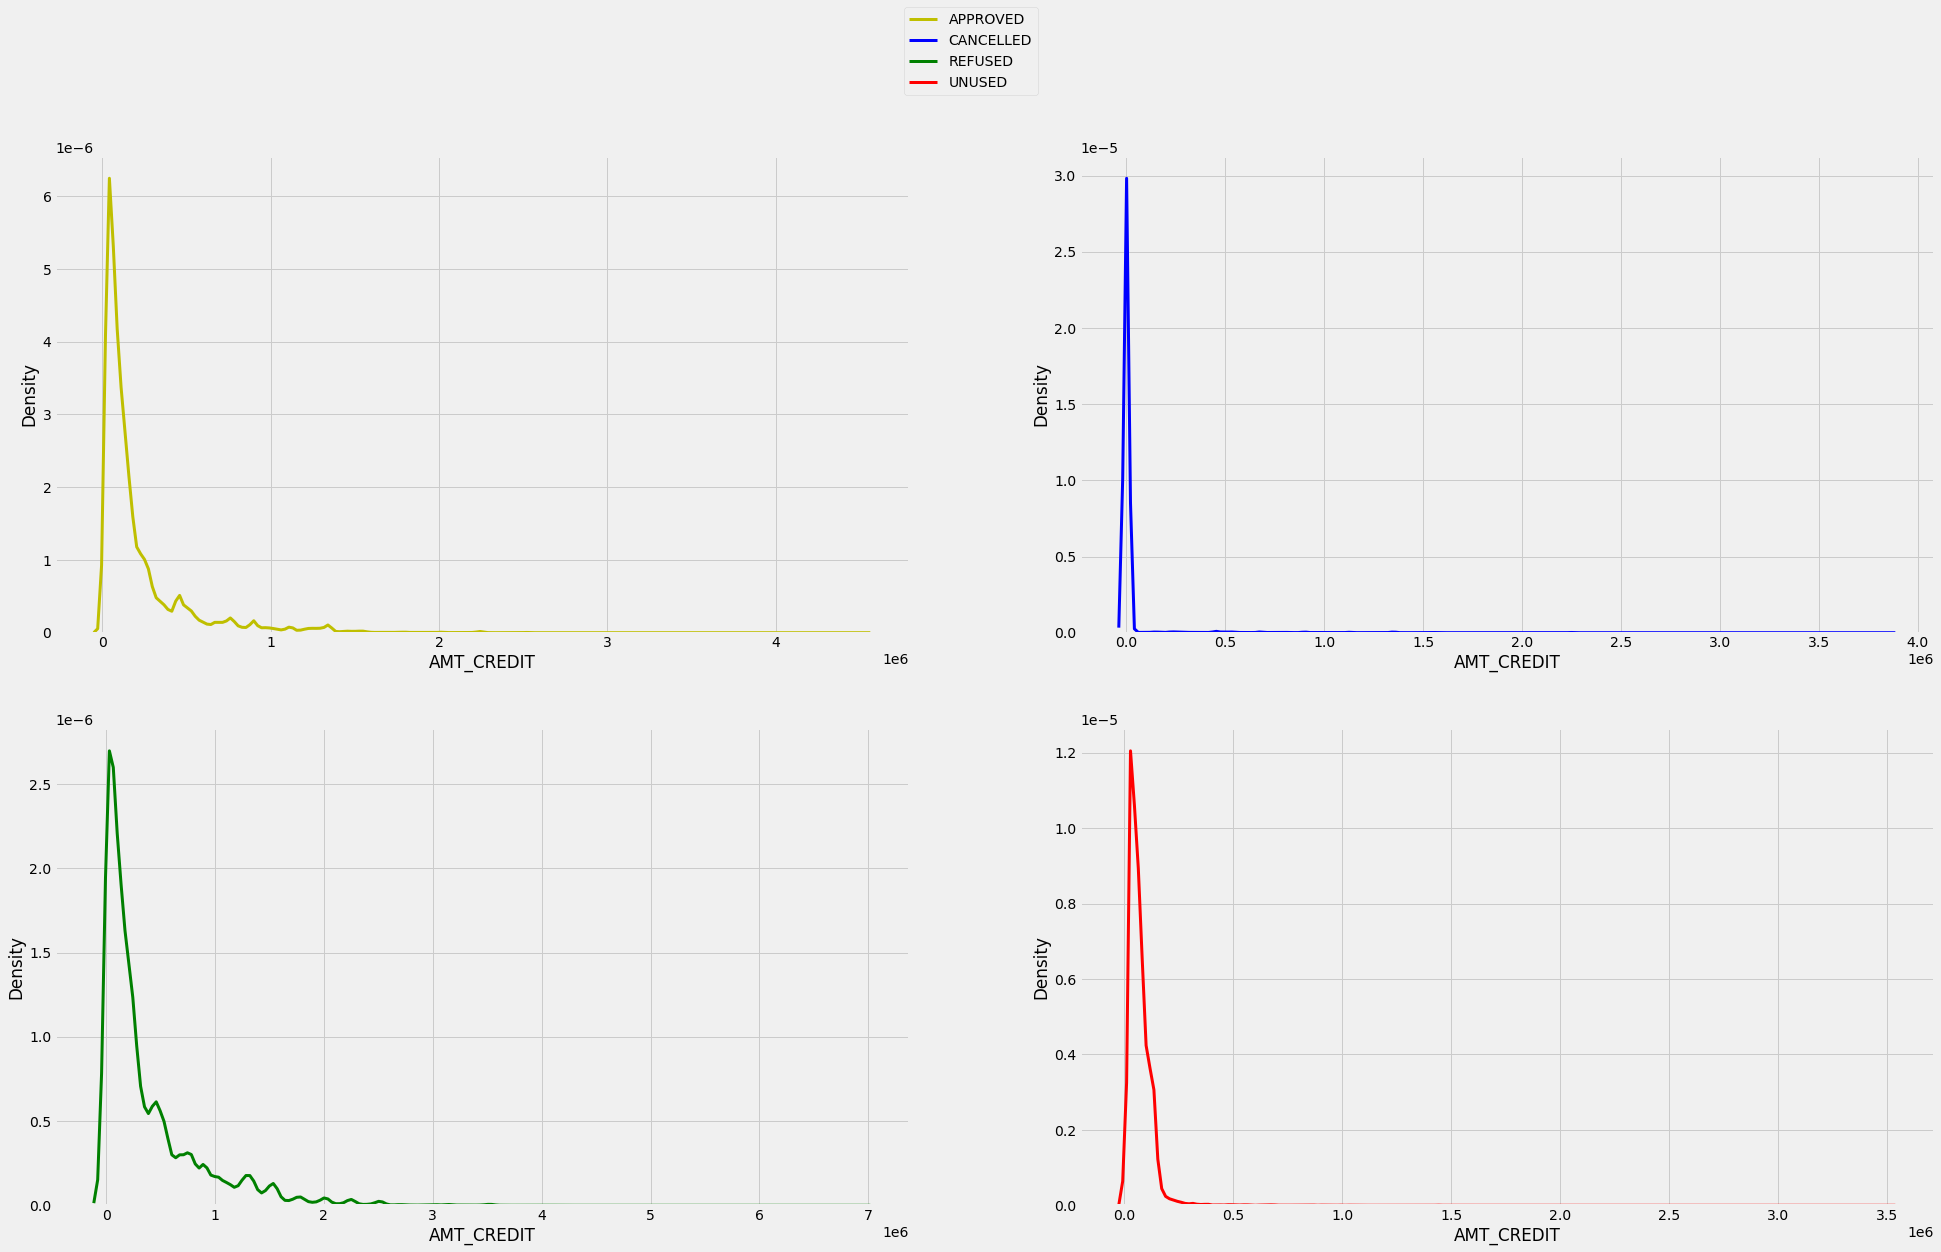

In [151]:
# Using the function to analyze variation of the AMT_CREDIT w.r.t. different contract type
dist_plot(col=['AMT_CREDIT'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans come from Country-wide channel and least from Credit and cash offices.__<br>
> __2.  Regional/Local loans have equal chances of getting approved or rejected.__

This is for AMT_GOODS_PRICE


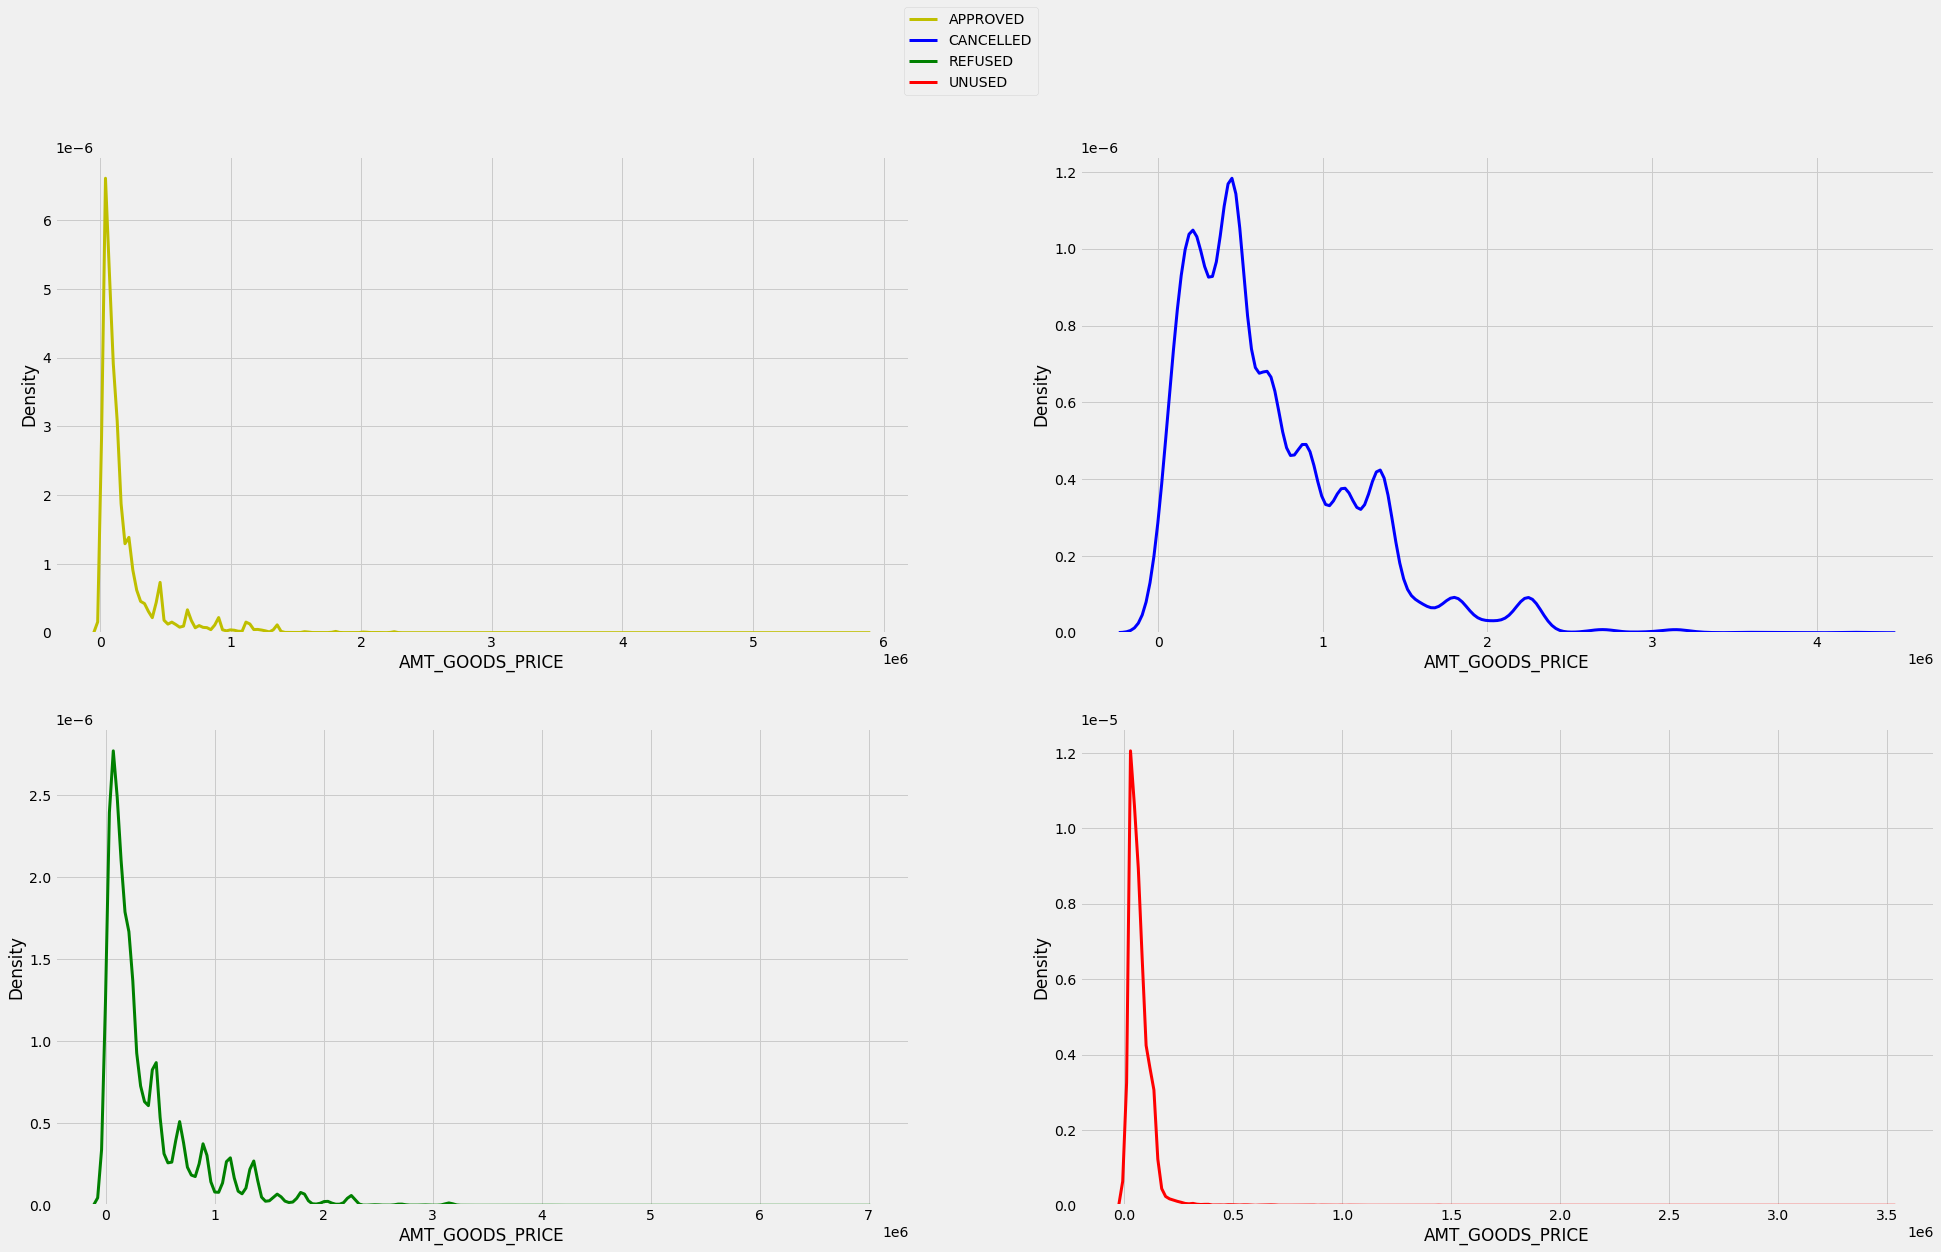

In [152]:
# Using the function to analyze variation of the AMT_GOODS_PRICE w.r.t. different contract type
dist_plot(col=['AMT_GOODS_PRICE'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Amount goods price in case of approved and rejected loan has almost similar trend except of the fact that count of applicants is little higher around goods price amount of 5 lakhs.__<br>
> __2.  Approved applicant has goods price lesser than the rejected loan applicant.__<br>
> __3.  Rejected applicants are more having goods worth 20 lakhs.__

This is for HOUR_APPR_PROCESS_START


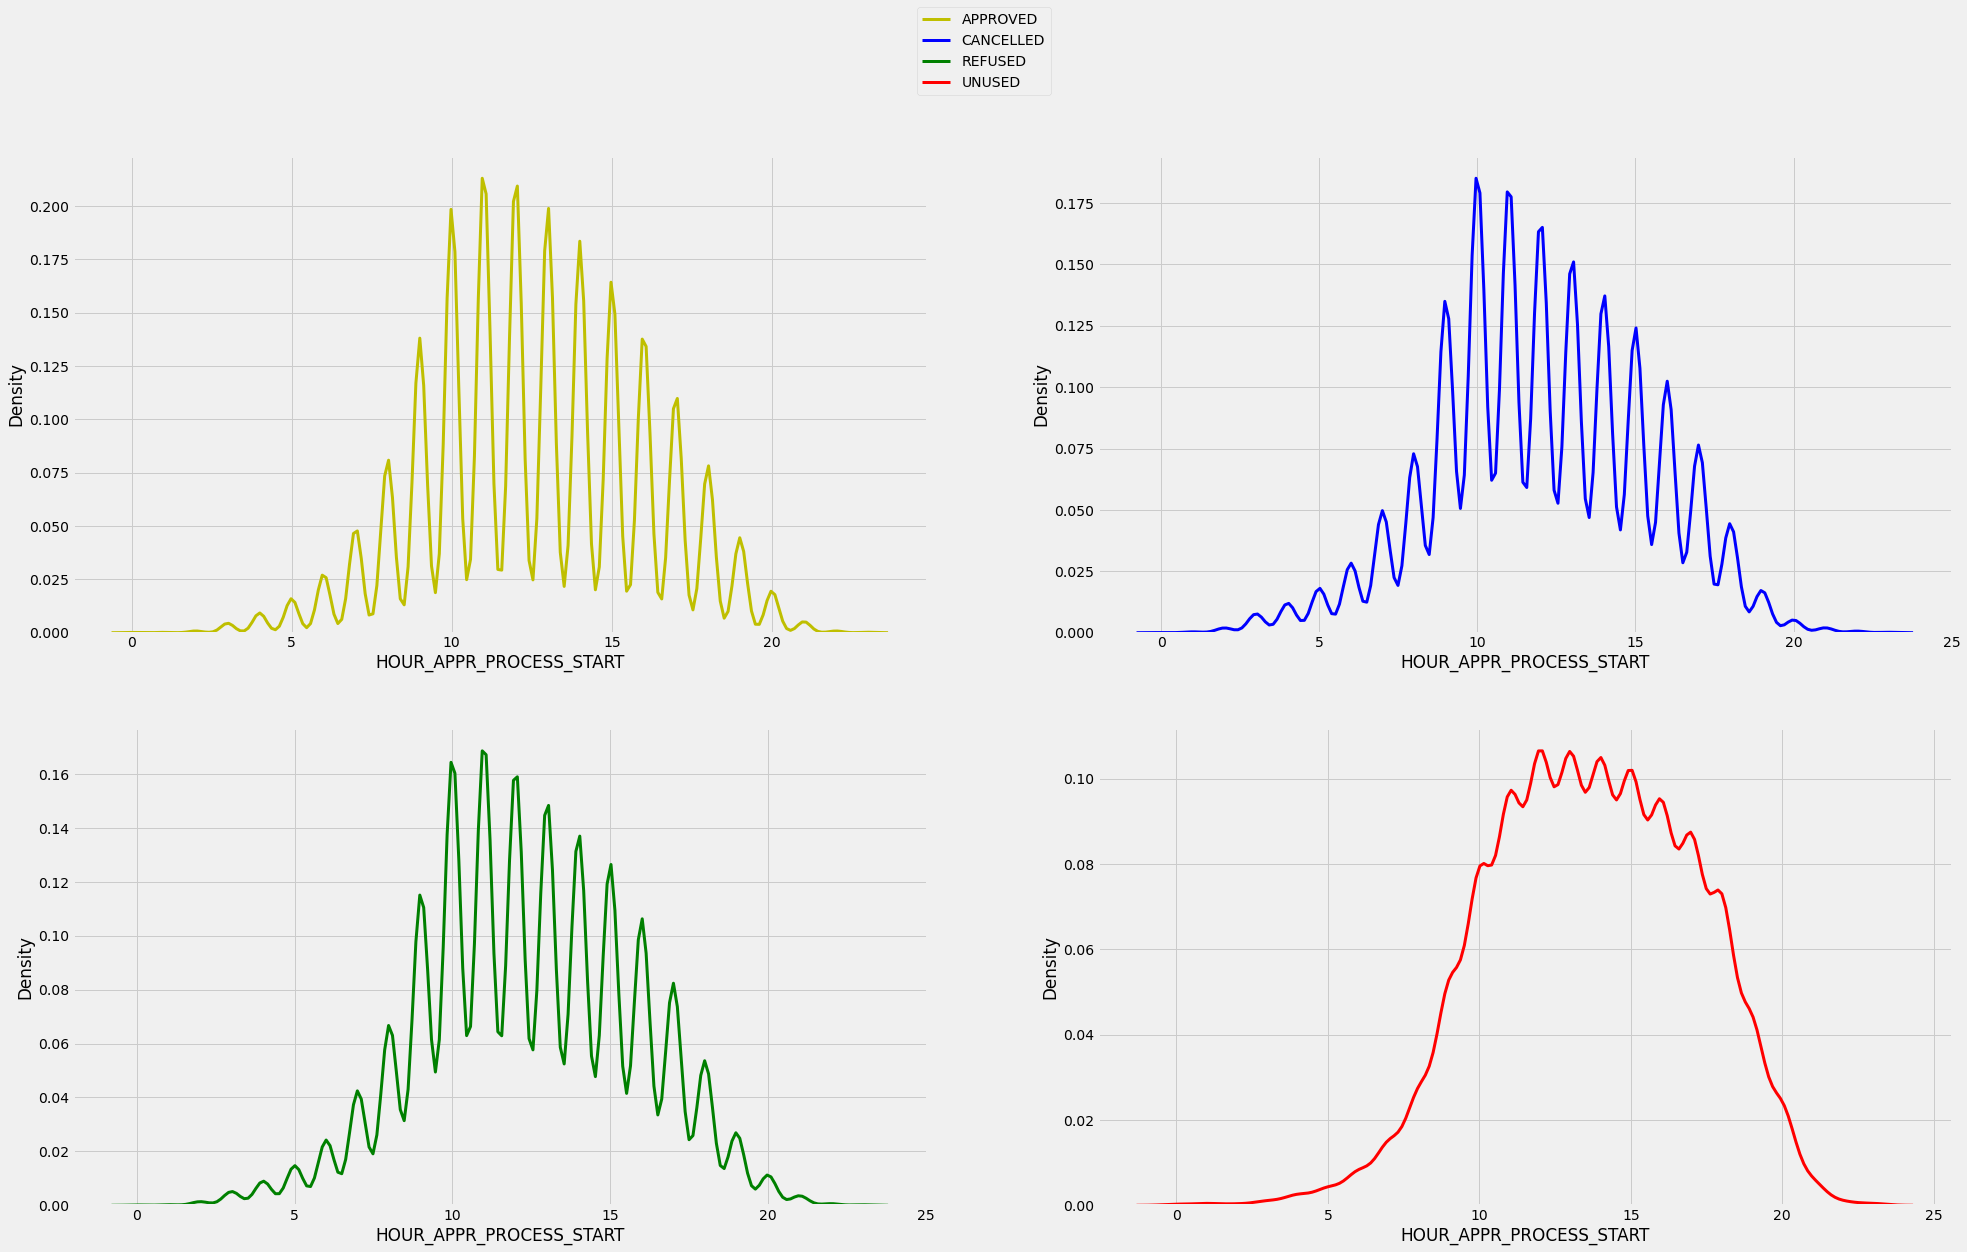

In [153]:
# Using the function to analyze variation of the HOUR_APPR_PROCESS_START w.r.t. different contract type
dist_plot(col=['HOUR_APPR_PROCESS_START'])

## <u><font color=purple>Inferences:</font></u>
> __1.  The quantity of loans approved during the 10th and 15th hour are maximum in each case, however more loans are approved in terms of figures.__<br>
> __2.  On almost regular intervals there is a drop in the count of applicants approved/ rejected. The figure is higher in case of approved clients.__

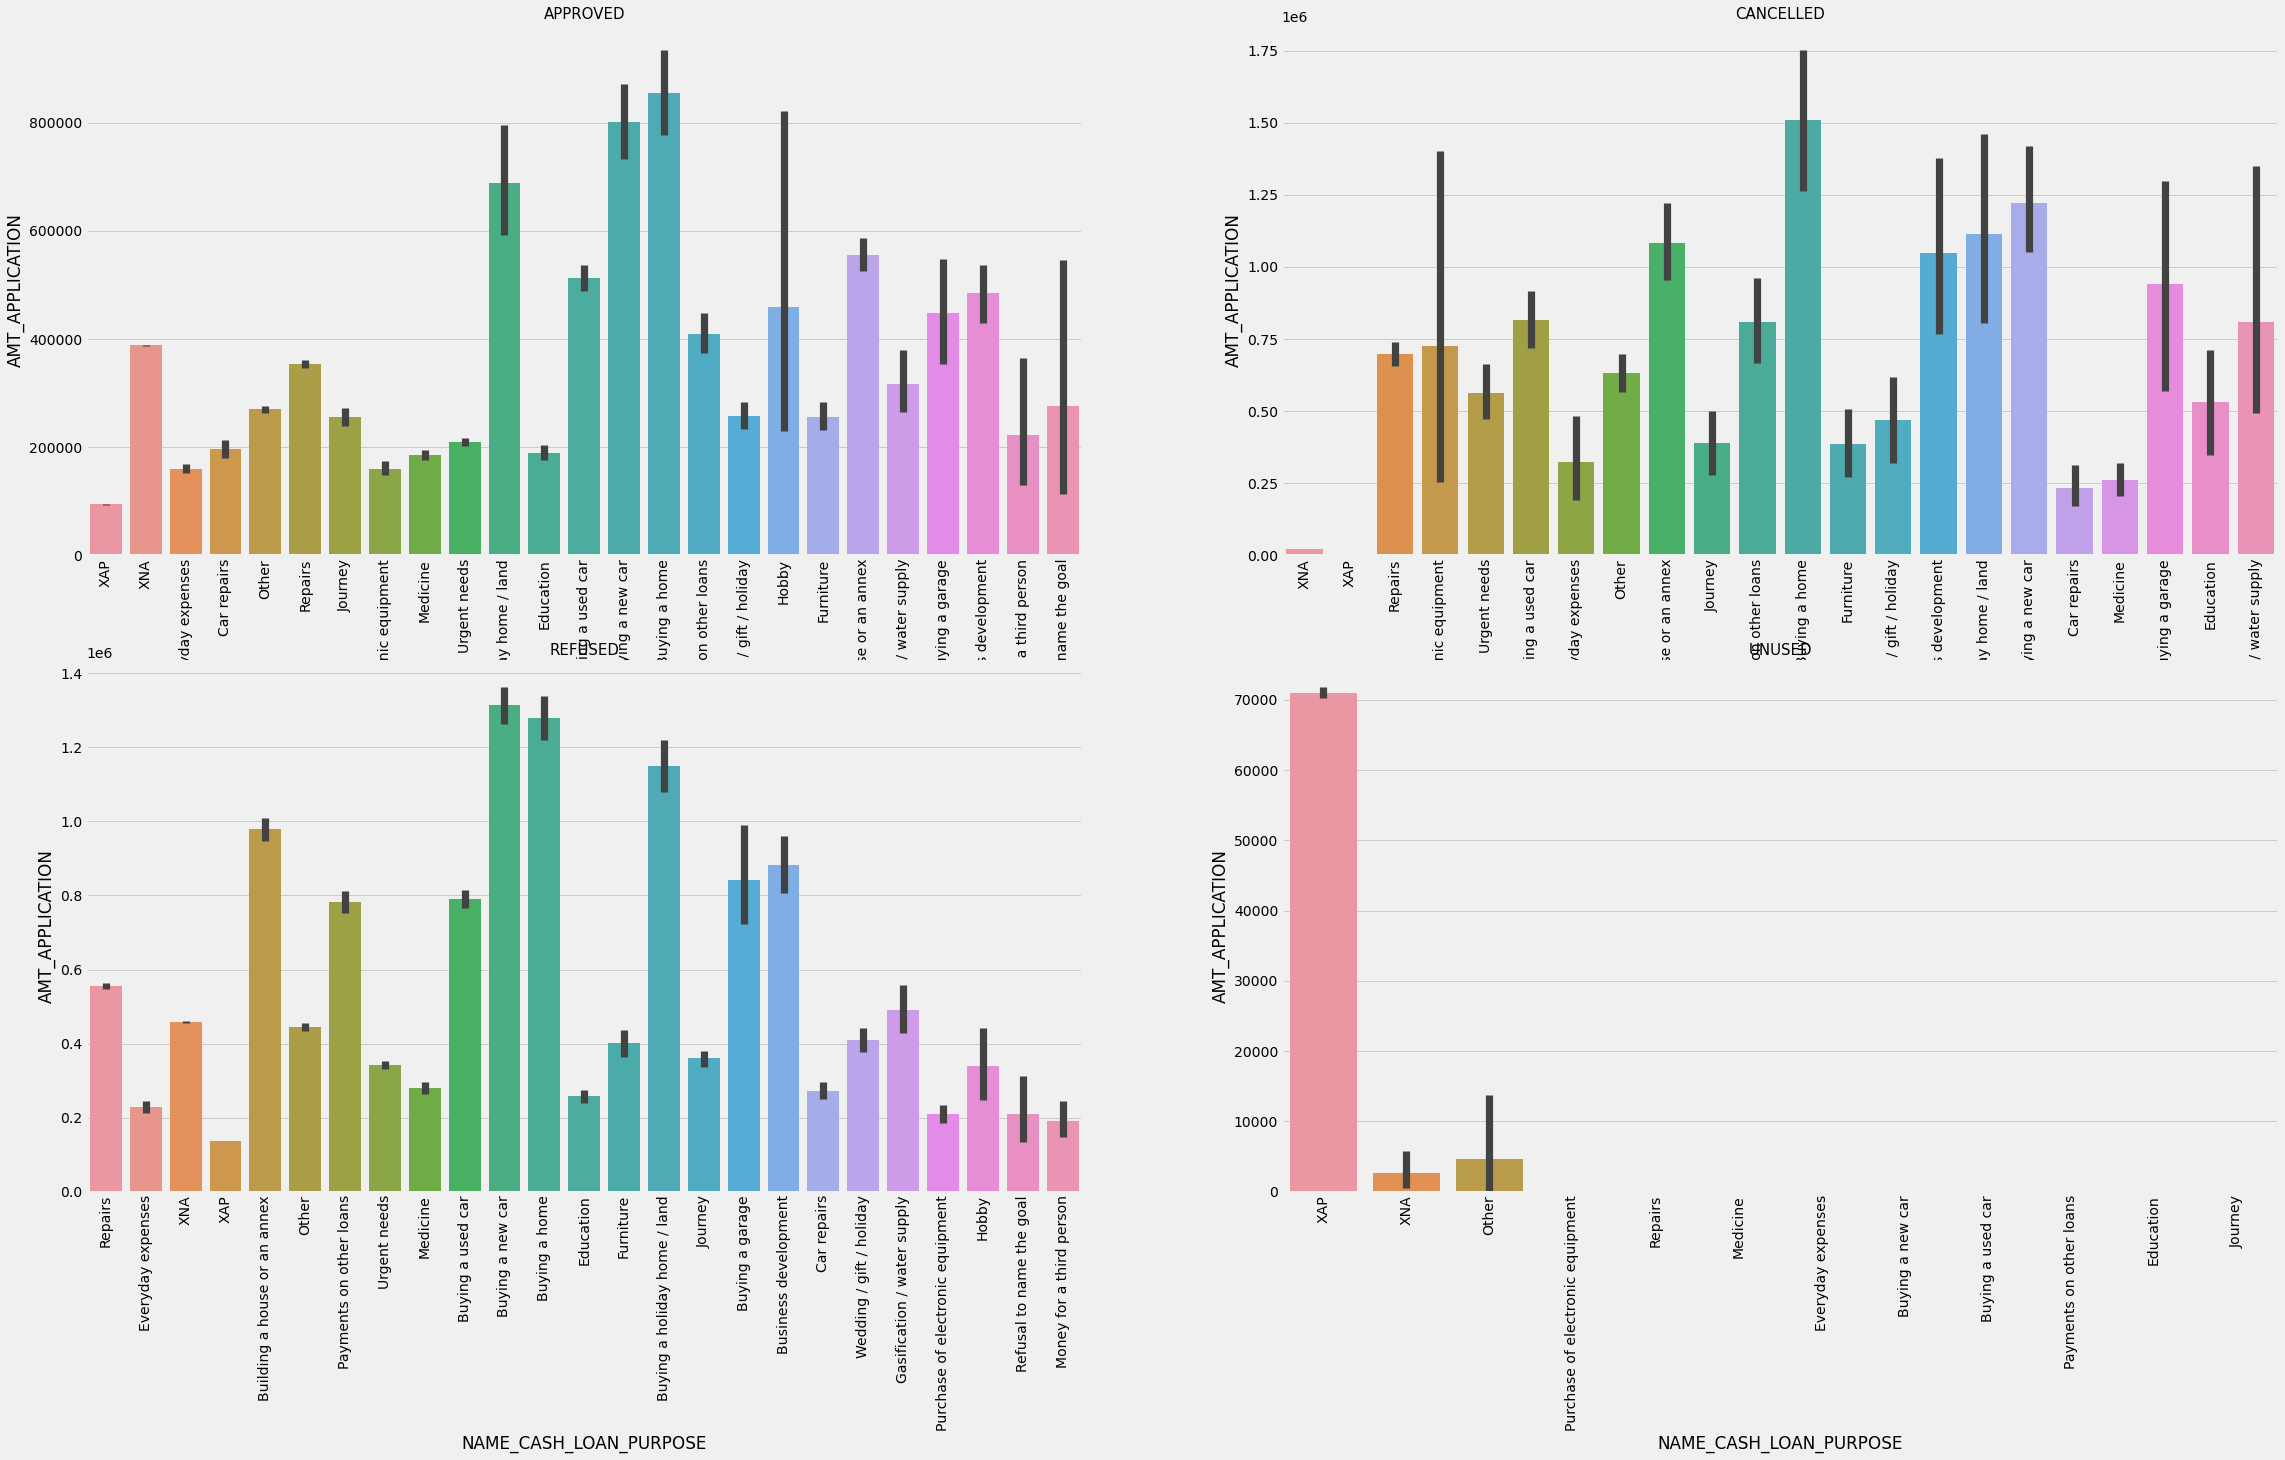

In [154]:
# Plotting categorical and continuous variables
bar_plot(col1='NAME_CASH_LOAN_PURPOSE',col2='AMT_APPLICATION')

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans include either buying a property or a car whereas least includes loan for the third person.__<br>
> __2.  Majority of the loans above 8 lakhs are rejected.__

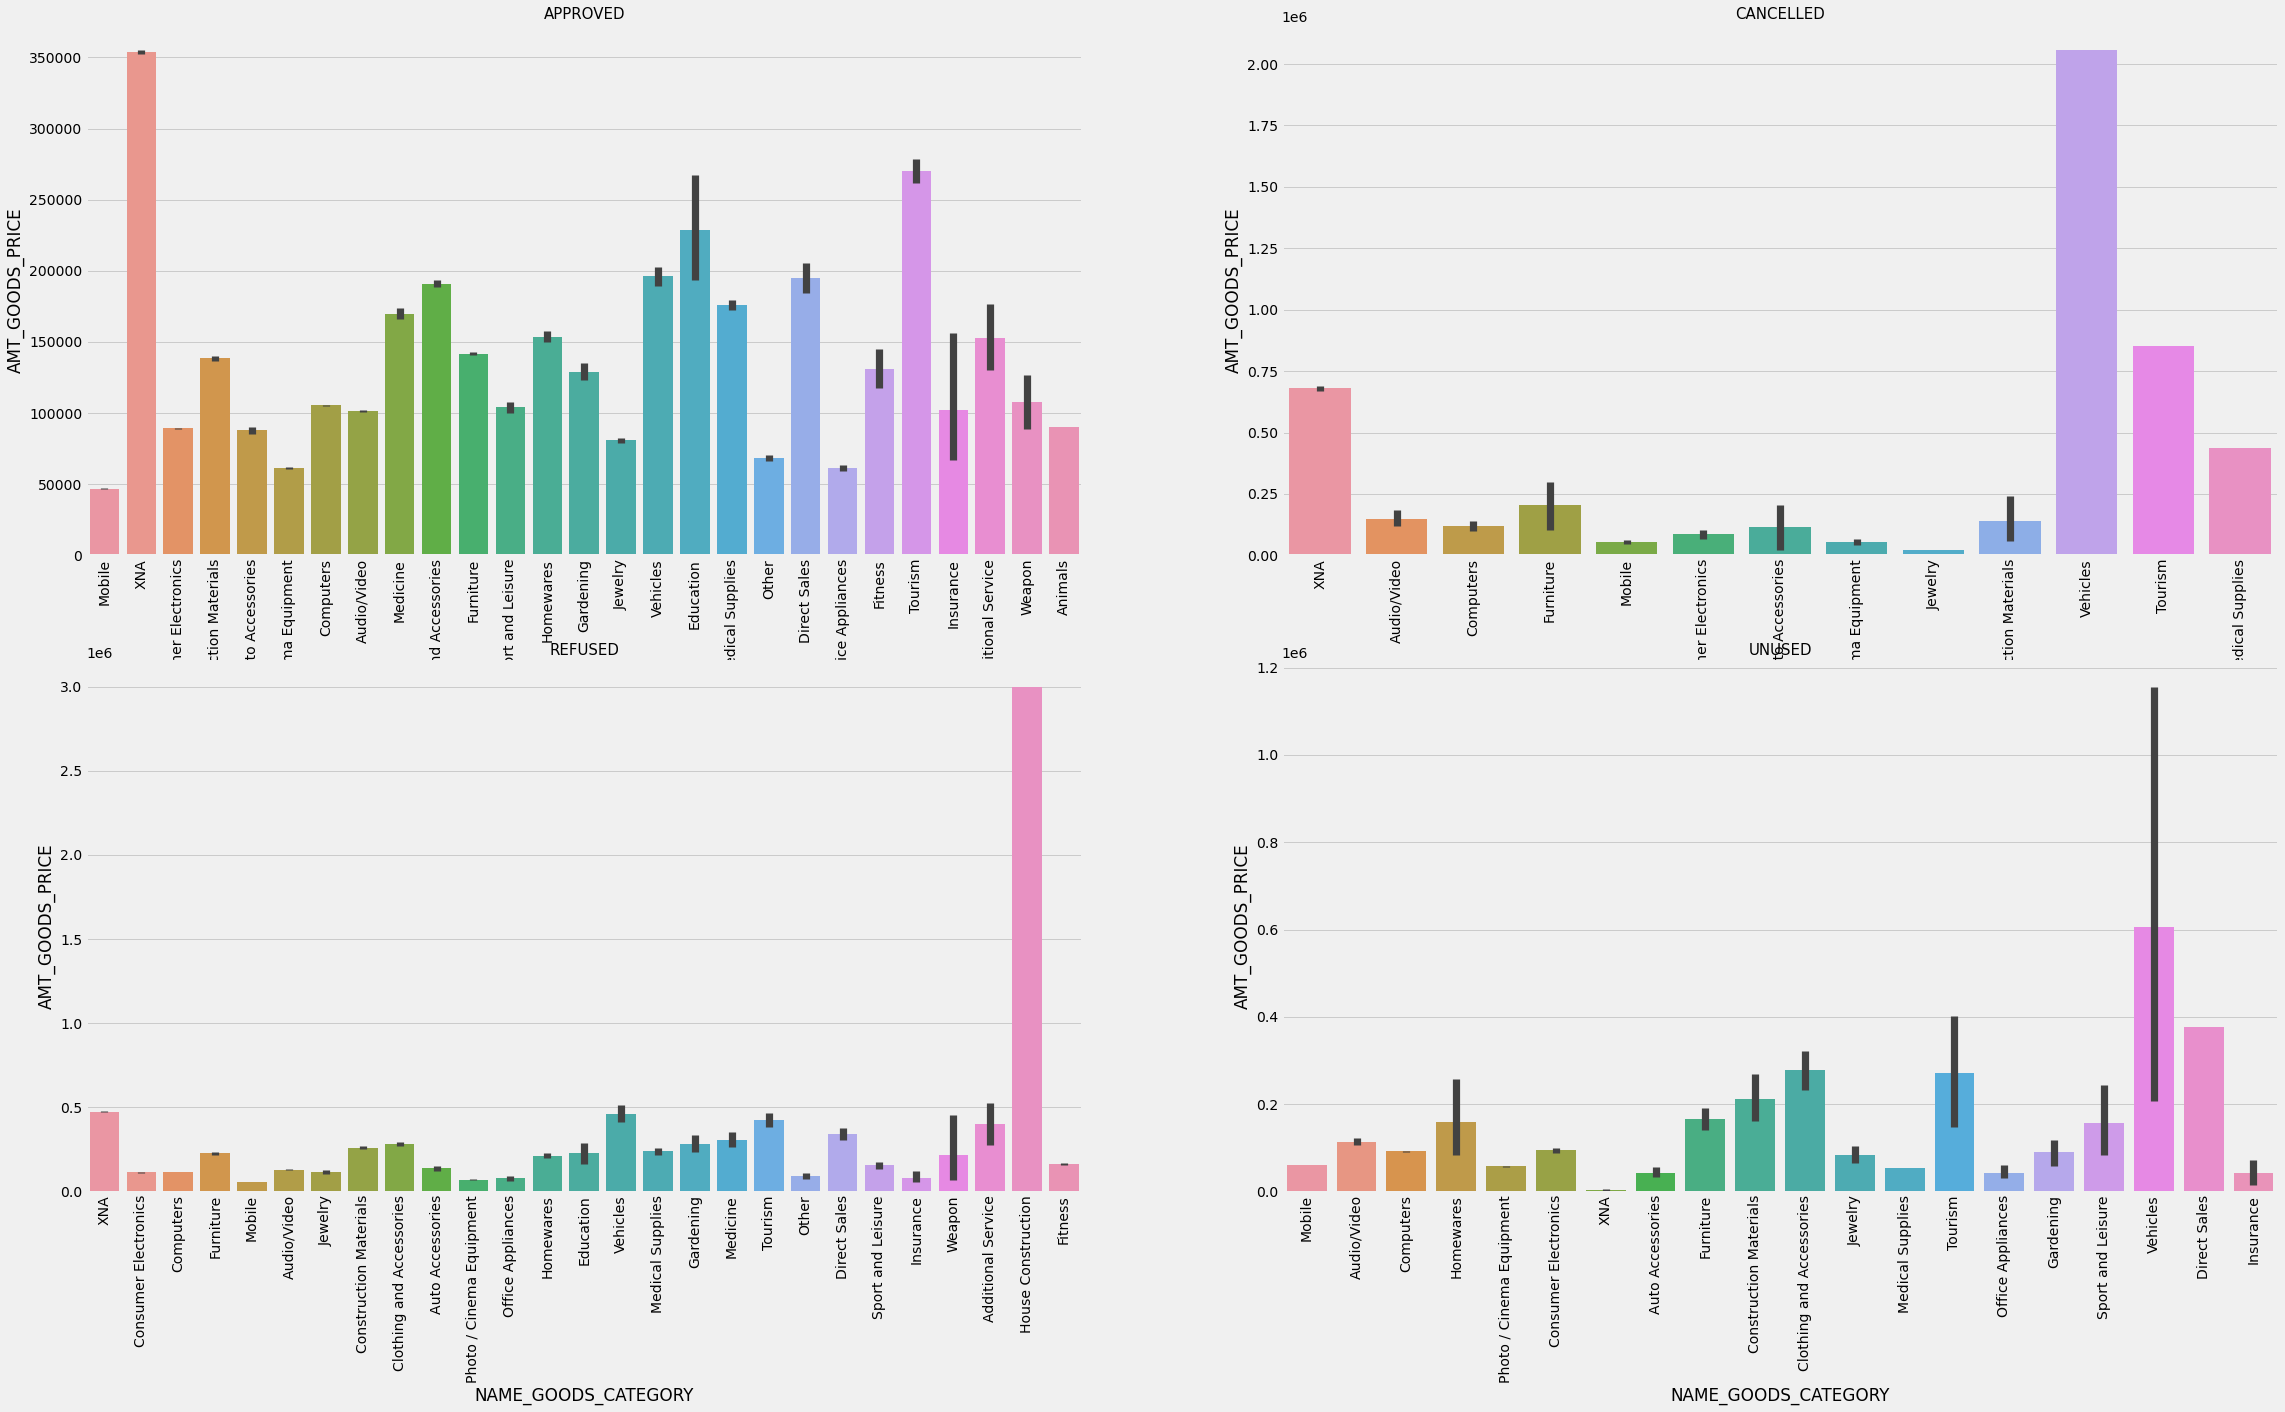

In [155]:
# Plotting categorical and continuous variables
bar_plot(col1='NAME_GOODS_CATEGORY',col2='AMT_GOODS_PRICE')

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of loans for the goods above 2 lakhs is rejected.__<br>
> __2.  None of the House Construction loans are approved.__

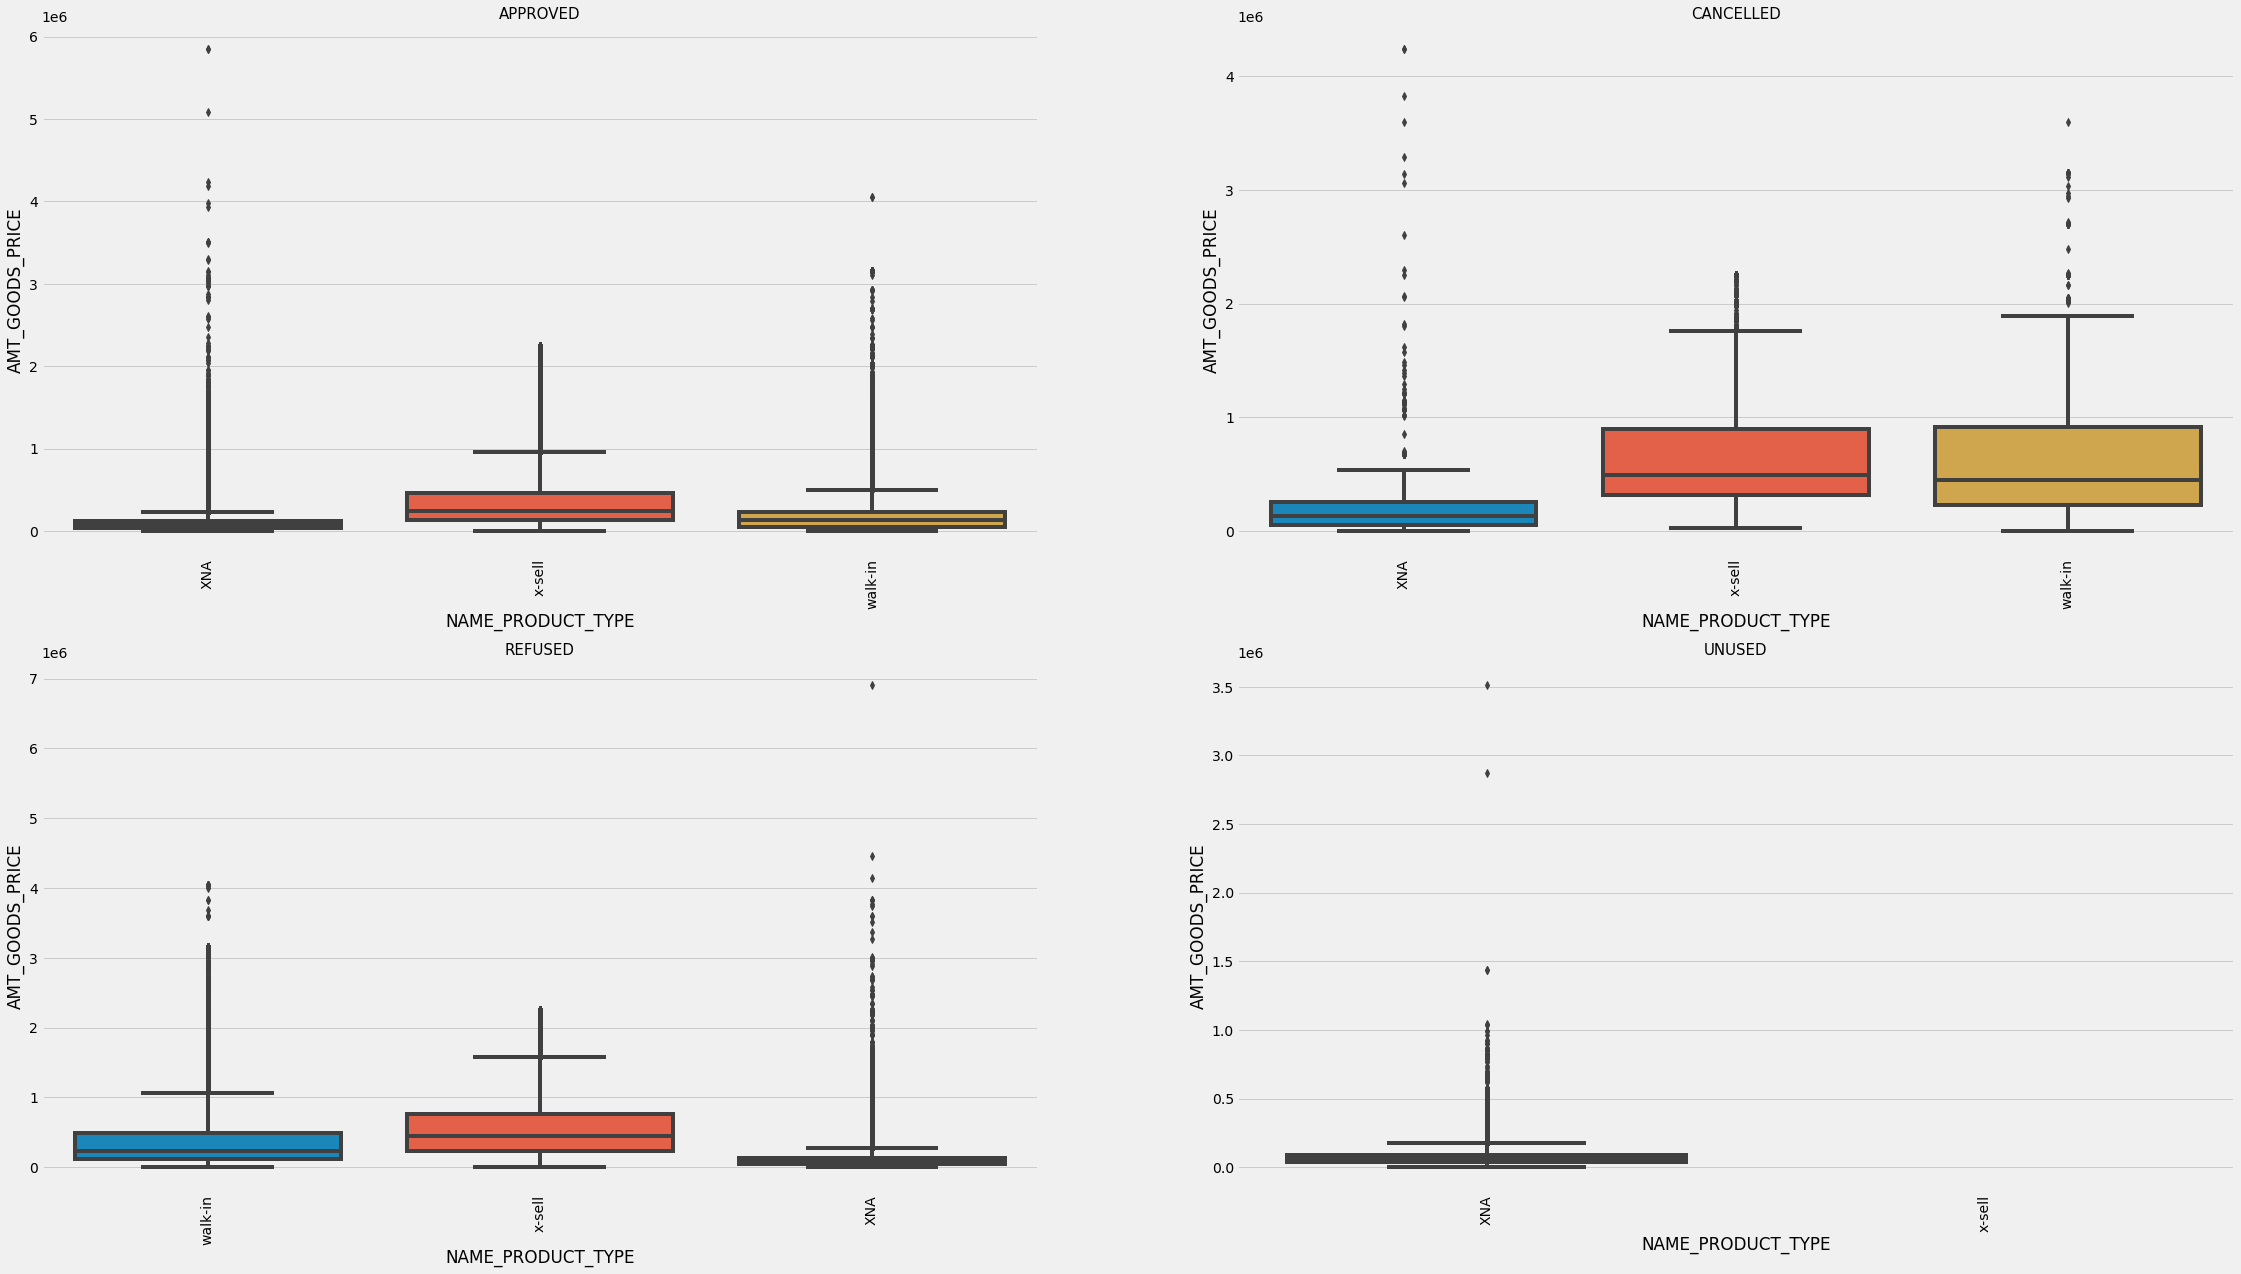

In [156]:
# Plotting categorical and continuous variables
box_plot(col1='NAME_PRODUCT_TYPE',col2='AMT_GOODS_PRICE')

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans have goods price greater than 5 lakh.__<br>
> __2.  The upper fences are quite higher in case of rejected loan applicant's goods' price.__

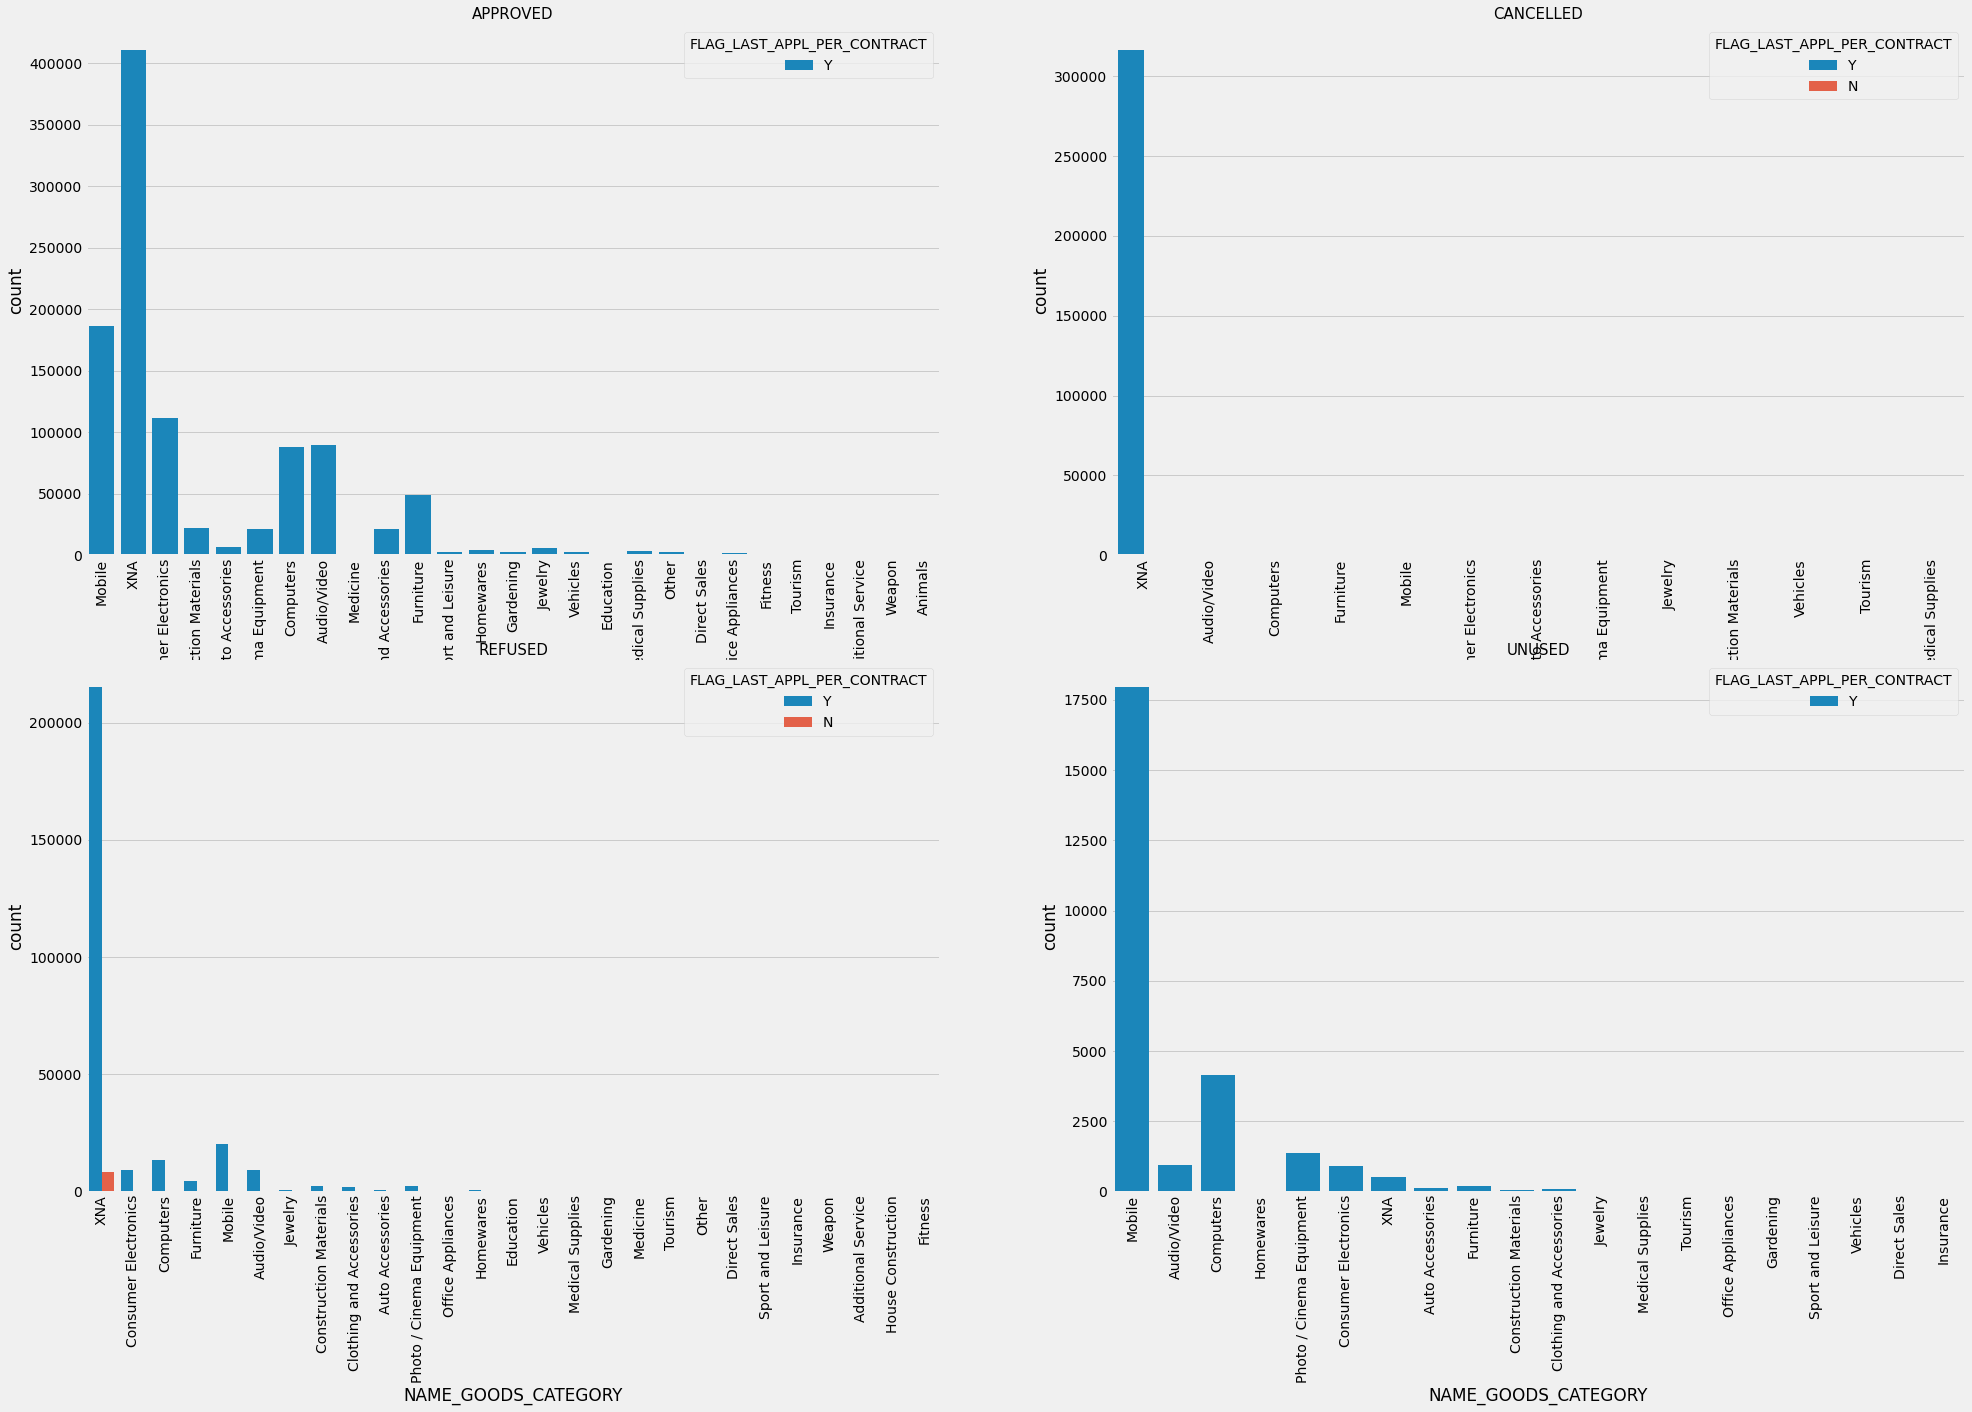

In [157]:
# Plotting categorical and continuous variables
count_plot_b(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col1='NAME_GOODS_CATEGORY',col2='FLAG_LAST_APPL_PER_CONTRACT')

## <u><font color=purple>Inferences:</font></u>
> __1.  In case of Flag last application per contract flag is yes, then the application will get rejected.__

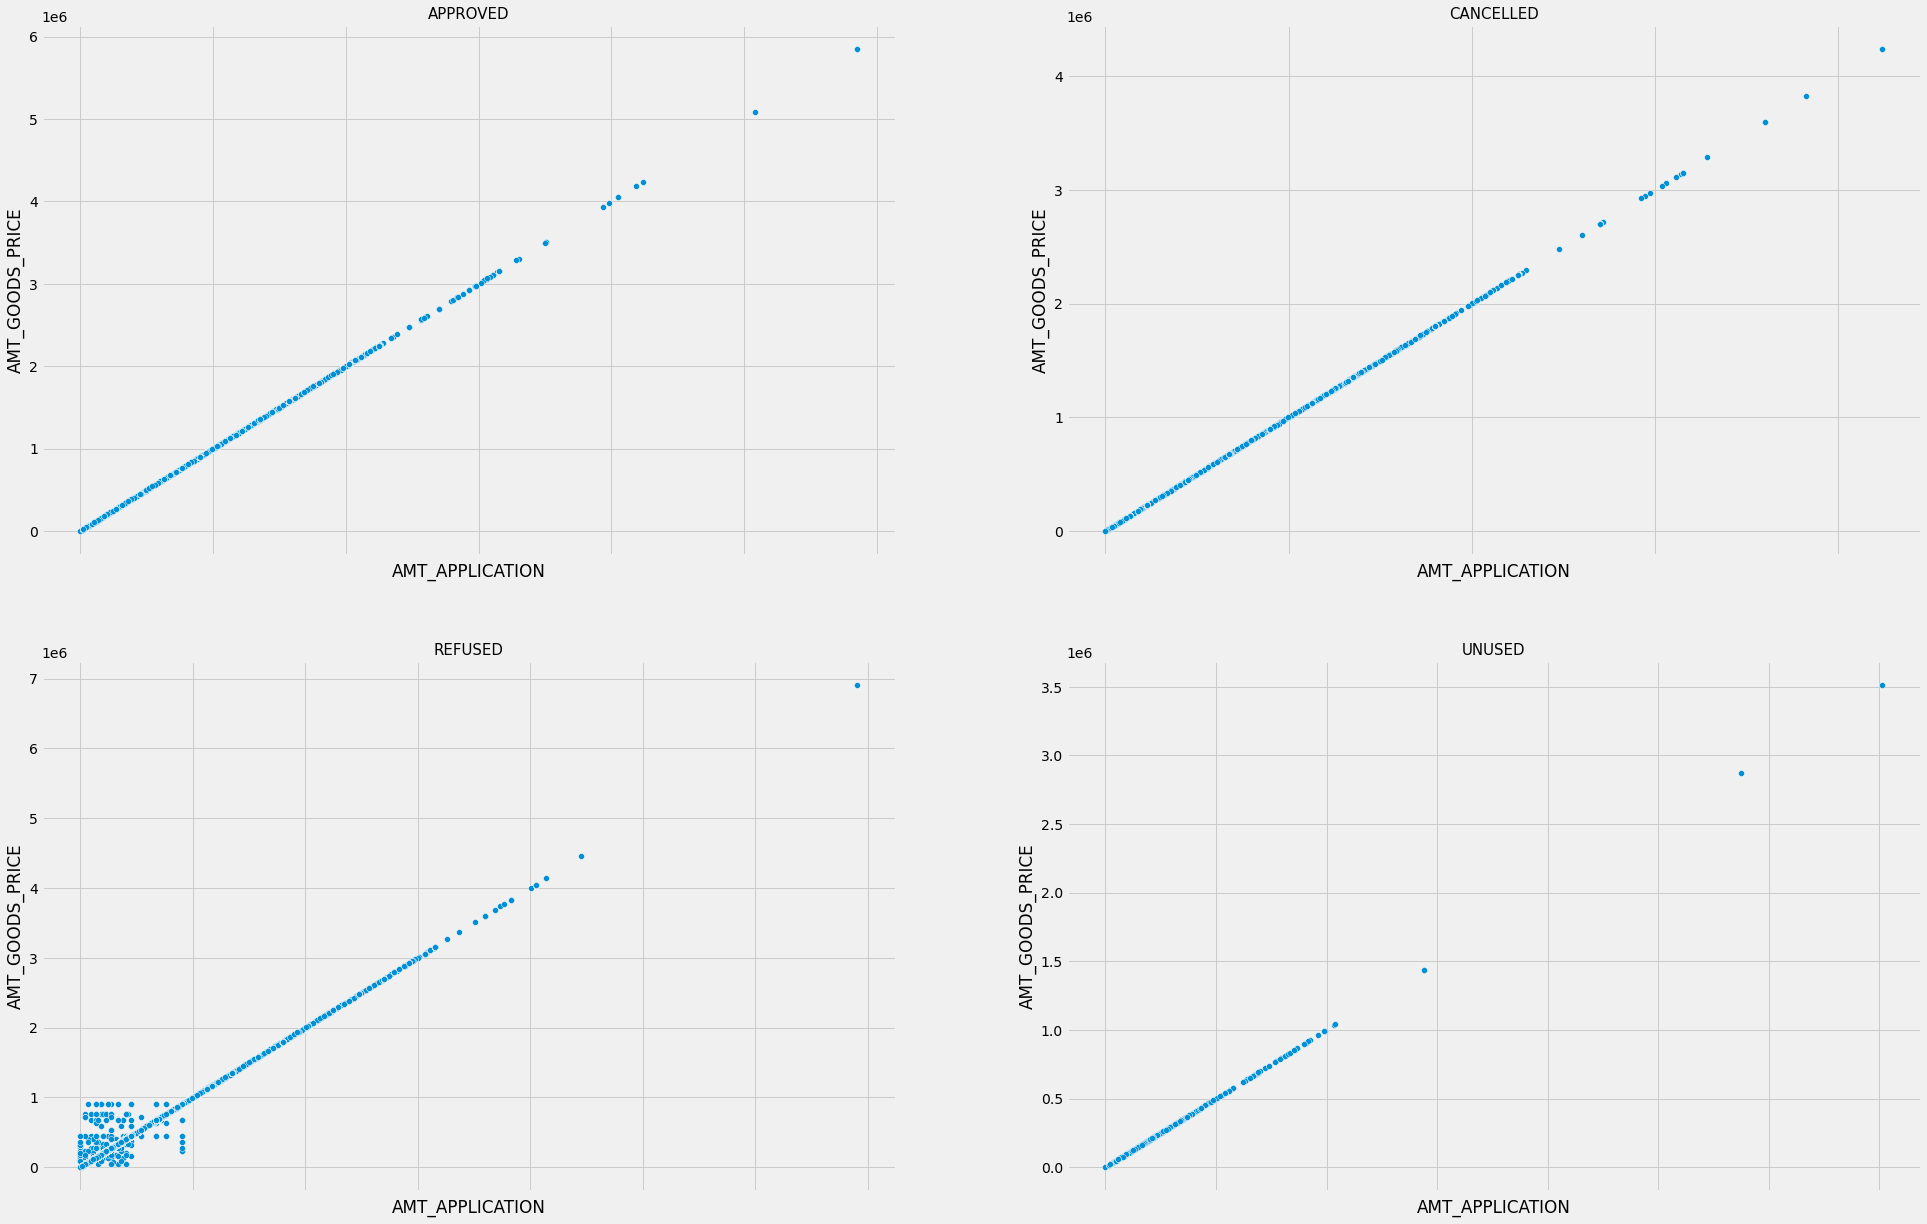

In [158]:
# Plotting continuous and continuous variables
scatter_plot(df_pre_App,df_pre_Can,df_pre_Ref,df_pre_Un,col1='AMT_APPLICATION',col2='AMT_GOODS_PRICE')

## <u><font color=purple>Inferences:</font></u>
> __1.  Amount application is directly proportional to amount of goods price except for the rejected cases with goods price below 10 lakhs.__

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

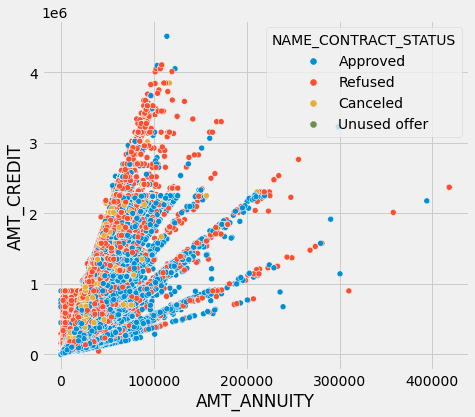

In [159]:
# Plotting continuous and continuous variables
plt.figure(figsize=(15,6))# sizing
plt.subplot(1,2,1)#subplot 1
sns.scatterplot(x=df_previous['AMT_ANNUITY'],y=df_previous['AMT_CREDIT'], hue=df_previous['NAME_CONTRACT_STATUS'])

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the rejected loans have annuity amount within 1lakh.__<br>
> __2.  Approx. 80% of the loans with annuity less than 20-30 K and amount credited below 8 lakhs is rejected.__

## Joining both the dataframes for better CREDIT RISK Analysis 

<font color=blue>__1. Analyzing previous dataframe to understand the type of join and joining condition__</font>

In [160]:
# Adding an additional column of Rank partitioned by SK_ID_CURR and ordered by SK_ID_PREV

df_previous['RNK_PREVID_BY_CURRID'] = df_previous.groupby('SK_ID_CURR')['SK_ID_PREV'].rank(method='max')
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_YIELD_GROUP  \
0                       15                           Y  ...            middle   
1                       11                           Y  ...        low_action   
2                       11                           Y  ...              high   
3                        7                           Y  ...            middle   
4                        9                           Y  ...              high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0            42.0   
1          Cash X-Sell: low           365243.0           134.0   
2         Cash X-Sell: high           365243.0           271.0   
3       Cash X-Sell: middle           365243.0           482.0   
4         Cash Street: high                NaN             NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0          42.0             37.0   
1                     916.0         -99.0            -99.0   
2                      59.0         -99.0            -99.0   
3                    -152.0         182.0            177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL TYPE_OF_PREV_LOAN RNK_PREVID_BY_CURRID  
0                       0.0           Unknown                  2.0  
1                       1.0           Unknown                  6.0  
2                       1.0           Unknown                  4.0  
3                       1.0           Unknown                 23.0  
4                       NaN     Personal Loan                  9.0  

[5 rows x 35 columns]

In [161]:
# Creating a new dataframe from the previous data with the most recent data across each SK_ID_CURR for the joining with the current data set

df_prev_join=df_previous[df_previous.RNK_PREVID_BY_CURRID==1.0]

In [162]:
# Creating a new dataframe with current and previous information about the applicant

df_final=df_current.join(df_prev_join, on='SK_ID_CURR', how='left', rsuffix='_PREV')
df_final.shape

(307511, 82)

In [163]:
df_final.info()    # Checking metadata of the new dataframe created using info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [164]:
# Dropping unwanted or repetitive columns from the final dataframe

df_final.drop(['SK_ID_CURR_PREV','SK_ID_PREV','RNK_PREVID_BY_CURRID'], inplace=True, axis=1)
df_final.shape

(307511, 79)

In [165]:
df_final.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     AGE_IN_YRS  \
count  3.075110e+05  307499.000000     3.072330e+05  307511.000000   
mean   5.990260e+05   27108.573909     5.383962e+05      43.936976   
std    4.024908e+05   14493.737315     3.694465e+05      11.956135   
min    4.500000e+04    1615.500000     4.050000e+04      20.520000   
25%    2.700000e+05   16524.000000     2.385000e+05      34.010000   
50%    5.135310e+05   24903.000000     4.500000e+05      43.150000   
75%    8.086500e+05   34596.000000     6.795000e+05      53.920000   
max    4.050000e+06  258025.500000     4.050000e+06      69.120000   

       YRS_OF_CURR_EMP  DAYS_REGISTRATION  ...  NFLAG_LAST_APPL_IN_DAY  \
count    307511.000000      307511.000000  ...            62509.000000   
mean        -12.471337        4986.120327  ...                0.997264   
std          40.963259        3522.886321  ...                0.052232   
min         -99.000000           0.000000  ...                0.000000   
25%           0.790000        2010.000000  ...                1.000000   
50%           3.320000        4504.000000  ...                1.000000   
75%           7.560000        7479.500000  ...                1.000000   
max          49.070000       24672.000000  ...                1.000000   

       DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count   62509.000000      62509.000000  53779.000000        46735.000000   
mean      936.654530        390.192340     14.042693       345433.090810   
std       786.901407       1931.839765     12.137262        82858.407432   
min         2.000000         -1.000000      0.000000        -2919.000000   
25%       323.000000         -1.000000      6.000000       365243.000000   
50%       653.000000         30.000000     12.000000       365243.000000   
75%      1391.000000        149.000000     18.000000       365243.000000   
max      2922.000000     120000.000000     84.000000       365243.000000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count    46735.000000               46735.000000   46735.000000   
mean      1015.343575               28231.955986     723.853643   
std        803.518443               98662.660532     795.920908   
min        -99.000000               -2801.000000     -99.000000   
25%        383.500000               -1167.000000      59.000000   
50%        756.000000                -323.000000     467.000000   
75%       1555.000000                  79.000000    1244.000000   
max       2891.000000              365243.000000    2858.000000   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count      46735.000000               46735.000000  
mean         691.630085                   0.266931  
std          788.187233                   0.442361  
min          -99.000000                   0.000000  
25%           31.000000                   0.000000  
50%          429.000000                   0.000000  
75%         1192.000000                   1.000000  
max         2799.000000                   1.000000  

[8 rows x 45 columns]

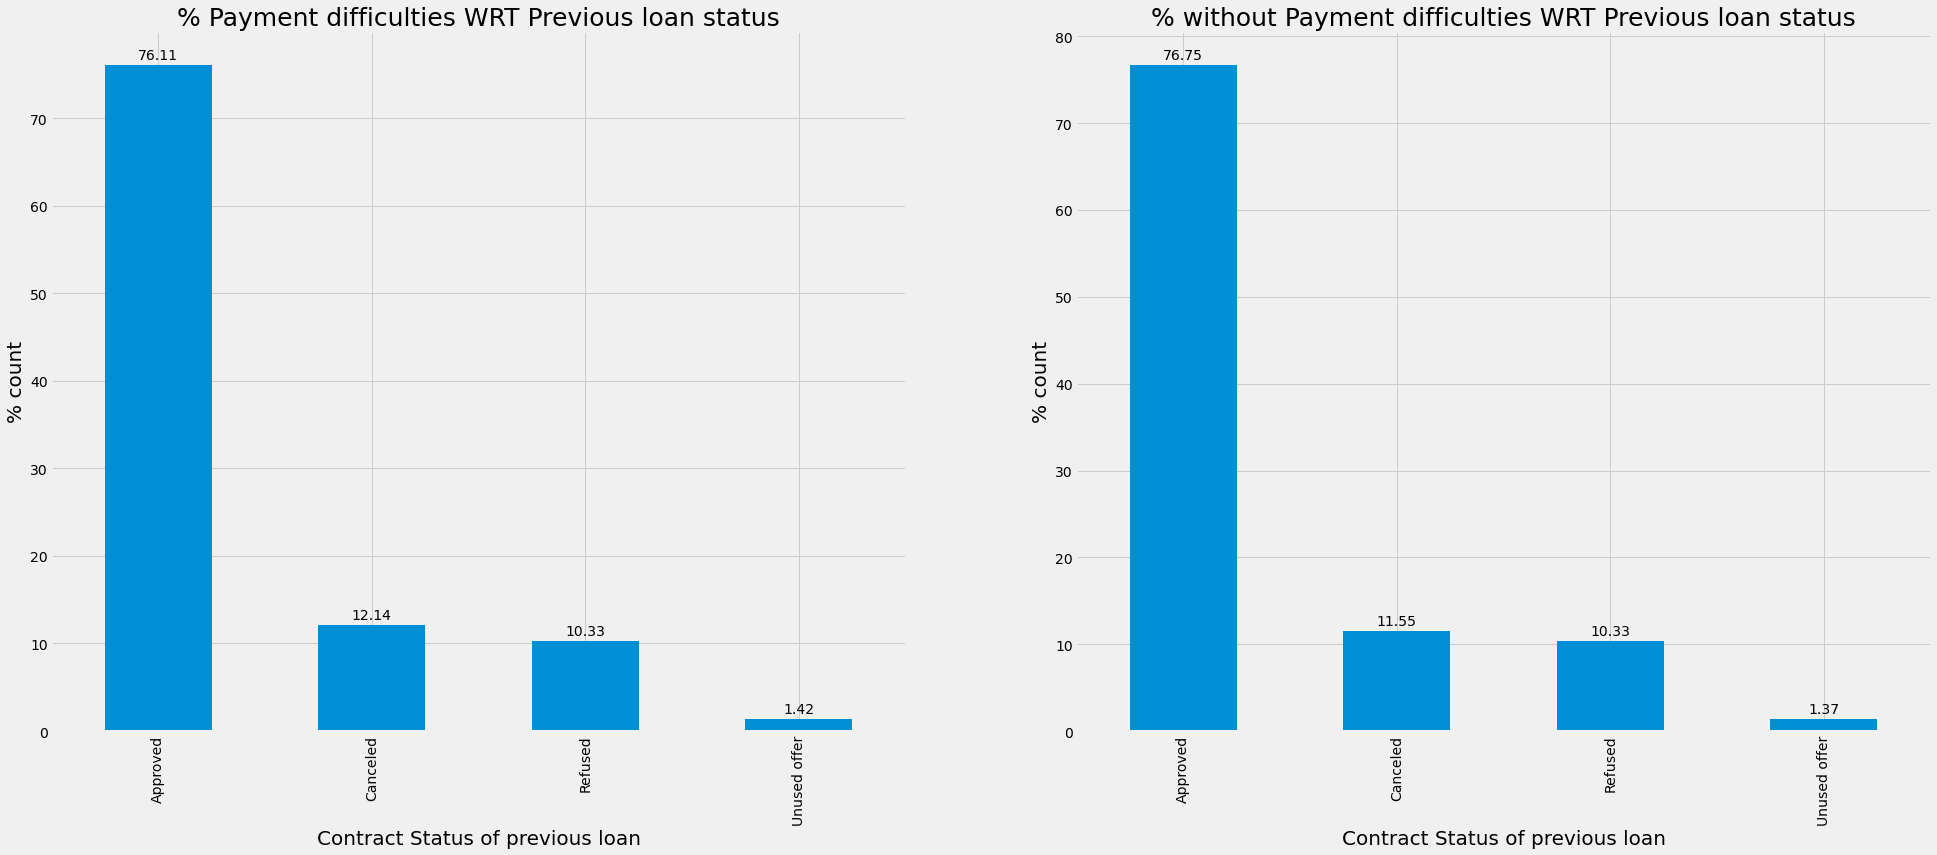

In [166]:
# Analyzing different contract status from the previous loans wrt to Target from the current loan

plt.figure(figsize=(30,12))# sizing
plt.subplot(1,2,1)#subplot 1
T1=(df_final[df_final['TARGET']==1].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title('% Payment difficulties WRT Previous loan status', fontsize=25)
plt.ylabel('% count',fontsize=20)
plt.xlabel('Contract Status of previous loan',fontsize=20)

plt.subplot(1,2,2)
T0=(df_final[df_final['TARGET']==0].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.title('% without Payment difficulties WRT Previous loan status',fontsize=25)
plt.ylabel('% count',fontsize=20)
plt.xlabel('Contract Status of previous loan',fontsize=20)

ann_count(T1)
ann_count(T0)
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Applicants who were previously approved for the loans had difficulty in paying back at some point of time.__

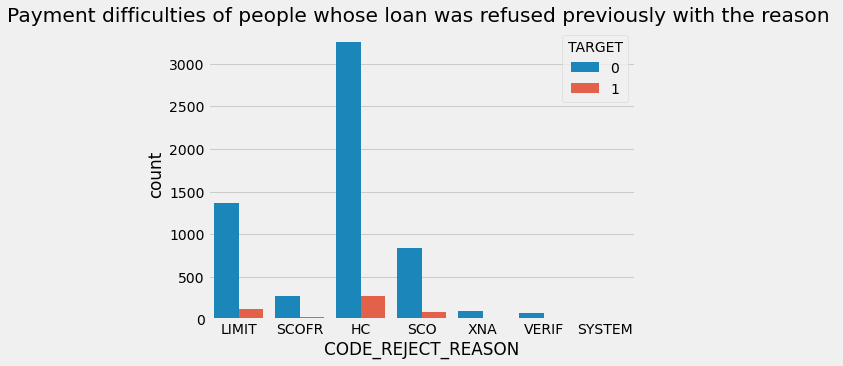

In [167]:
# Analyzing different reject reasons across the Target of the current applications

plt.figure(figsize=(15,5))# sizing
plt.subplot(1,2,1)#subplot 1
T=sns.countplot(df_final[df_final['NAME_CONTRACT_STATUS']=='Refused'].CODE_REJECT_REASON,hue=df_final['TARGET'])
plt.title('Payment difficulties of people whose loan was refused previously with the reason ')
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Applicants who were rejected for the previous application based on 'VERIF' and 'SYSTEM' reasons had never any difficulty in repayment.__

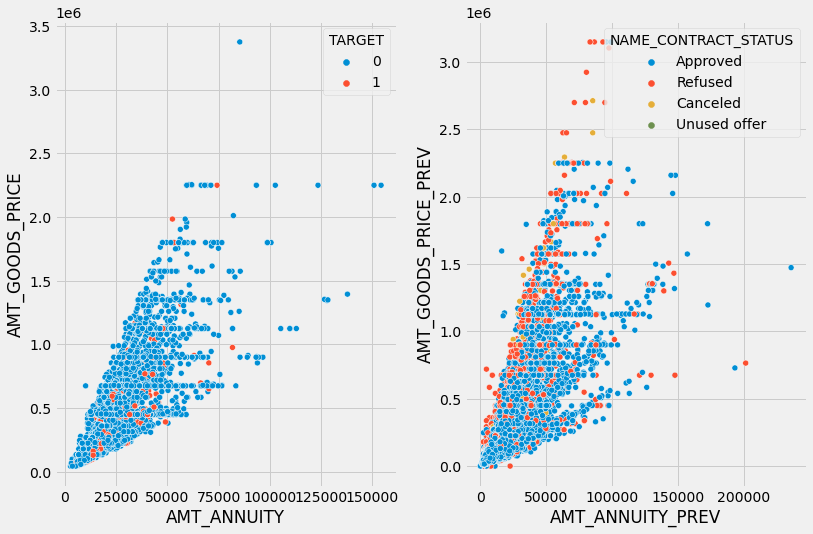

In [168]:
# Analyzing previous annuity and goods price for contract status v/s  current annuity and goods price for the different values of targets

plt.figure(figsize=(12,8))# sizing

plt.subplot(1,2,1)#subplot 1
sns.scatterplot(x=df_final['AMT_ANNUITY'],y=df_final[df_final.NAME_CONTRACT_STATUS=='Refused']['AMT_GOODS_PRICE'], hue=df_final['TARGET'])


plt.subplot(1,2,2)#subplot 1
sns.scatterplot(x=df_final['AMT_ANNUITY_PREV'],y=df_final['AMT_GOODS_PRICE_PREV'], hue=df_final['NAME_CONTRACT_STATUS'])
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  50% of the Applicants who were rejected for the previous loan had annuity amount lesser than 50K and goods price lesser than 15 lakhs.__<br>
> __2.  Since we do have applicants with payment difficulties in that portion of current values we can think of rejecting them based on other factors too.__

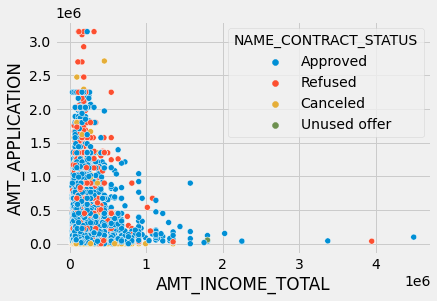

In [169]:
# Analyzing The amount of application which got rejected against the current total income.

sns.scatterplot(x=df_final['AMT_INCOME_TOTAL'],y=df_final['AMT_APPLICATION'], hue=df_final['NAME_CONTRACT_STATUS'])
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  If Amount application is more than twice that of Income total, higher is the probability of loan getting rejected.__

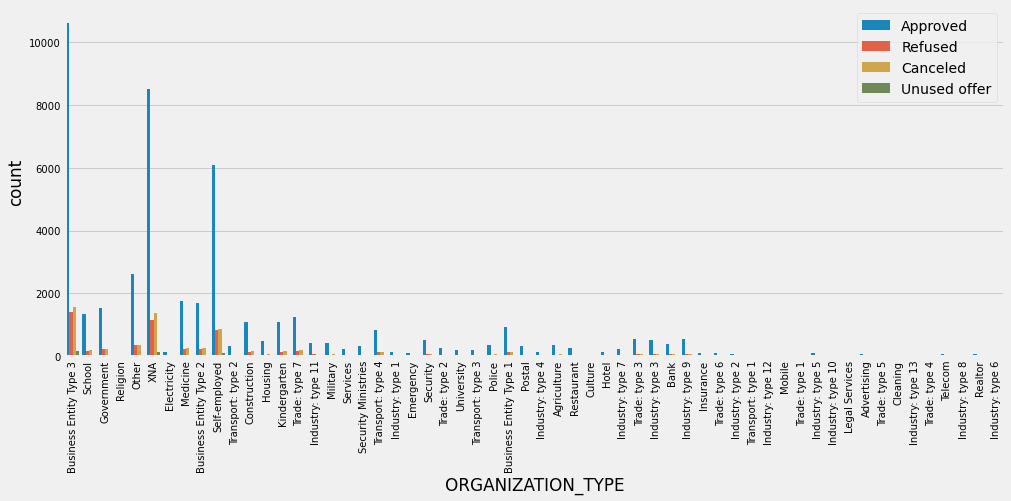

In [170]:
# Analyzing different contract types across different organization types

plt.figure(figsize=(15,6))# sizing

T=sns.countplot(df_final['ORGANIZATION_TYPE'],hue=df_final['NAME_CONTRACT_STATUS'])
plt.legend(loc='upper right')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Applicants from Business Entities of all types and self employed had higher chances of loan being refused.__

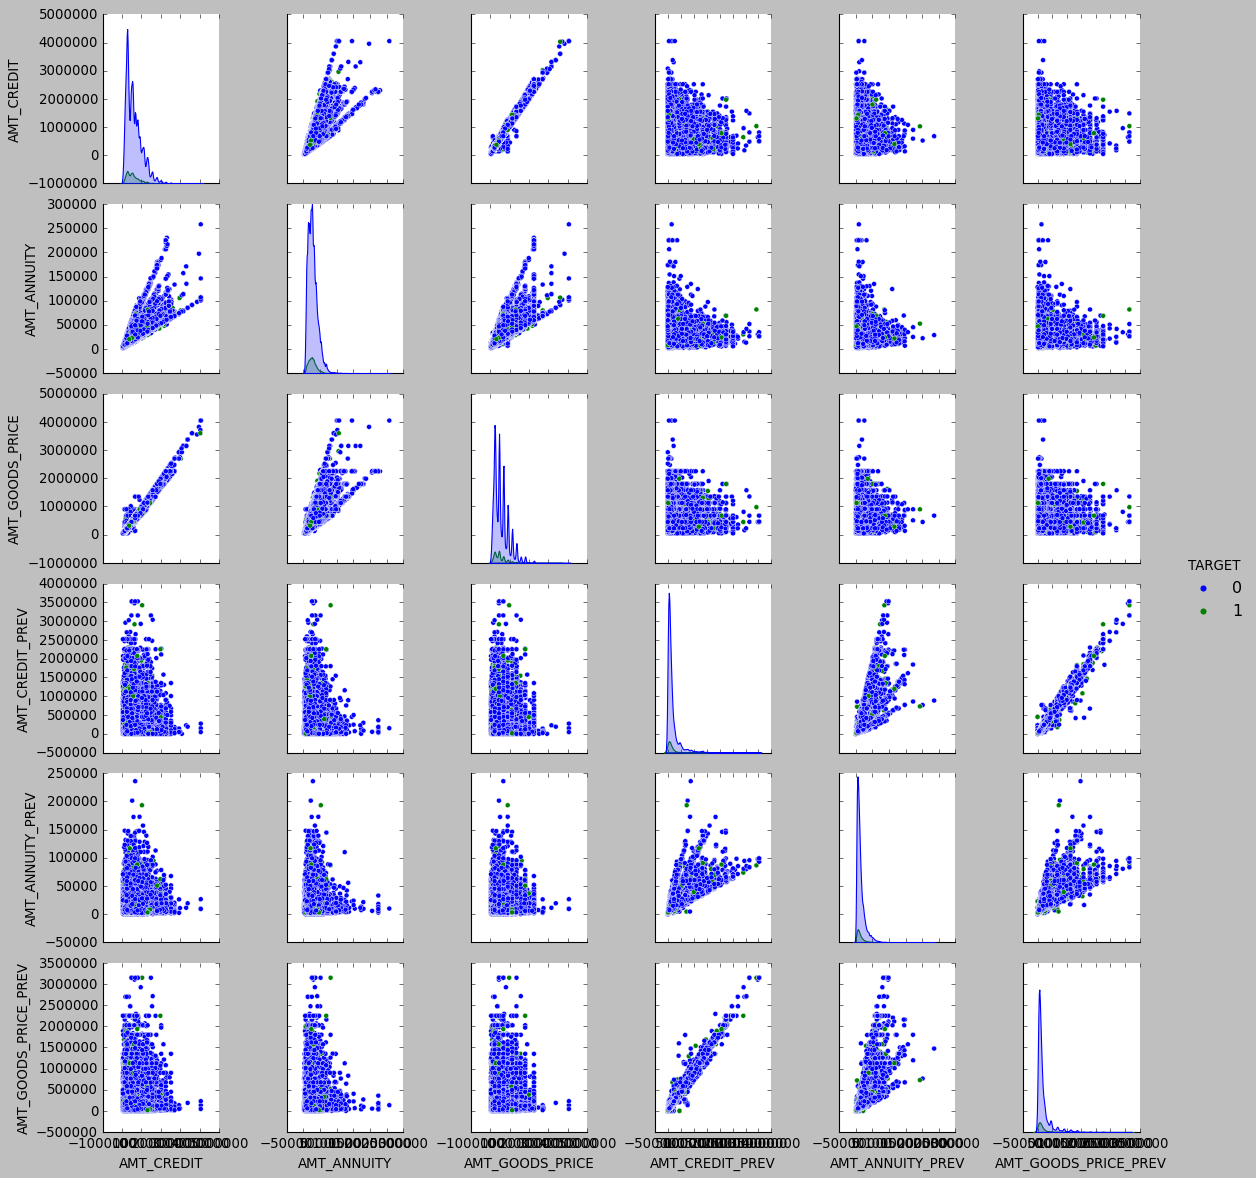

In [171]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
plt.style.use('classic')
sns.pairplot(data=df_final,vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AMT_CREDIT_PREV', 'AMT_ANNUITY_PREV', 'AMT_GOODS_PRICE_PREV'], hue='TARGET')
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Previous and Current loans applicants have linear growth of Annuity v/s Goods Price v/s Credit amount.__

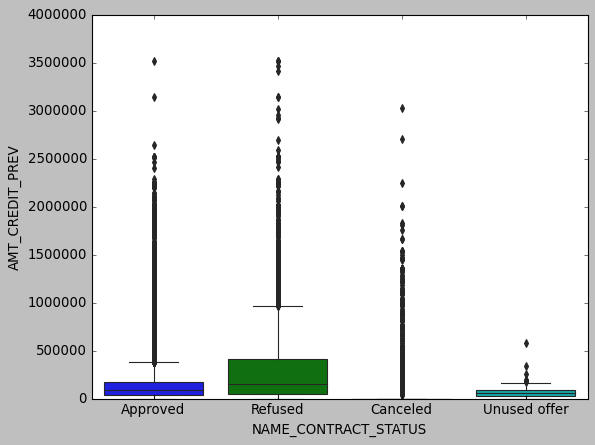

In [172]:
# Plot the box plot of salary for yes & no responses.

sns.boxplot(data=df_final, x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_PREV')
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Majority of the applicants with Credit amount greater than 2.5 lakhs are rejected.__<br>
> __2.  No credits were assigned to the loans that were cancelled.__

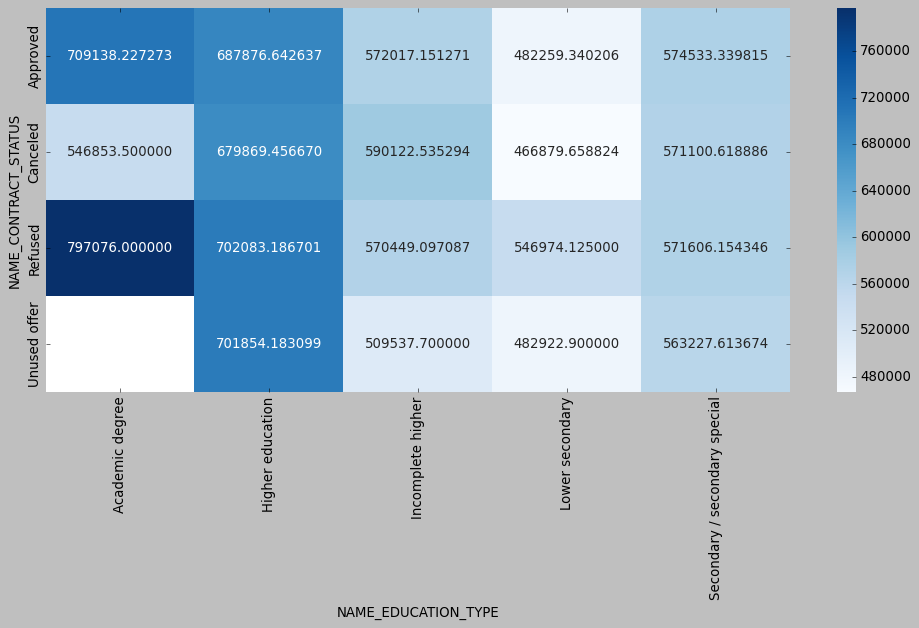

In [173]:
# Create heat map of Contract status vs marital vs response_flag
plt.figure(figsize=(15,6))
result=pd.pivot_table(data=df_final, index='NAME_CONTRACT_STATUS',columns=['NAME_EDUCATION_TYPE'],values='AMT_CREDIT')
sns.heatmap(result,annot=True,cmap='Blues',fmt='f')
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  Loan of applicants with credit amount below 5.40 lakhs will be approved inspite of any type of education.__<br>
> __2.  For loan of 5.7 lakhs, applicants need to have atleast Incomplete higher education.__

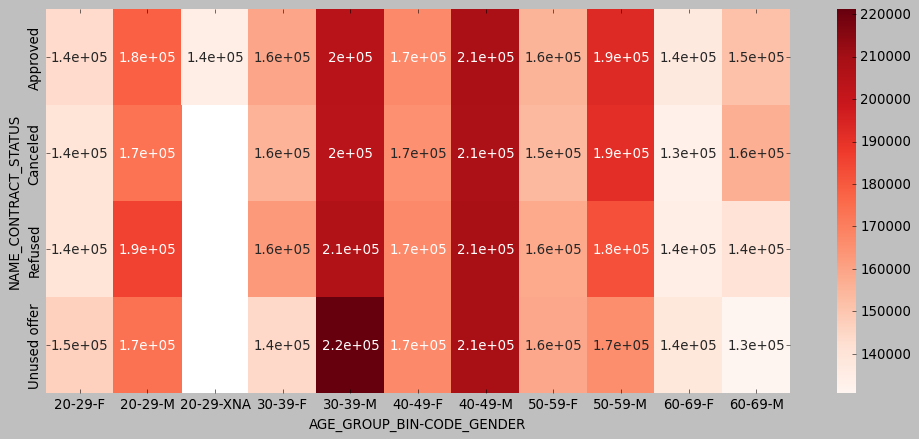

In [174]:
# Create heat map of Contract status vs marital vs response_flag
plt.figure(figsize=(15,6))
result=pd.pivot_table(data=df_final, index='NAME_CONTRACT_STATUS',columns=['AGE_GROUP_BIN','CODE_GENDER'],values='AMT_INCOME_TOTAL')
sns.heatmap(result,annot=True,cmap='Reds')
plt.show()

## <u><font color=purple>Inferences:</font></u>
> __1.  40-49 yrs old male having higher income have strong chances of loan getting approved.__<br>
> __2.  60-69 yrs old female have lowest income and have higher chances of loan getting rejected.__<br>
> __3.  30-49 yrs old male have equal probability of loans getting rejected or approved.__